In [93]:
import math
import time
import copy
import torch
from os import system
import numpy as np
import matplotlib.pyplot as plt

In [105]:
%run MCTS_Attax.ipynb # MCTS
%run NeuralNetwork_Attax.ipynb # Neural Network
%run AlphaZero_Attax.ipynb # Statistics

### To test only the game - Player vs Player

In [123]:
game = AttaxGame() # Game

player = 1 # Player 1 starts the game

game.nMovs = 0 # Number of moves

# Select the dimension of the board
while True: 
    dim = game.dim_board() 
    
    if dim == 1: # 4*4
        game.N = 4
        break
    elif dim == 2: # 5*5
        game.N = 5
        break
    elif dim == 3: # 6*6
        game.N = 6
        break
    else:
        print("Please select a valid dimension") # If the user doesn't select a valid dimension, the loop continues
        continue

game.action_size = game.N * game.N  # Number of possible actions
state = game.get_initial_state() # Initial state
print(state) # Prints the initial state

# Main loop
while True:
    game.nMovs += 1 # Number of moves is incremented by 1
    print(game.get_valid_moves(state, player)) # Prints the valid moves for the current player
    print("Select the piece you want to move and where to on the format: initialpos_finalpos") # Asks the user to select a move
    action = input(f"{player}: ") # Reads the input

    # Extracts xi, yi, xf, yf from action
    xi = int(action[0]) 
    yi = int(action[1])
    xf = int(action[3])
    yf = int(action[4])

    mov = game.movement(xi, yi, xf, yf, player) # Creates the movement

    if game.is_valid_move(state, mov): # Verifies if the move is valid
        state = game.get_next_state(state, mov) # Gets the next state
        player = game.change_player(player)  # Player is switched only after a valid move
        
    else: # If the move is not valid, the loop continues
        print("Please, select a valid move") 
        continue

    print("Attax Move No: {0:d}  Player: {1:d}, Aval: {2:d}".format(game.nMovs, player, game.evaluation(state, player))) # Prints the number of moves, the current player and the number of available pieces for the current player
    print("Board State")
    print(state)
    
    value, winner, is_terminal = game.get_value_and_terminated(state, player) # Gets the value, winner and if the game is terminated


    if is_terminal: # If the game is terminated, the loop breaks
        print(state) # Prints the final state
        if value == 1: # If someone won, prints who won
            print(winner, "won") 
        else: # If it's a draw, prints draw
            print("draw")
        break



KeyboardInterrupt: Interrupted by user

### To test the game with MCTS - Player vs MCTS

In [5]:
game = AttaxGame() # Game

args = {
    'C' : 1.41,  # Exploration constant for MCTS 
    'num_searches': 100 # Number of searches for MCTS
}

player = 1 # Player 1 starts the game

mcts = MCTS_without_nn(game, args, player) # MCTS

game.nMovs = 0 # Number of moves

# Select the dimension of the board
while True:
    dim = game.dim_board() 
    
    if dim == 1: # 4*4
        game.N = 4
        break
    elif dim == 2: # 5*5
        game.N = 5
        break
    elif dim == 3: # 6*6
        game.N = 6
        break
    else:
        print("Please select a valid dimension") # If the user doesn't select a valid dimension, the loop continues
        continue

game.action_size = game.N * game.N # Number of possible actions
state = game.get_initial_state() # Initial state
print(state) # Prints the initial state

# Main loop
while True:
    game.nMovs += 1  # Number of moves is incremented by 1
    player = game.change_player(player) # Player is switched only after a valid move
 
    if player == 1: # If it is the user
        print(game.get_valid_moves(state, player)) # Prints the valid moves for the current player
        print("Select the piece you want to move and where to on the format: initialpos_finalpos") # Asks the user to select a move
        action = input(f"{player}: ") # Reads the input
    
        # Extracts xi, yi, xf, yf from action
        xi = int(action[0])
        yi = int(action[1])
        xf = int(action[3])
        yf = int(action[4])
    
        mov = game.movement(xi, yi, xf, yf, player) # Creates the movement
    
        if game.is_valid_move(state, mov): # Verifies if the move is valid
            state = game.get_next_state(state, mov) # Gets the next state
            
        else: # If the move is not valid, the loop continues
            print("Please, select a valid move") 
            continue

    else: # If it is the computer
        neutral_state = game.change_perspective(state, player) # Changes the perspective of the board
        mcts_probs = mcts.search(neutral_state) # Searches for the best move
       
        action = max(mcts_probs, key=mcts_probs.get) # Child with the highest probability
        action.player = -action.player # Changes the perspective of the action
        print(f"{action.xi}{action.yi}_{action.xf}{action.yf}") # Prints the action

        state = game.get_next_state(state, action) # Gets the next state
        
    print("Attax Move No: {0:d}  Player: {1:d}, Aval: {2:d}".format(game.nMovs, player, game.evaluation(state, player))) # Prints the number of moves, the current player and the number of available pieces for the current player
    print("Board State")
    print(state)
    
    value, winner, is_terminal = game.get_value_and_terminated(state, player) # Gets the value, winner and if the game is terminated

    if is_terminal: # If the game is terminated, the loop breaks
        print(state) # Prints the final state
        if value == 1: # If someone won, prints who won
            print(winner, "won") 
        else: # If it's a draw, prints draw
            print("draw")
        break

Attax
Choose the dimension of the board: 
1-4*4 2-5*5 3-6*6 6


Please select a valid dimension


Attax
Choose the dimension of the board: 
1-4*4 2-5*5 3-6*6 2


[[ 1  0  0  0 -1]
 [ 0  0  0  0  0]
 [ 0  0  0  0  0]
 [ 0  0  0  0  0]
 [-1  0  0  0  1]]
40_21
Attax Move No: 1  Player: -1, Aval: 1
Board State
[[ 1  0  0  0 -1]
 [ 0  0 -1  0  0]
 [ 0  0  0  0  0]
 [ 0  0  0  0  0]
 [-1  0  0  0  1]]
['00_10', '00_01', '00_11', '00_02', '00_12', '00_22', '00_20', '44_33', '44_43', '44_34', '44_22', '44_32', '44_42', '44_23', '44_24']
Select the piece you want to move and where to on the format: initialpos_finalpos


KeyboardInterrupt: Interrupted by user

### To test the nn

If you want to test the RNN, change model to: AttaxRNN(game.N * game.N, 4, 64, game.action_size, 1, device)

[[[0. 0. 0. 1.]
  [1. 0. 0. 0.]
  [1. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[1. 1. 1. 0.]
  [0. 1. 1. 1.]
  [0. 1. 1. 1.]
  [1. 1. 1. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 1.]]]
tensor([[[[0., 0., 0., 1.],
          [1., 0., 0., 0.],
          [1., 0., 0., 0.],
          [0., 0., 0., 0.]],

         [[1., 1., 1., 0.],
          [0., 1., 1., 1.],
          [0., 1., 1., 1.],
          [1., 1., 1., 0.]],

         [[0., 0., 0., 0.],
          [0., 0., 0., 0.],
          [0., 0., 0., 0.],
          [0., 0., 0., 1.]]]])
value:  -0.03003811649978161
policy:  [0.15534556 0.08673608 0.07355452 0.15179591 0.05180338 0.17430726
 0.20717278 0.09928446]


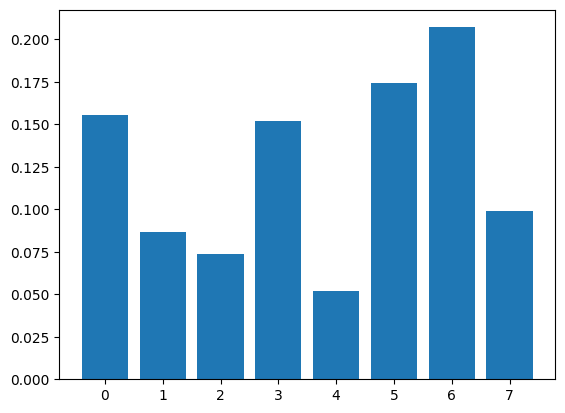

In [6]:
game = AttaxGame() # Game
game.N = 4 # 4*4
game.action_size = game.N * game.N # Number of possible actions
state = game.get_initial_state() # Initial state
state = game.get_next_state(state, AttaxGame.mov(0,0,0,1,1,1)) # Player 1 moves
state = game.get_next_state(state, AttaxGame.mov(0,3,0,2,-1,1)) # Player 2 moves

encoded_state = game.get_encoded_state(state) # Encodes the state
print(encoded_state) # Prints the encoded state

device = torch.device("cuda" if torch.cuda.is_available() else "cpu") # Checks if GPU is available

tensor_state = torch.tensor(encoded_state).unsqueeze(0) # Convert the encoded state to a tensor and add a batch dimension (batch size = 1)
model = ResNet(game, state, 1, 4, 64, device) # Initialize the model with the same parameters used in training (4 residual blocks, 64 filters)
print(tensor_state) # Prints the tensor state
policy, value= model(tensor_state) # Gets the policy and value from the model 
value = value.item() # Gets the value as a scalar
# print(policy)
policy = torch.softmax(policy, axis=1).squeeze(0).detach().cpu().numpy() # Gets the policy as a numpy array
print("value: ", value) # Prints the value 
np.set_printoptions(threshold=np.inf) # Print the full policy array
print("policy: ", policy) # Prints the policy

plt.bar(range(len(policy)), policy) # Plots the policy
plt.show() # Shows the plot

### To test the game with MCTS and the nn - Player vs MCTS + CNN

Once again, if you want to change to the RNN, replace the model with: AttaxRNN(game.N * game.N, 40, 265, game.action_size, 1, device)

In [25]:
game = AttaxGame() # Game

args = {
    'C' : 2,  # Exploration constant for the UCT formula 
    'num_searches': 1000 # Number of searches to run for each move
}

# Select the dimension of the board
while True:
    dim = game.dim_board()  
    
    if dim == 1: # 4*4
        game.N = 4
        break
    elif dim == 2: # 5*5
        game.N = 5
        break
    elif dim == 3: # 6*6
        game.N = 6
        break
    else:
        print("Please select a valid dimension") # If the user doesn't select a valid dimension, the loop continues
        continue

game.action_size = game.N * game.N # Number of possible actions
state = game.get_initial_state() # Initial state
print(state) # Prints the initial state

device = torch.device("cuda" if torch.cuda.is_available() else "cpu") # Checks if GPU is available

model = ResNet(game, state, 1, 4, 64, device) # Initialize the model with the same parameters used in training (4 residual blocks, 64 filters)
model.eval() # Sets the model to evaluation mode
mcts = MCTS(game, args, 1, model) # MCTS
player = 1 # Player 1 starts the game

# Main loop
while True:
    game.nMovs += 1 # Number of moves is incremented by 1
    player = game.change_player(player) # Player is switched only after a valid move

    if player == 1: # If it is the user
        print(game.get_valid_moves(state, player)) # Prints the valid moves for the current player
        print("Select the piece you want to move and where to on the format: initialpos_finalpos") # Asks the user to select a move
        action = input(f"{player}: ") # Reads the input
    
        # Extracts xi, yi, xf, yf from action
        xi = int(action[0])
        yi = int(action[1])
        xf = int(action[3])
        yf = int(action[4])
    
        mov = game.movement(xi, yi, xf, yf, player) # Creates the movement
    
        if game.is_valid_move(state, mov): # Verifies if the move is valid
            state = game.get_next_state(state, mov) # Gets the next state
            
        else: # If the move is not valid, the loop continues
            print("Please, select a valid move") 
            continue
            
    else: # If it is the computer
        neutral_state = game.change_perspective(state, player) # Changes the perspective of the board
        mcts_probs = mcts.search(neutral_state) # Searches for the best move
        
        action = max(mcts_probs, key=mcts_probs.get) # Child with the highest probability
        action.player = -action.player # Changes the perspective of the action
        print(f"{action.xi}{action.yi}_{action.xf}{action.yf}") # Prints the action
        
        state = game.get_next_state(state, action) # Gets the next state
     
    print("Attax Move No: {0:d}  Player: {1:d}, Aval: {2:d}".format(game.nMovs, player, game.evaluation(state, player))) # Prints the number of moves, the current player and the number of available pieces for the current player
    print("Board State")
    print(state)
    
    value, winner, is_terminal = game.get_value_and_terminated(state, player) # Gets the value, winner and if the game is terminated

    if is_terminal: # If the game is terminated, the loop breaks
        print(state) # Prints the final state
        if value == 1: # If someone won, prints who won
            print(winner, "won") 
        else: # If it's a draw, prints draw
            print("draw")
        break

KeyboardInterrupt: Interrupted by user

### Test to compare the RNN and the CNN

A "mini train" was made to compare the performance of the two neural networks, which were initialized with equivalent parameters

As seen in the graphics the Convolutional Neural Network performs significantly better than the Recurrent. 
Due to that reason, only the CNN model was used from now on

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

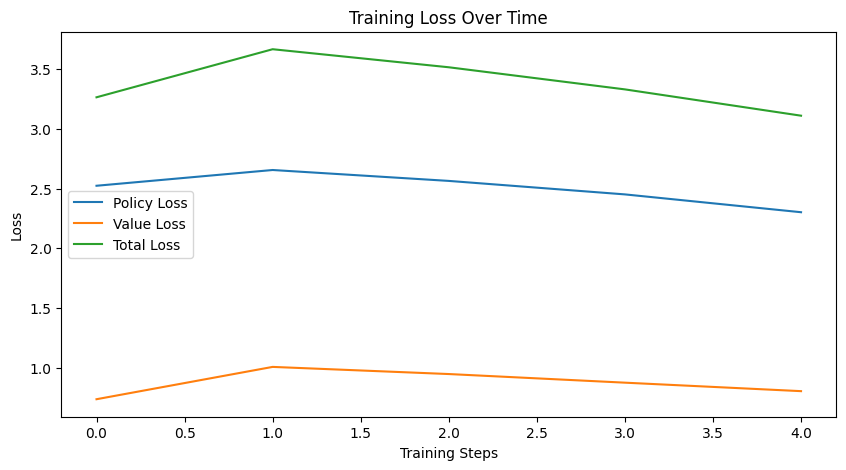

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

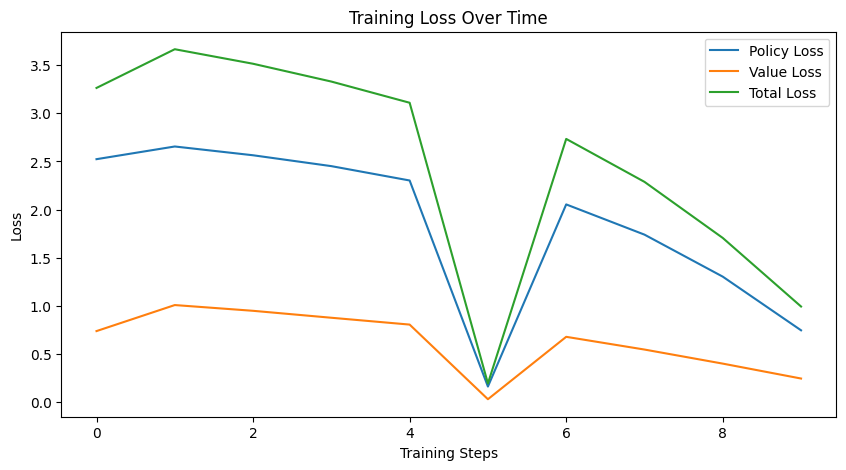

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

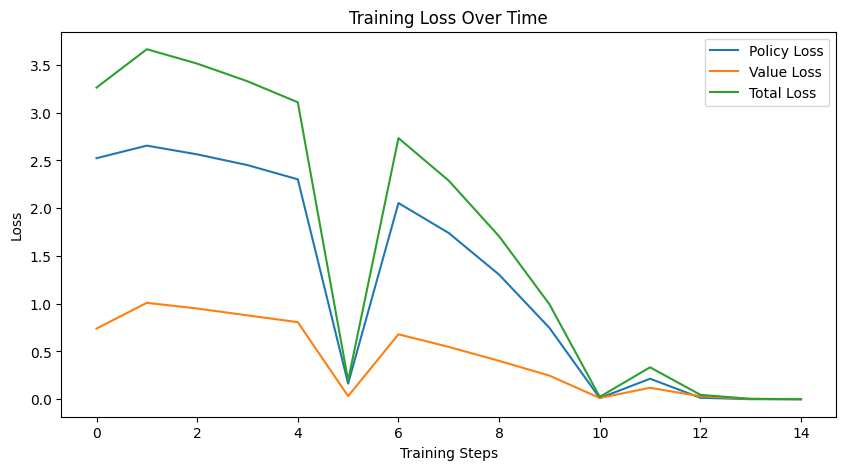

In [82]:
game = AttaxGame() # Game
 
device = torch.device("cuda" if torch.cuda.is_available() else "cpu") # Checks if GPU is available

game.N = 4 # 4*4
game.action_size = game.N * game.N # Number of possible actions
state = game.get_initial_state() # Initial state

model = ResNet(game, state, 1, 4, 64, device) # Initialize the model with the same parameters used in training (4 residual blocks, 64 filters)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=0.0001) # Adam optimizer with weight decay of 0.0001 and learning rate of 0.001 

# Training parameters
args = {
    'C': 2, # Exploration constant for the UCT formula
    'num_searches': 10, # Number of searches to run for each move
    'num_iterations': 3, # Number of iterations to run the training
    'num_selfPlay_iterations': 50, # Number of self play iterations
    'num_epochs': 5, # Number of epochs to run the training
    'batch_size': 64, # Batch size
    'epsilon': 0.25, # Epsilon for the Dirichlet noise
    'alpha': 0.3 # Alpha for the Dirichlet noise
}

alphaZero = AlphaZero(model, optimizer, game, args) # AlphaZero object
alphaZero.learn() # Runs the training

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

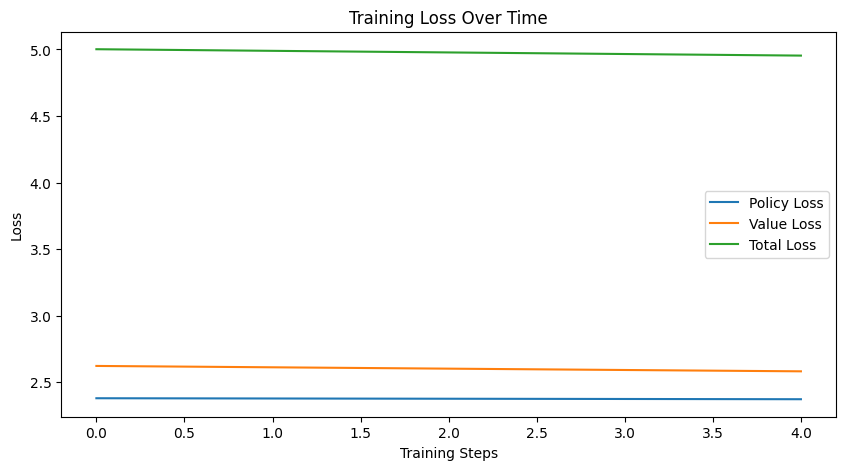

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

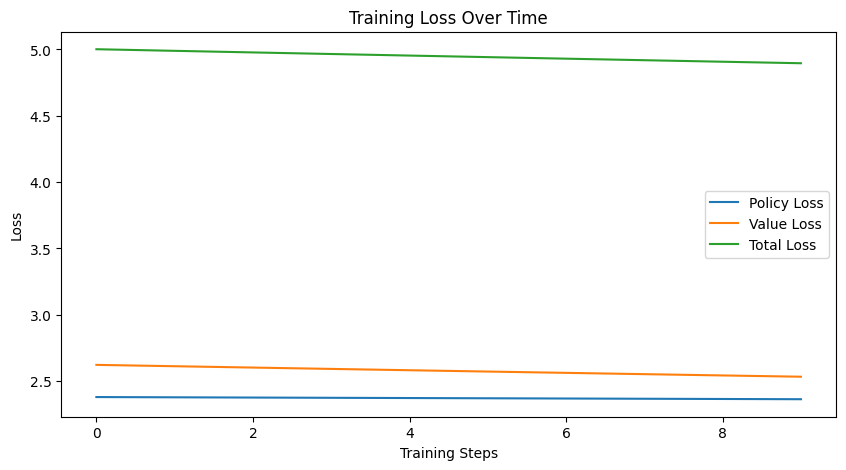

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

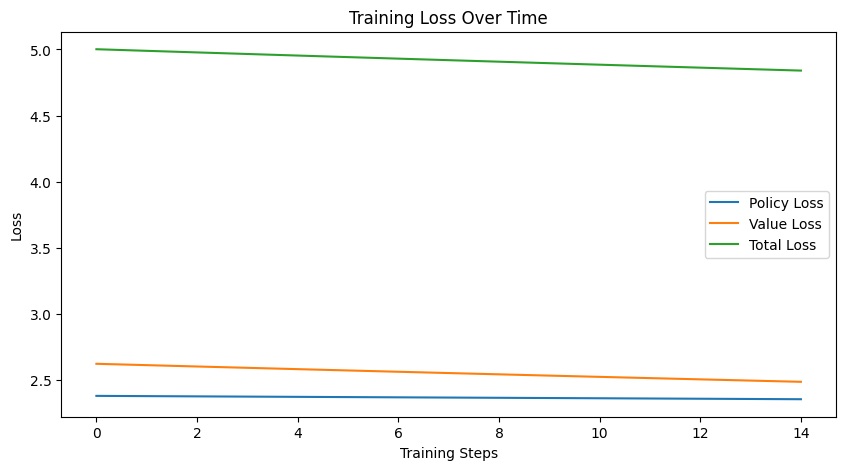

In [47]:
game = AttaxGame() # Game
 
device = torch.device("cuda" if torch.cuda.is_available() else "cpu") # Checks if GPU is available

game.N = 4 #4*4
game.action_size = game.N * game.N # Number of possible actions
state = game.get_initial_state() # Initial state
# RNN
model = AttaxRNN(game.N * game.N, 4, 64, game.action_size, 1, device) # Initialize the model with the same parameters used in training (4 residual blocks, 64 filters)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=0.0001) # Adam optimizer with weight decay of 0.0001 and learning rate of 0.001 

# Training parameters
args = {
    'C': 2, # Exploration constant for the UCT formula
    'num_searches': 10, # Number of searches to run for each move
    'num_iterations': 3, # Number of iterations to run the training
    'num_selfPlay_iterations': 50, # Number of self play iterations
    'num_epochs': 5, # Number of epochs to run the training
    'batch_size': 64, # Batch size
    'epsilon': 0.25, # Epsilon for the Dirichlet noise
    'alpha': 0.3 # Alpha for the Dirichlet noise
}

alphaZero = AlphaZero(model, optimizer, game, args) # AlphaZero object
alphaZero.learn() # Runs the training

### To train with alphazero

##### Board dimension = 4

The model chosen as the best one was the `Attempt 1` one, at the 8th iteration.

This choice was motivated by the loss graph which presents a sharp decrease followed by a stabilization. Which indicates that model is quickly learning and that it is also starting to converge, which means it is making consistent predictions, the expected behaviour as the model becomes more accurate.

The same approach was taken for boards with size 5 and 6, with the models `Attempt 1 - 14th iteration` and `Attempt 1 - 7th` being chosen, respectively.
.

###### Attempt 1 - weight decay = 0.0001

Over the iterations, the early stopping tends to be triggered, to a point where no epochs are completed.
Once this phenomenon happened , and all over 3 board sizes, this led us to the conclusion that our model was overfitting. 

To revert that tendency, the l2 regularization (weight decay) was increased to 0.001 and then (due to the fact that the problem was still happening) to 0.01.

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


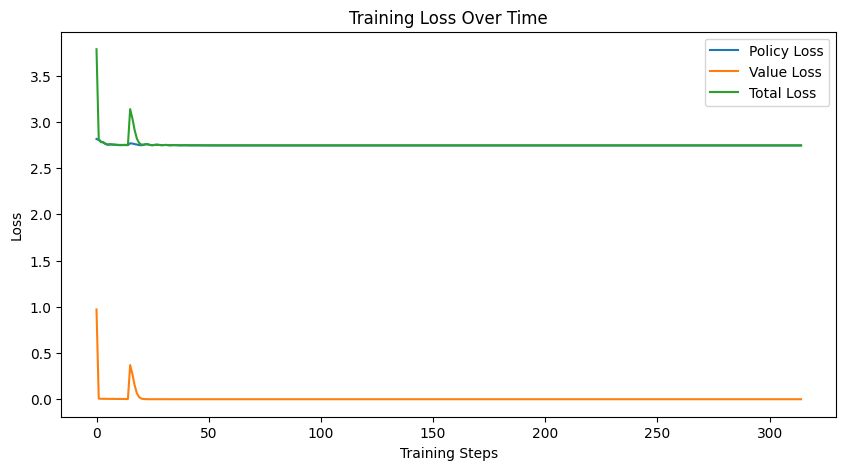

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


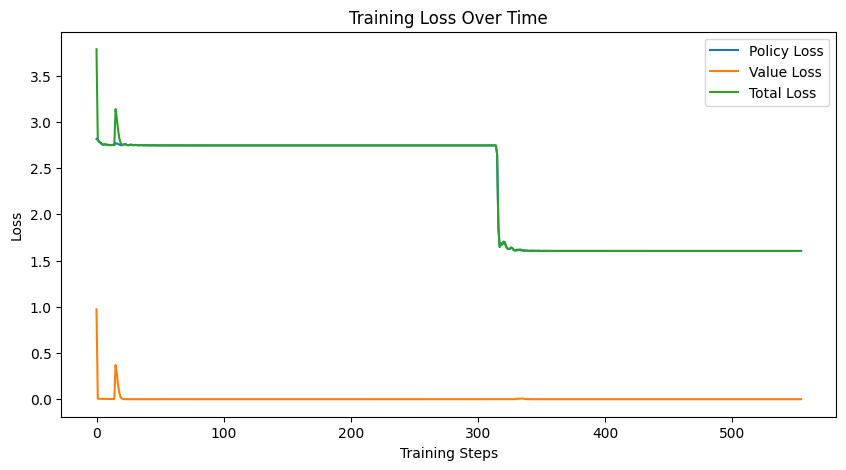

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


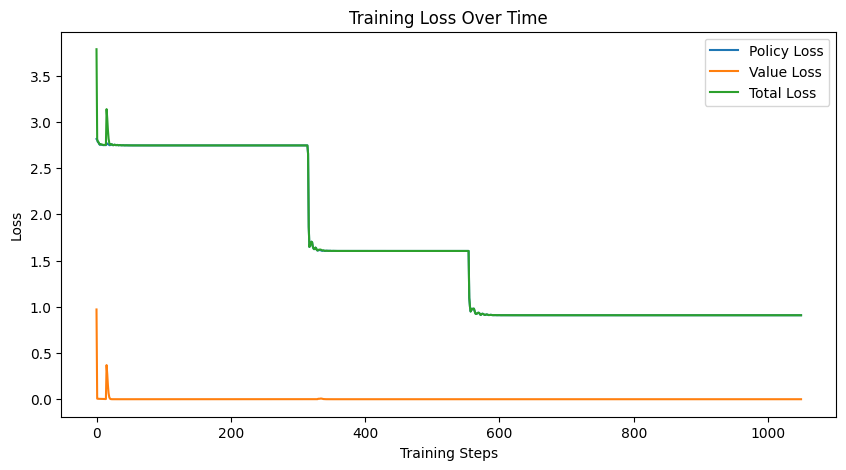

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


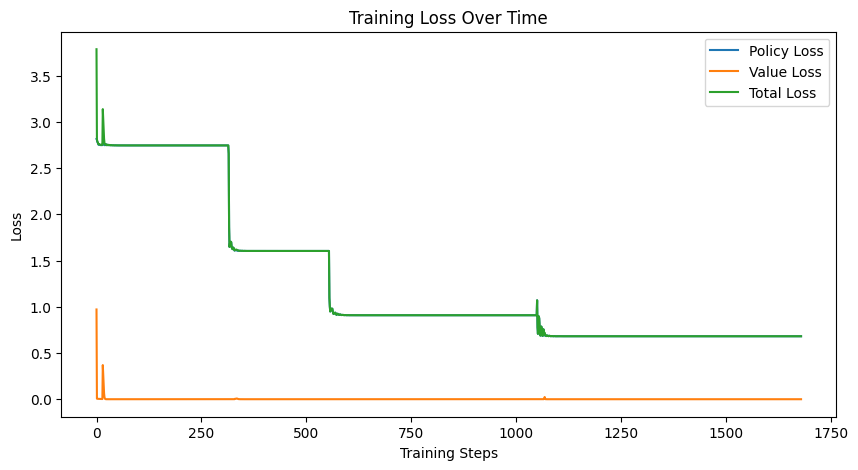

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


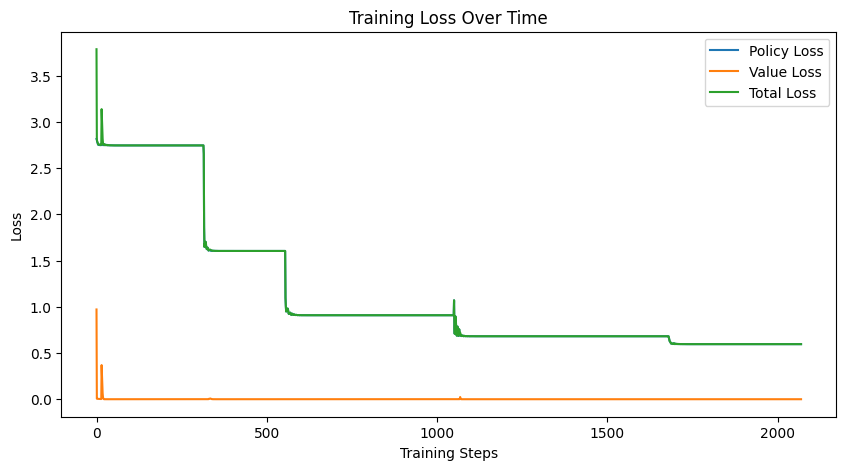

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

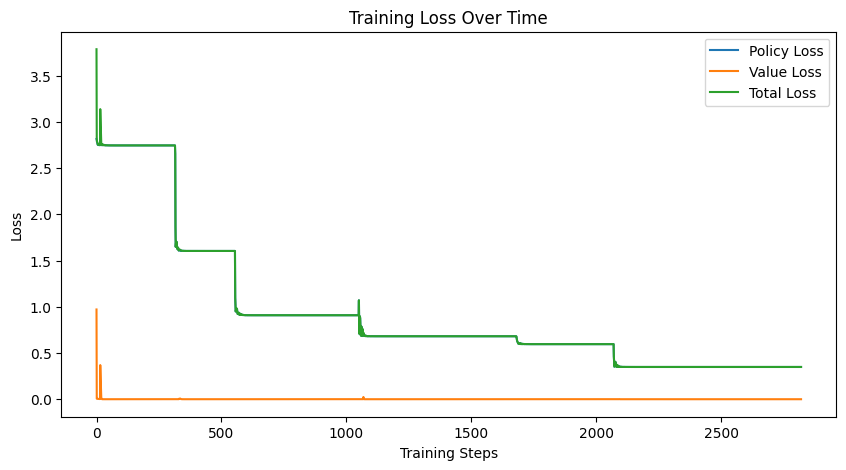

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


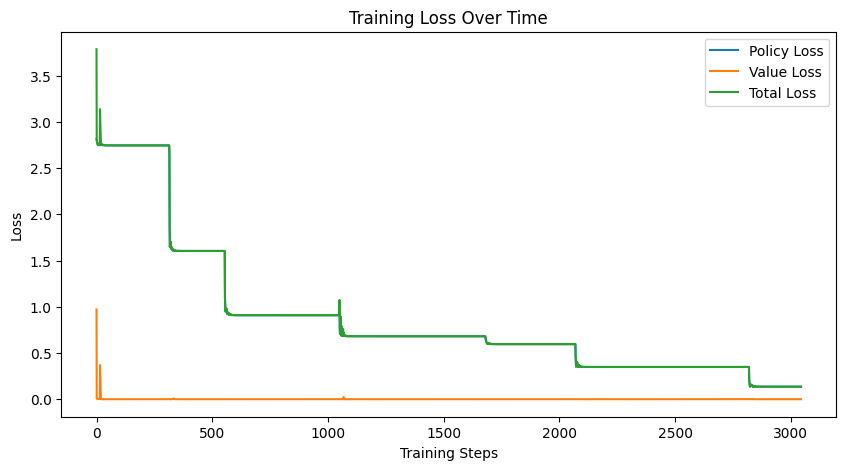

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

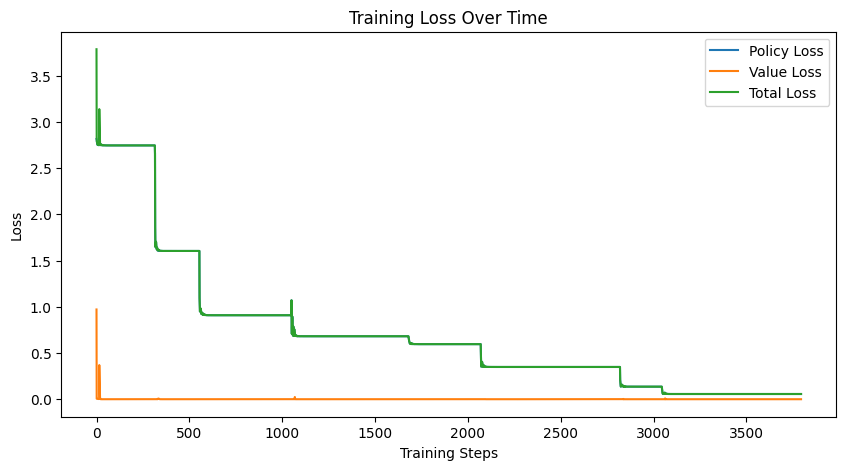

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


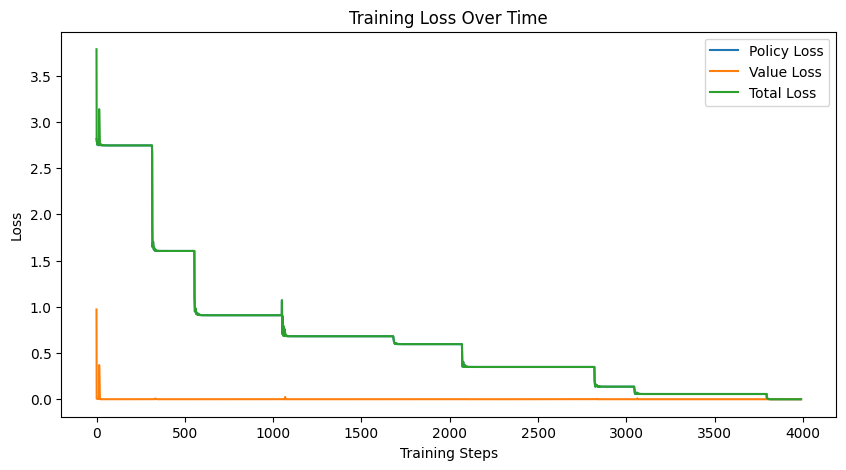

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


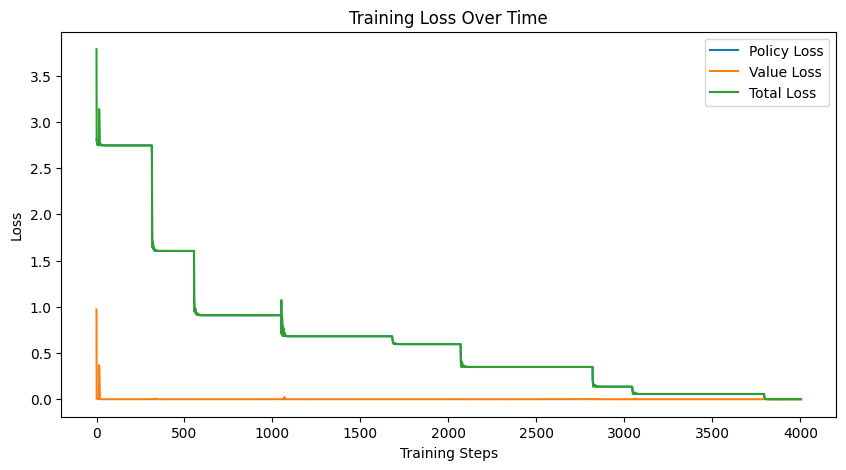

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


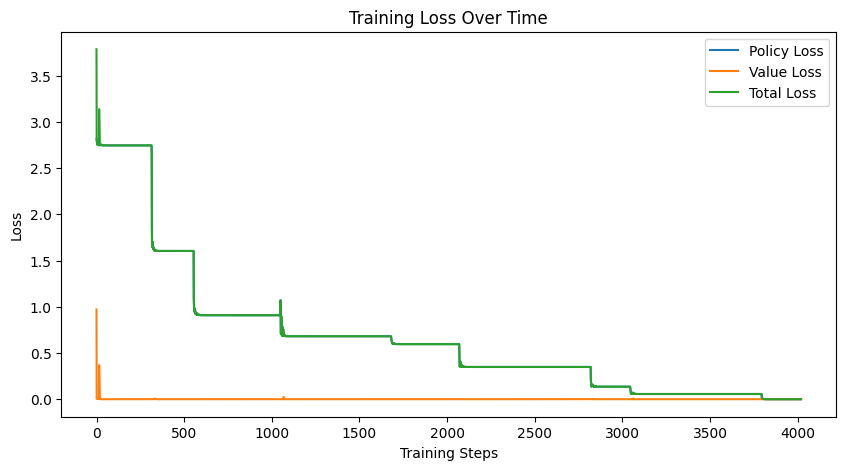

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


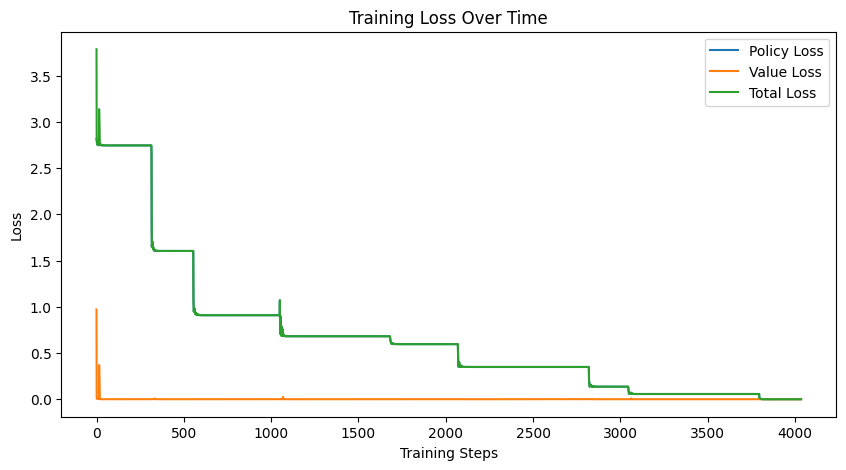

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


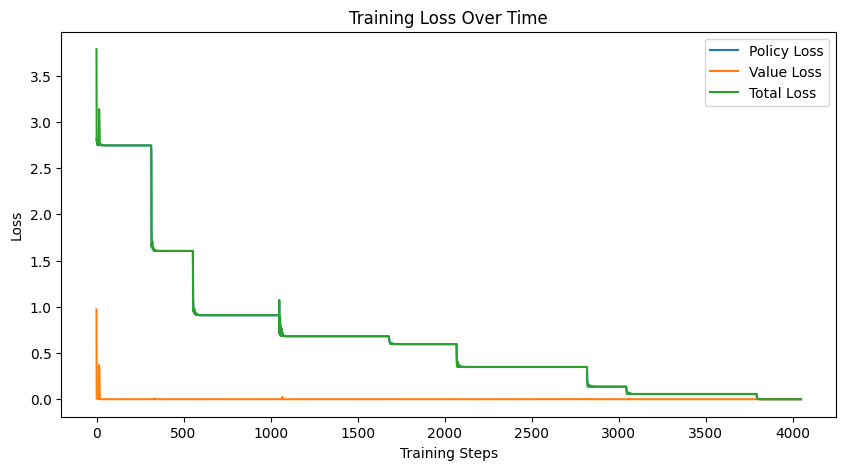

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


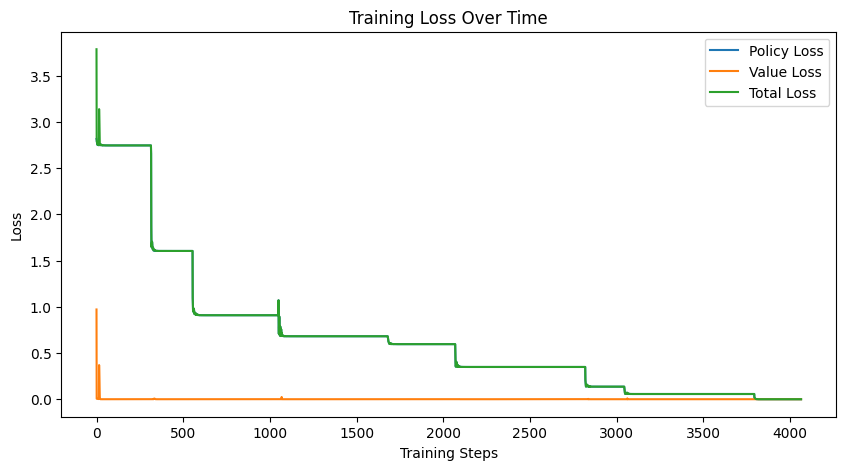

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


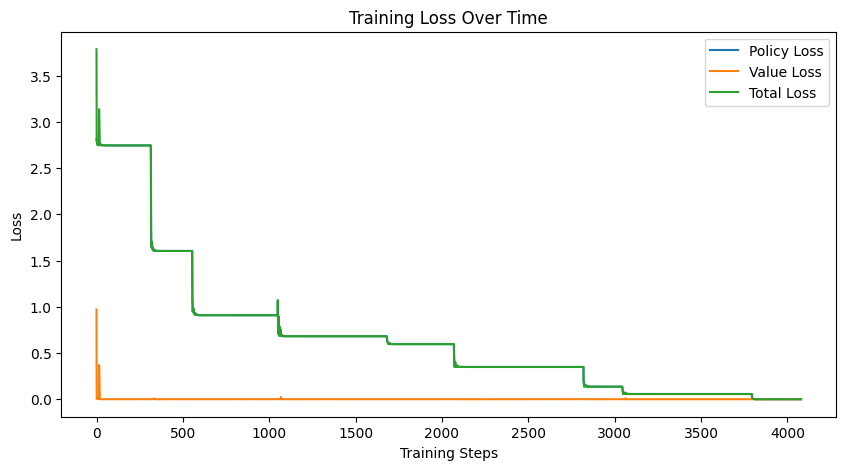

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


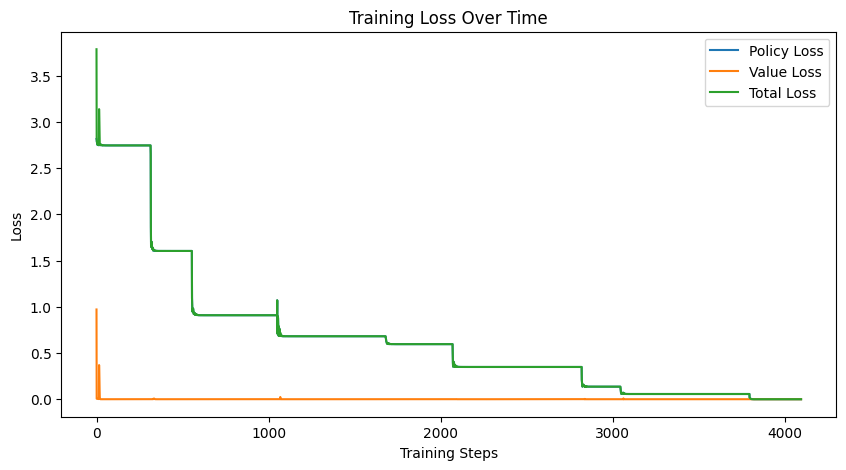

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


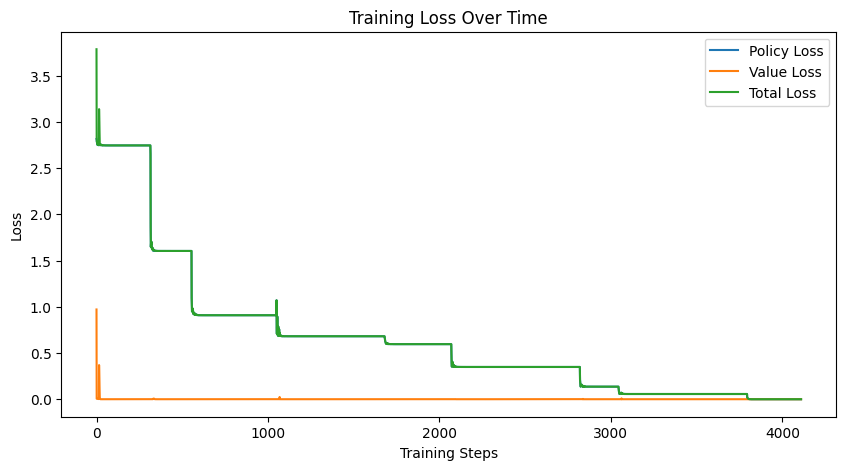

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


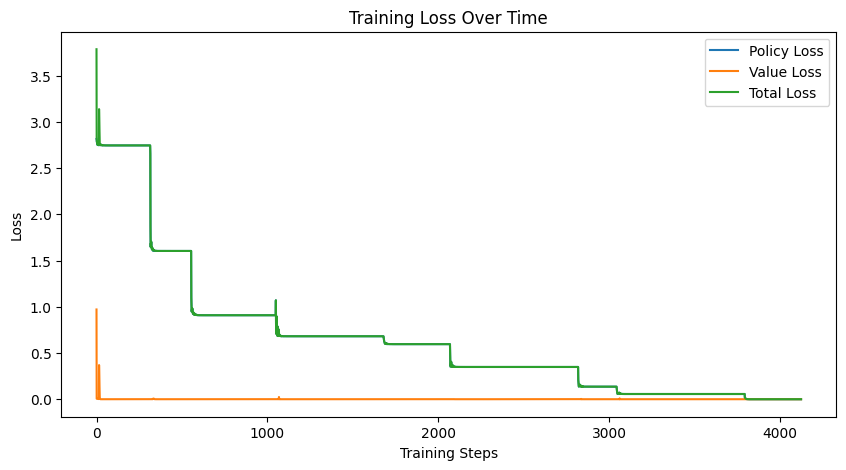

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


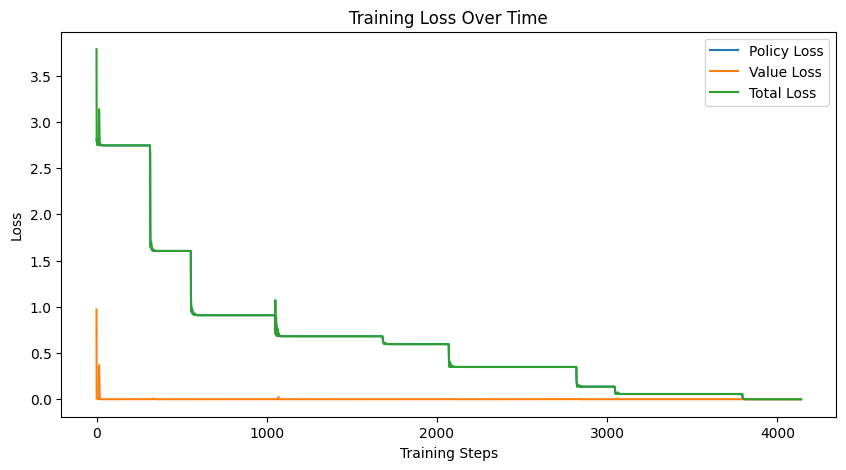

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


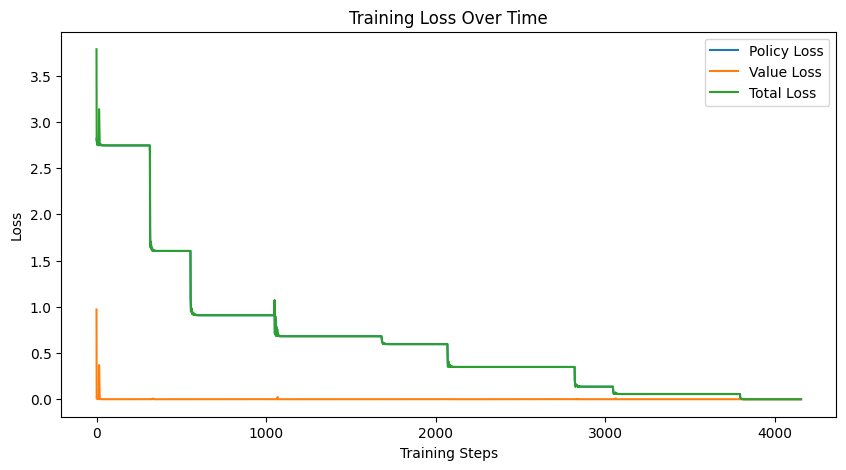

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


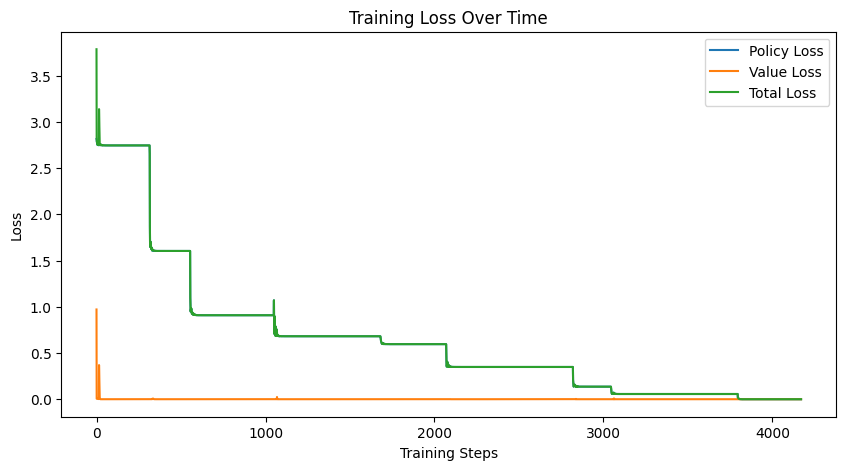

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


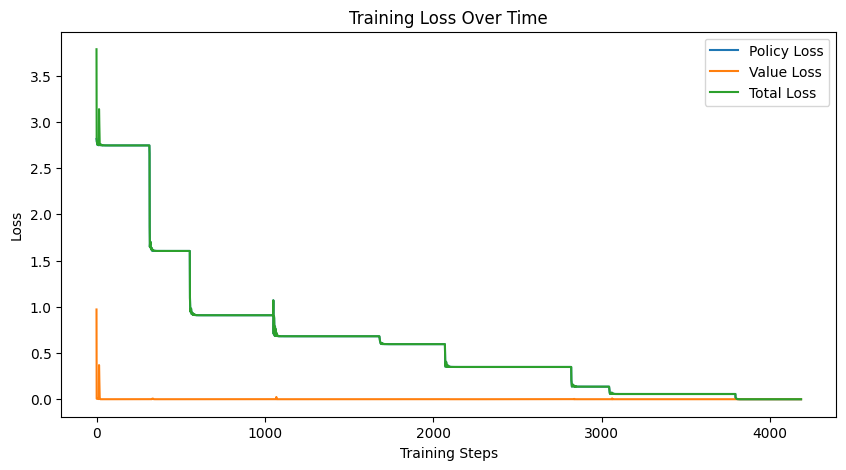

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


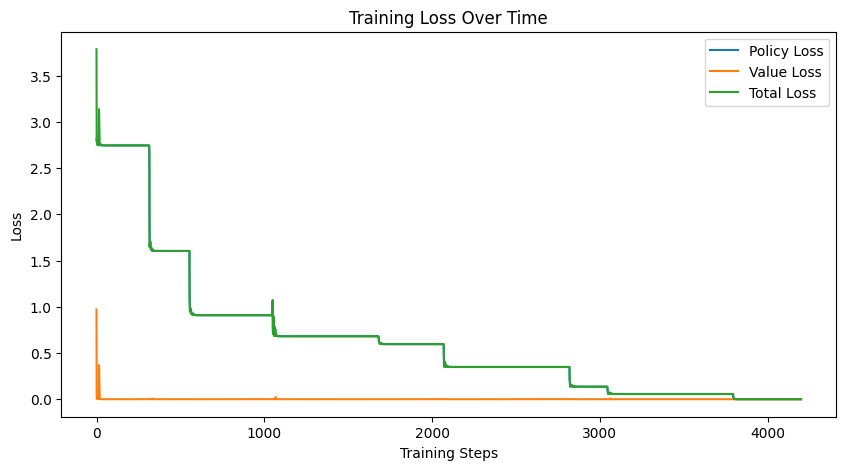

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


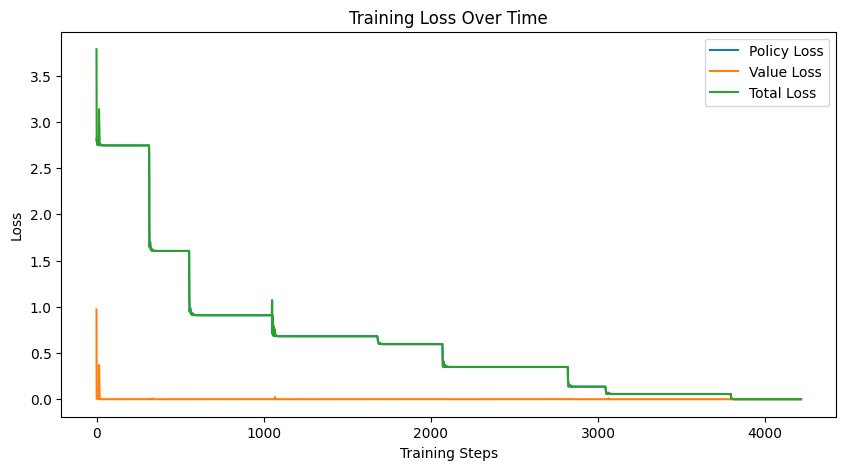

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


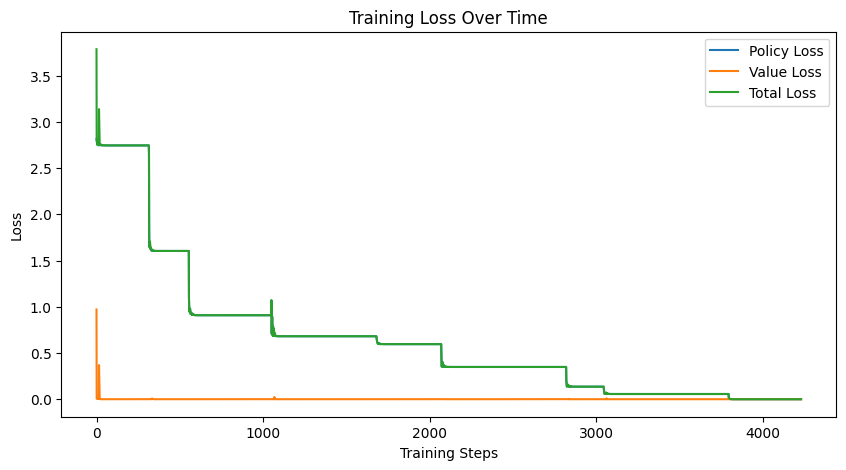

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


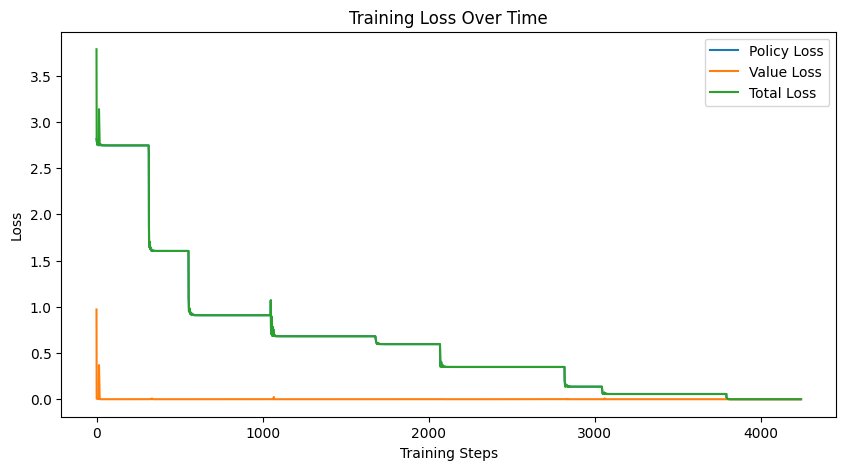

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


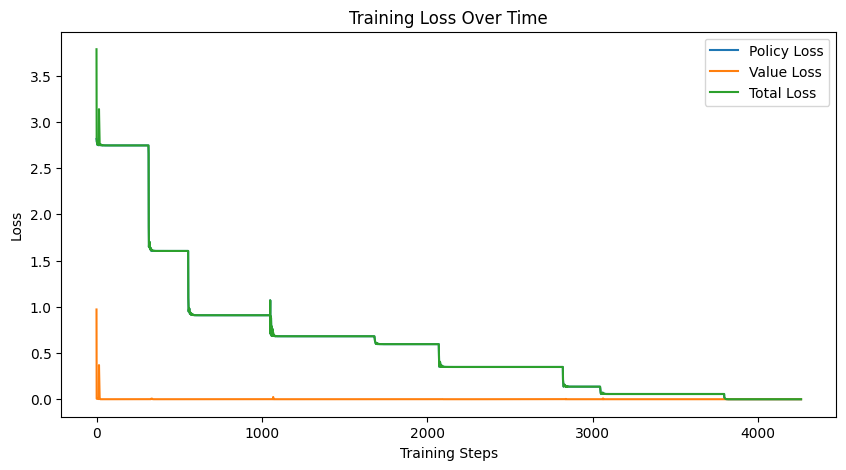

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


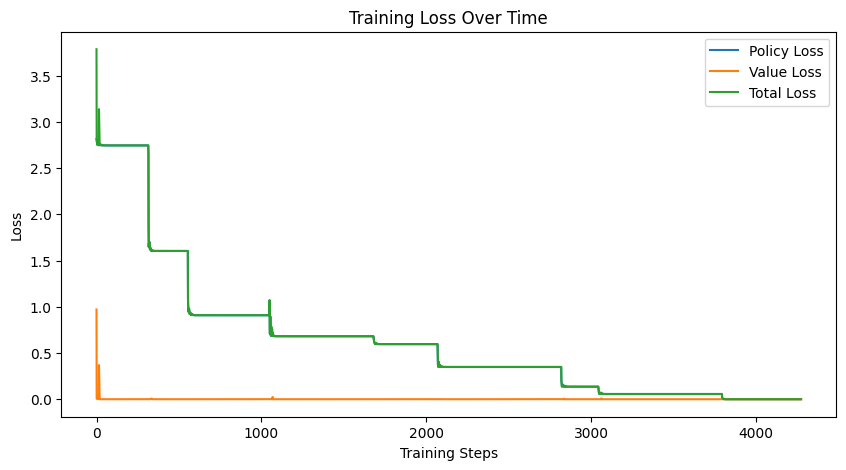

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


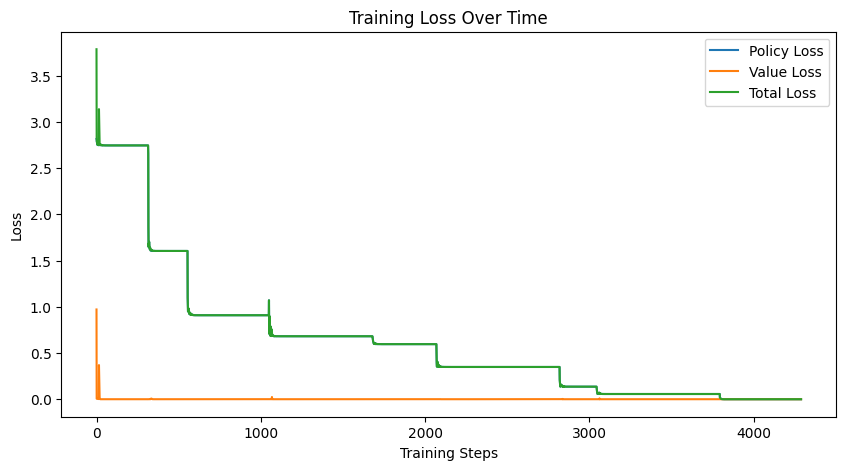

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


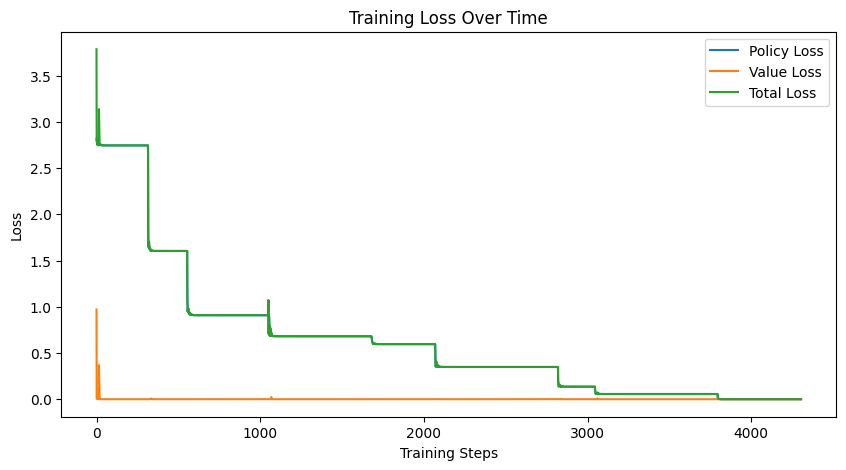

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


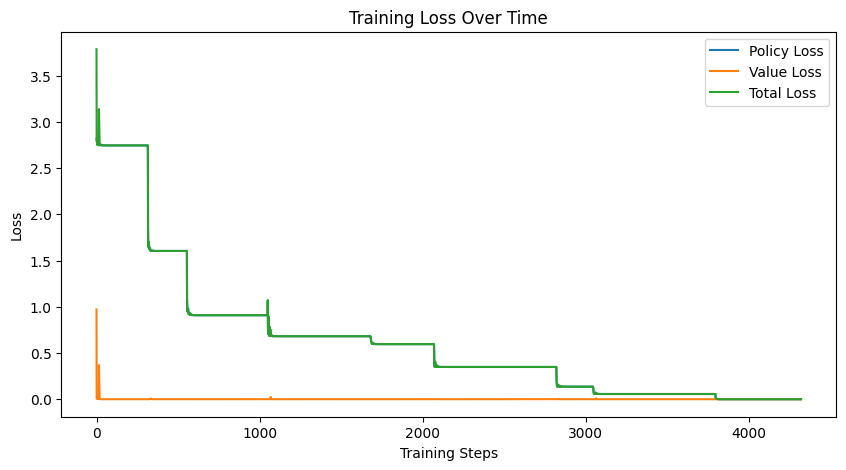

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


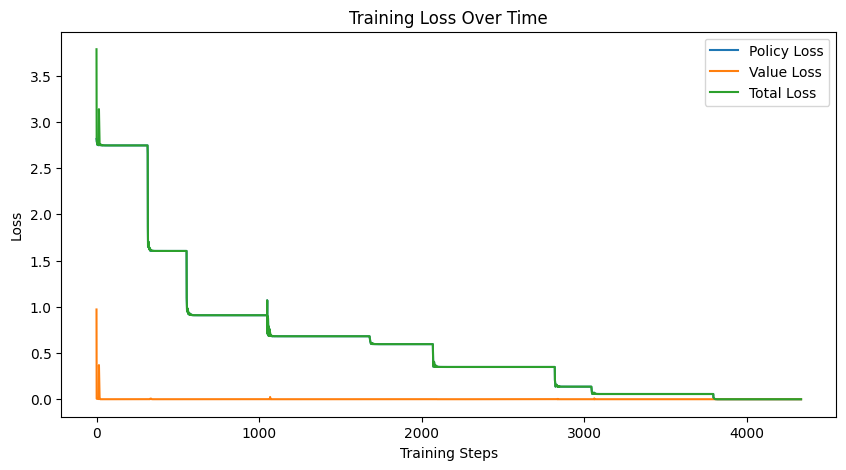

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


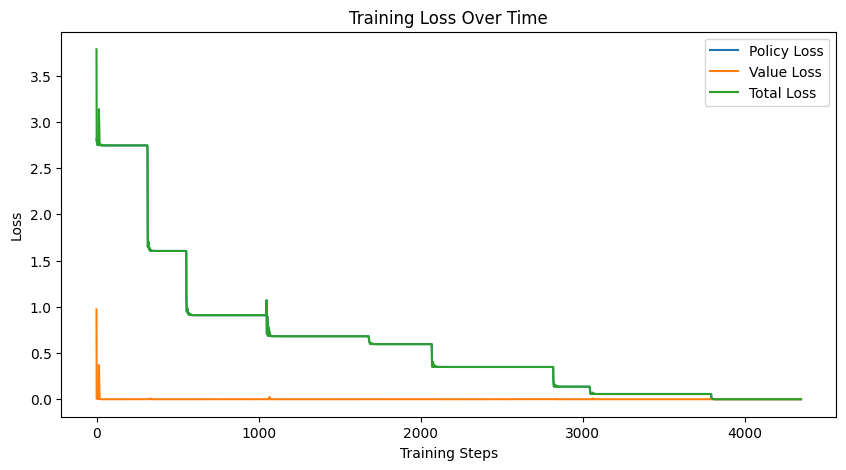

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


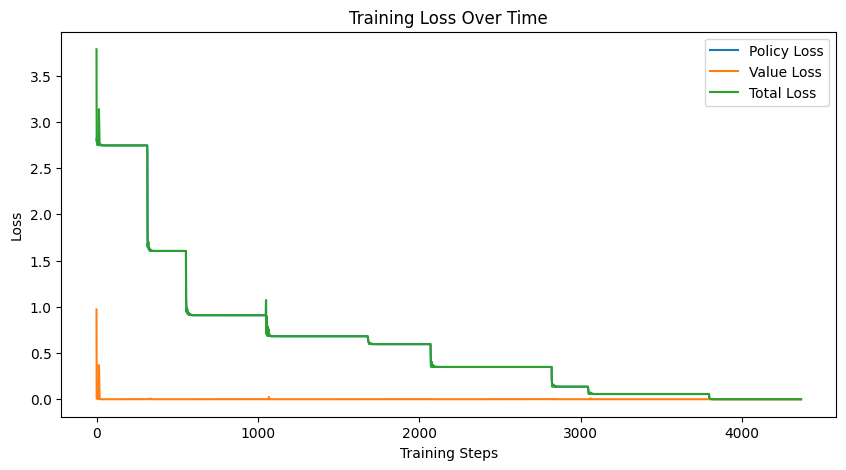

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


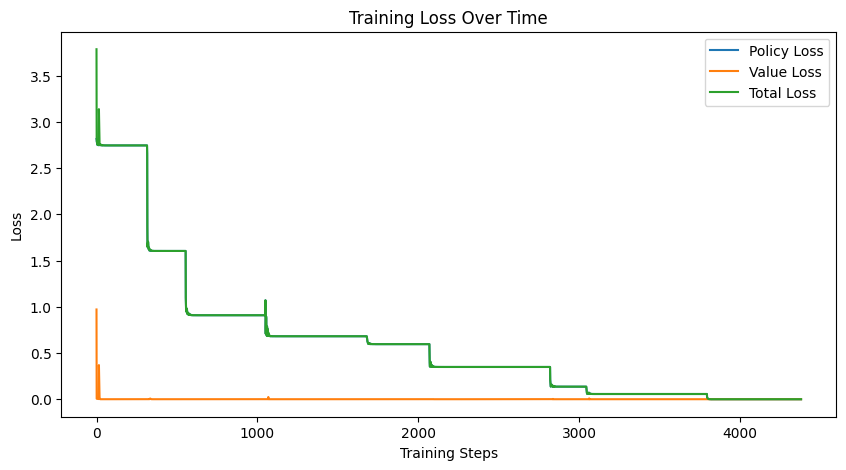

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


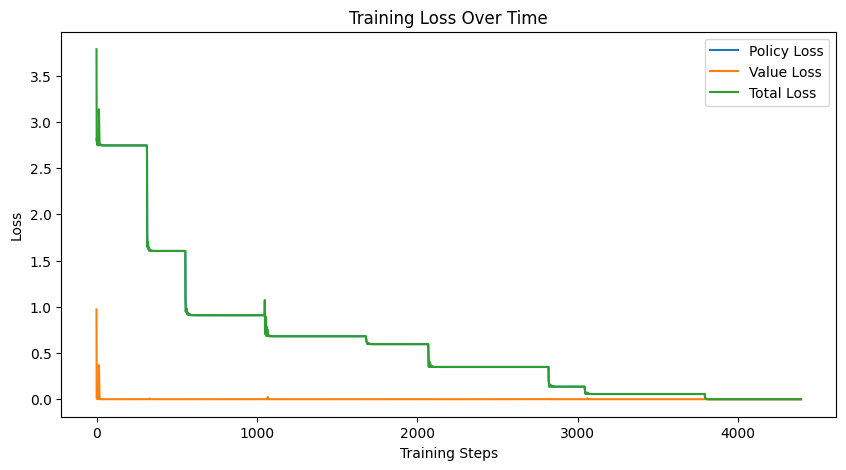

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


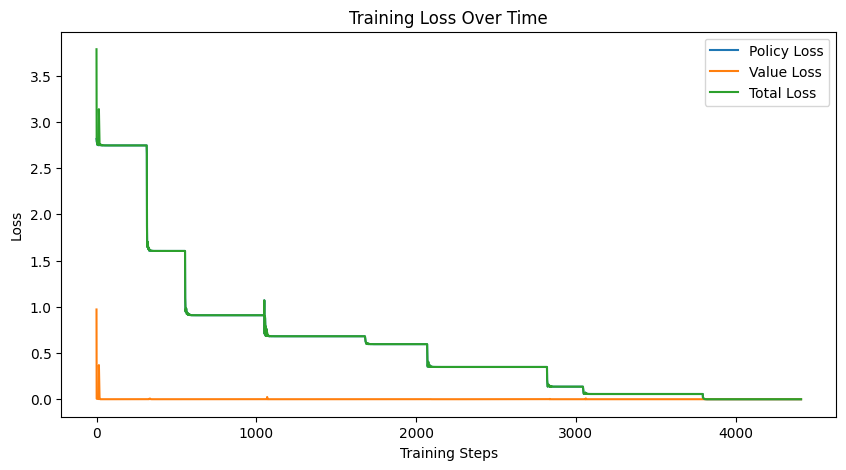

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


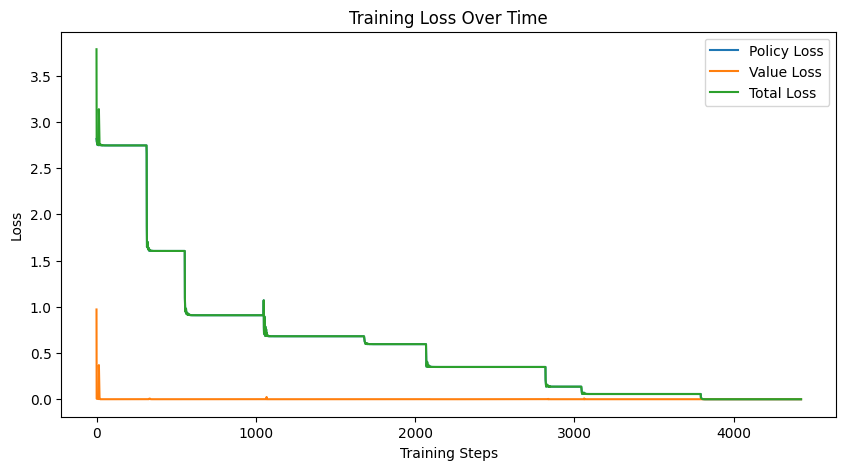

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


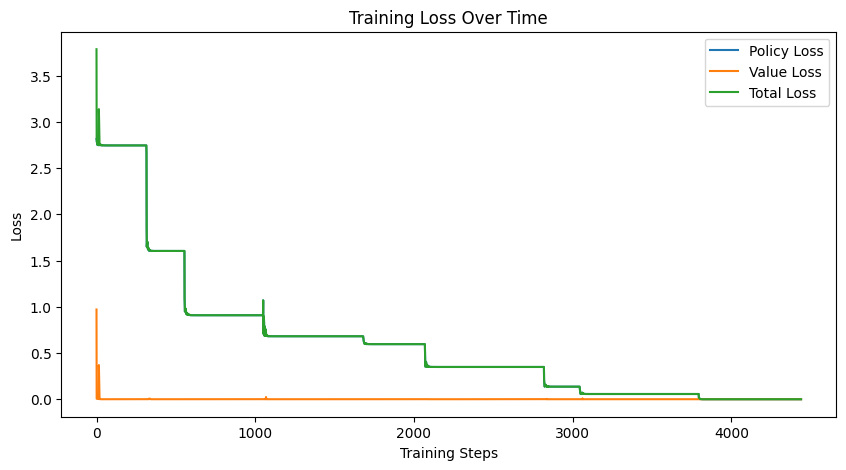

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


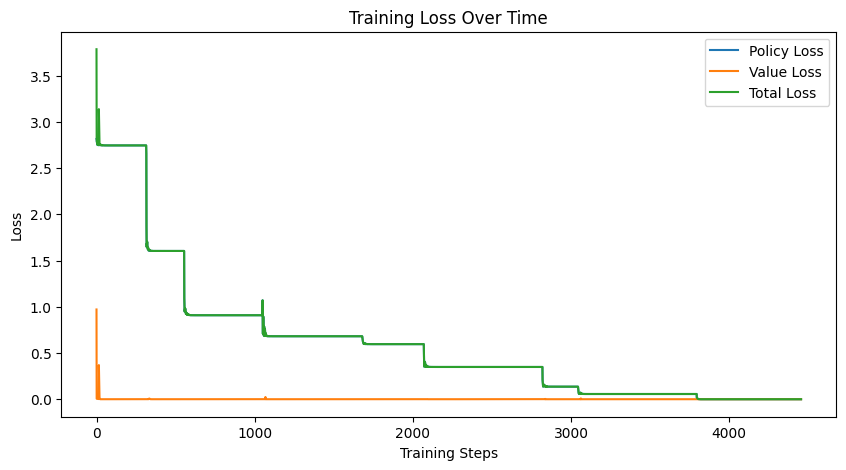

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


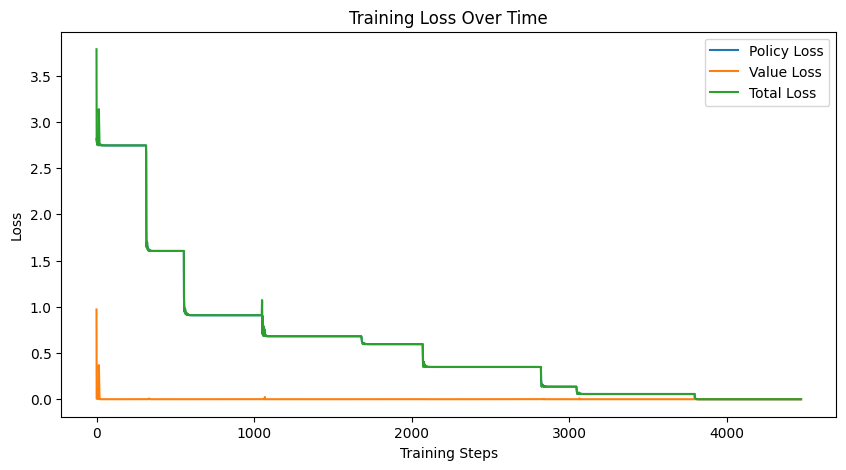

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


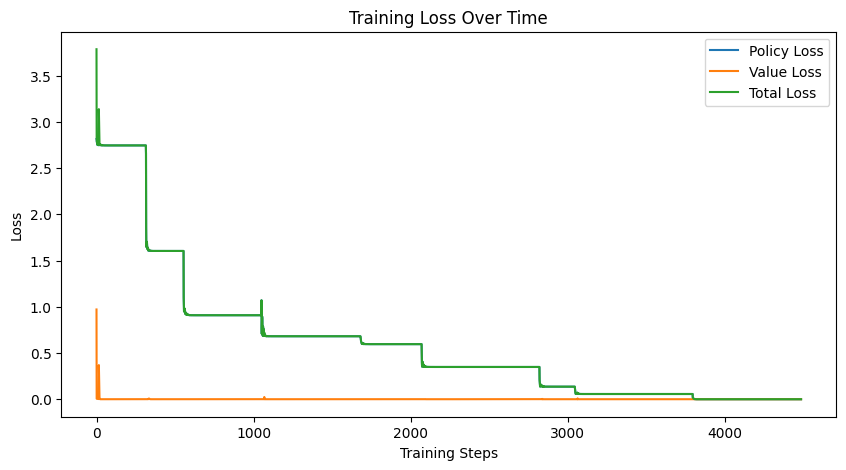

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


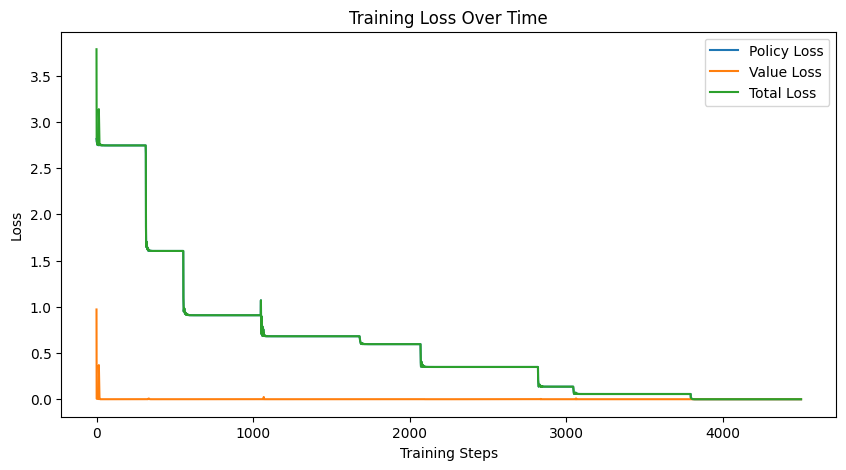

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


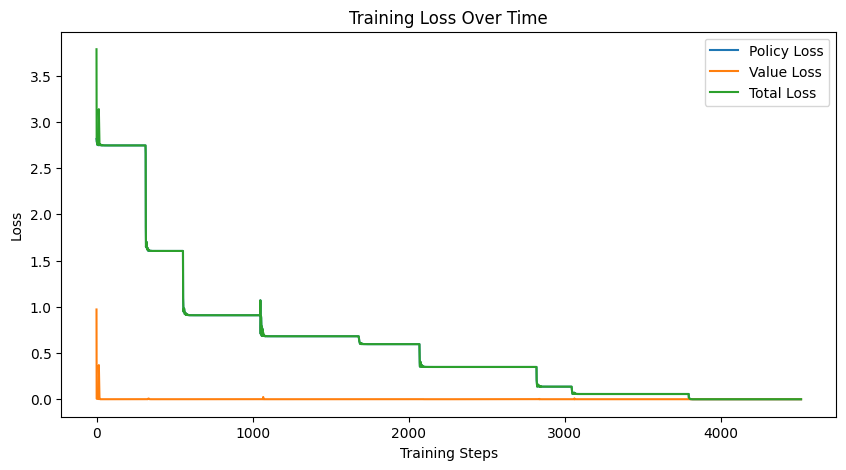

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


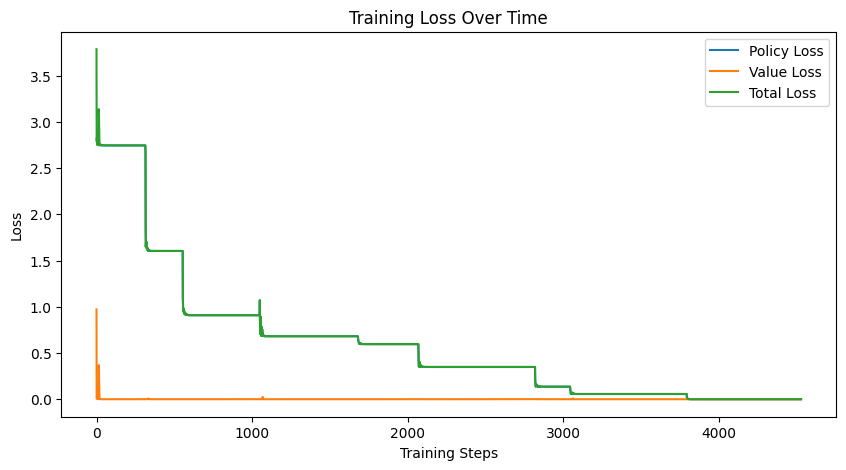

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


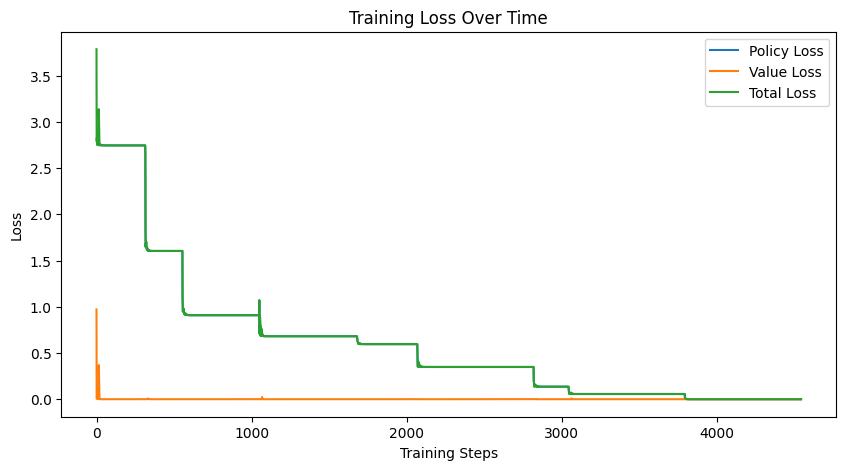

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


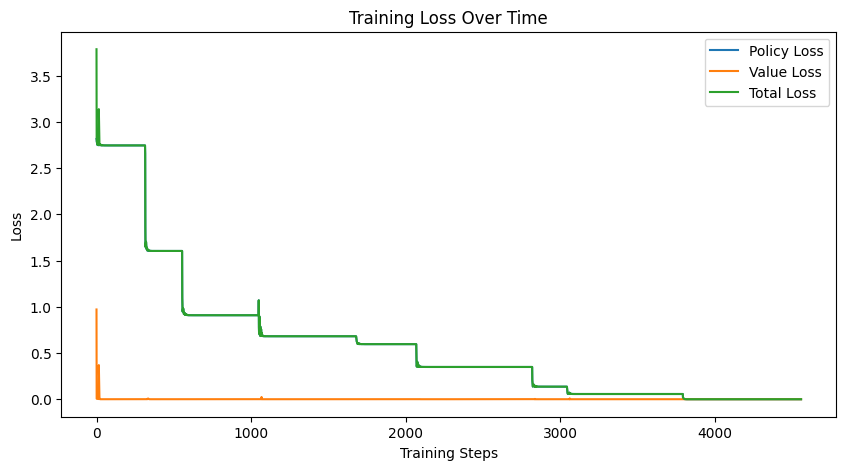

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


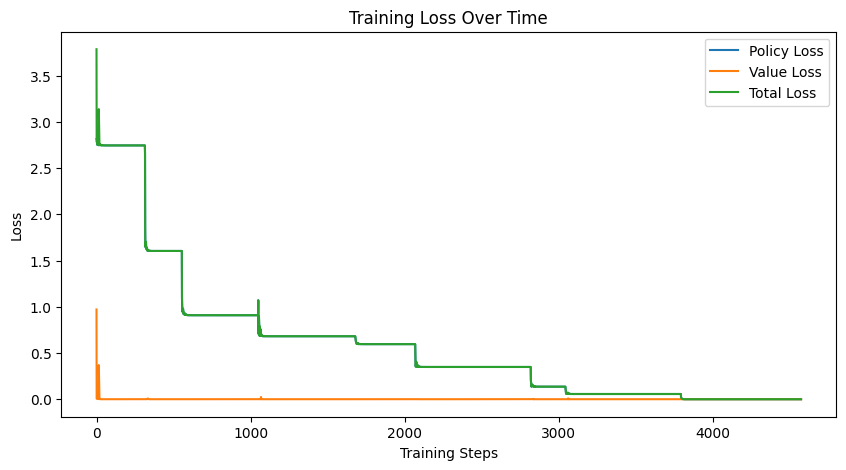

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


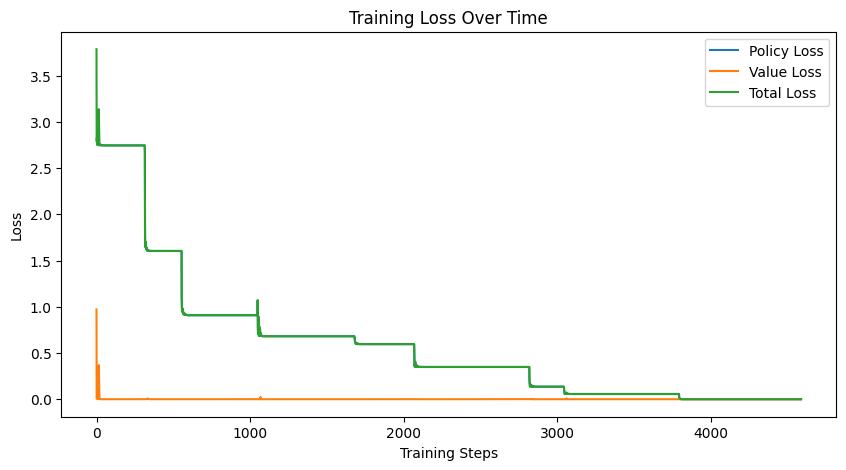

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


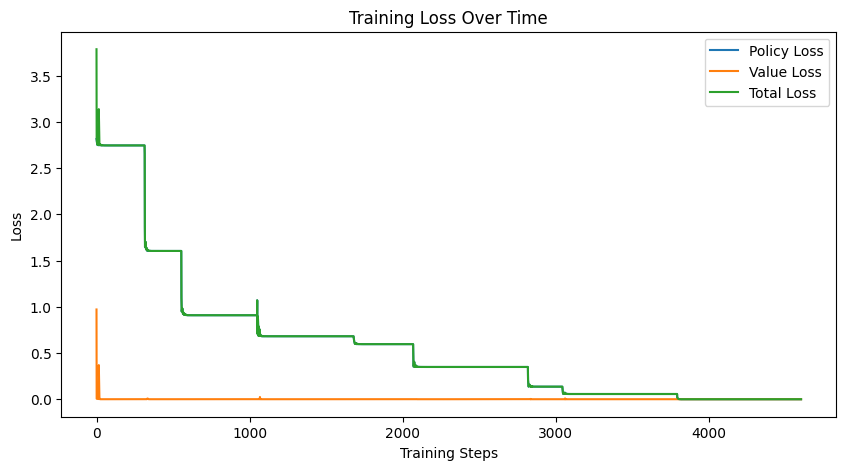

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


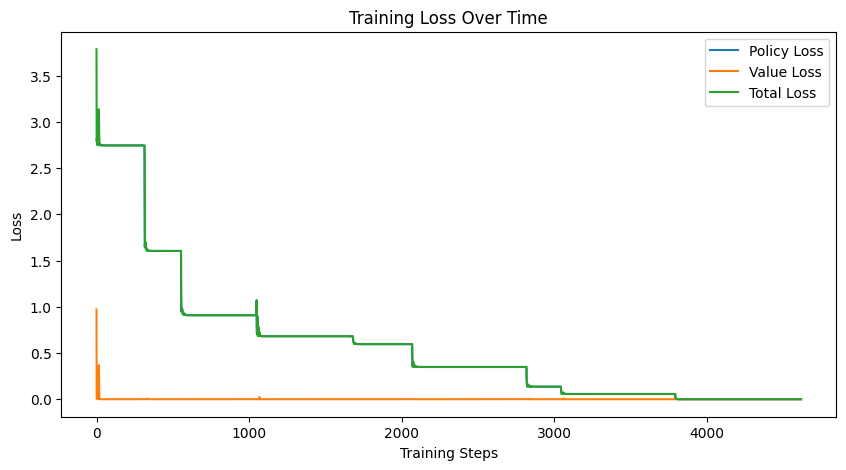

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


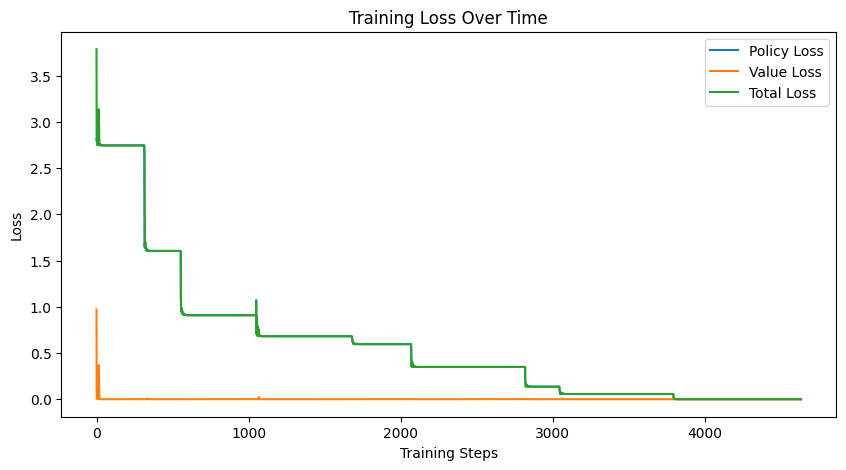

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


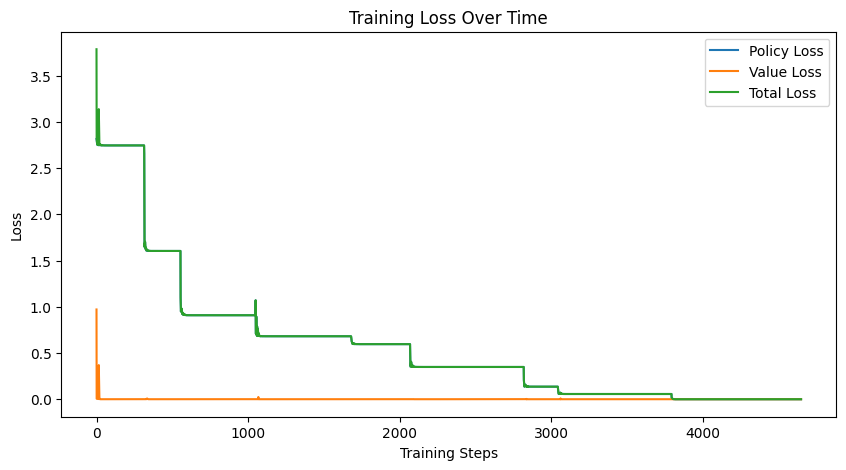

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


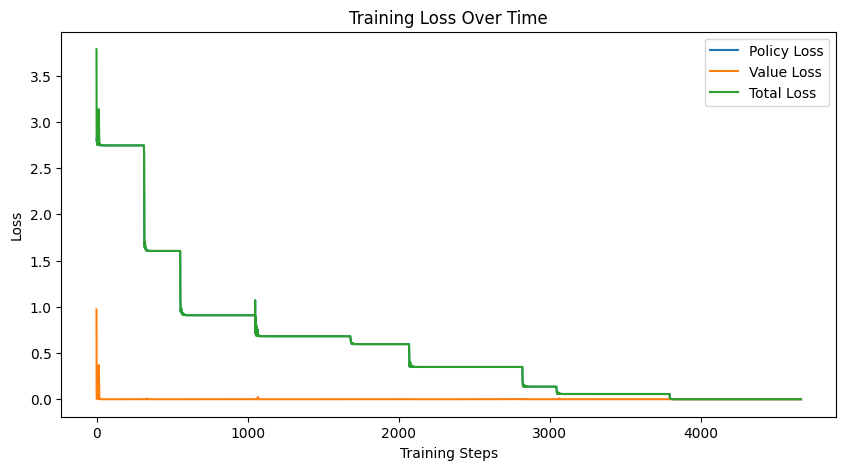

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


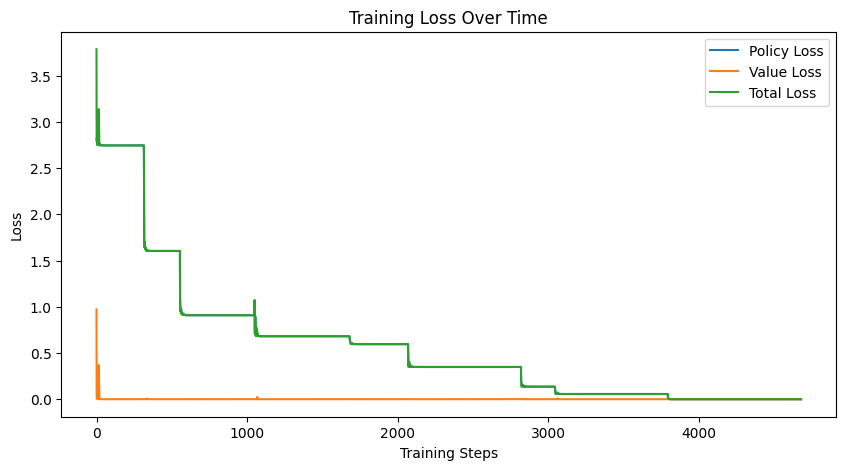

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


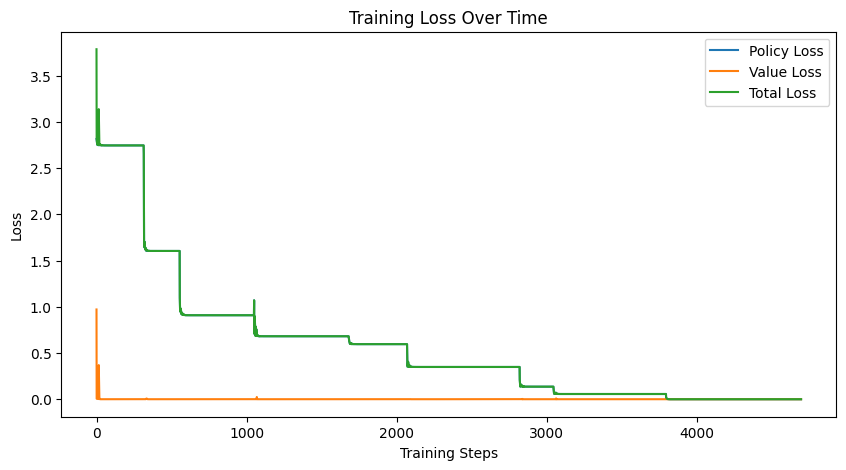

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


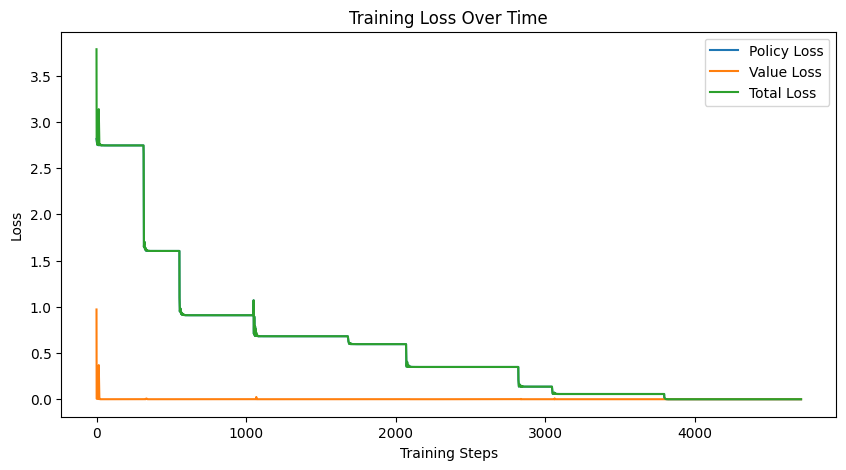

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


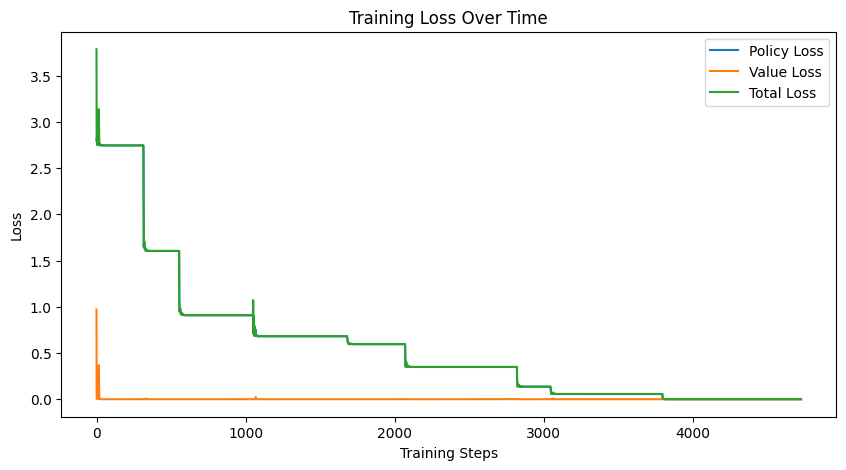

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


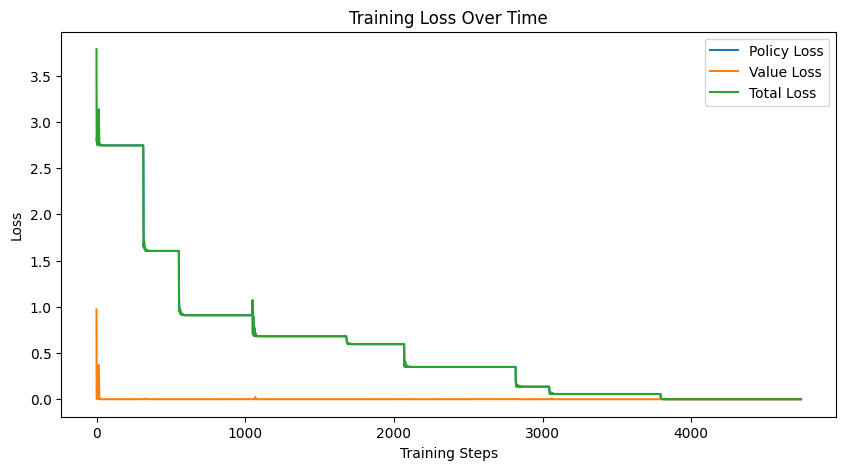

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


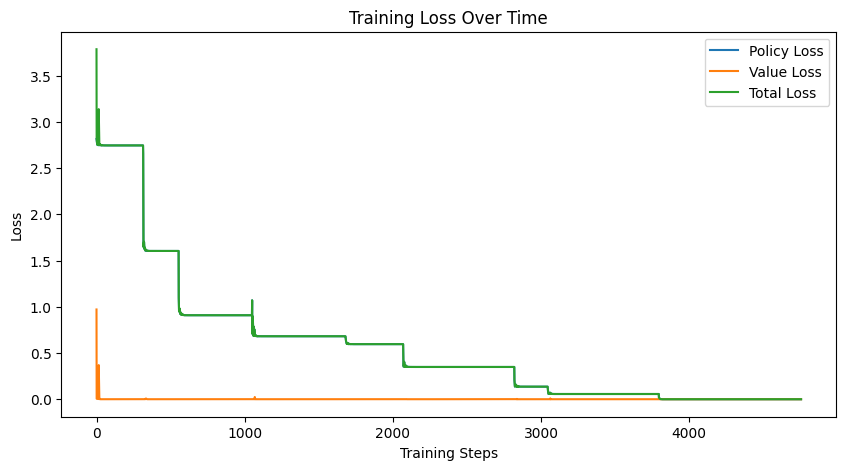

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


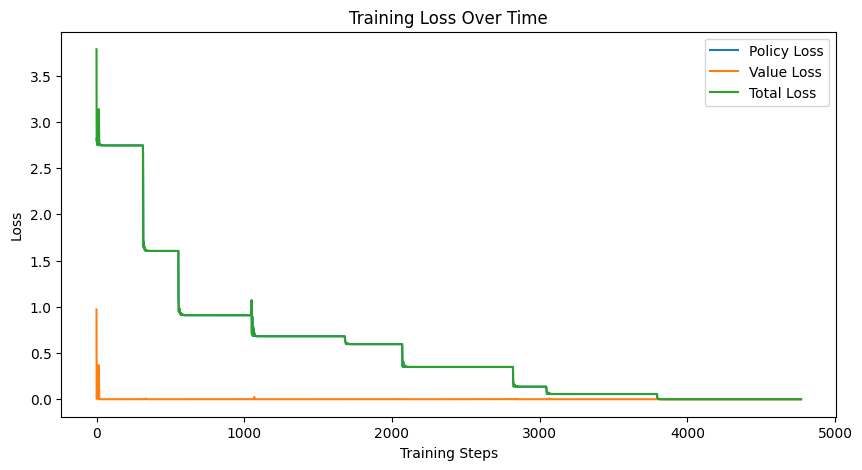

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


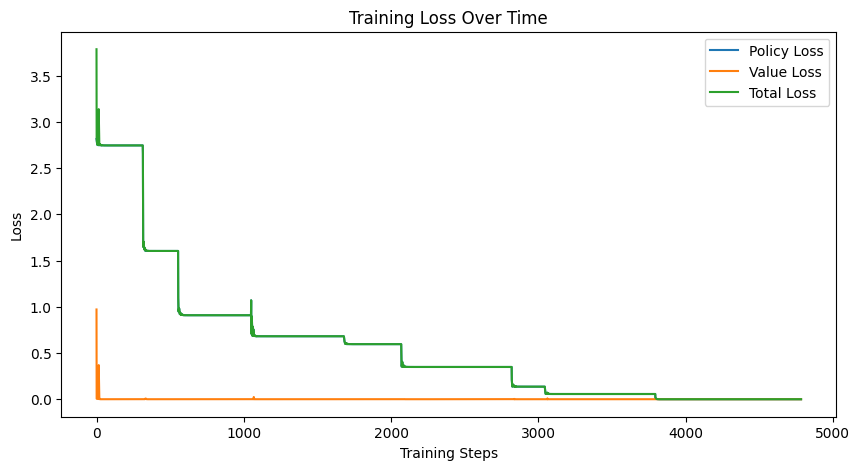

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


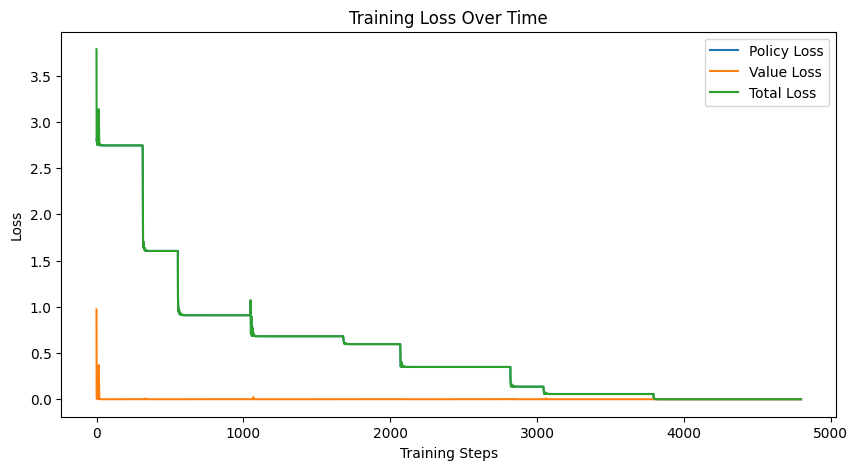

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


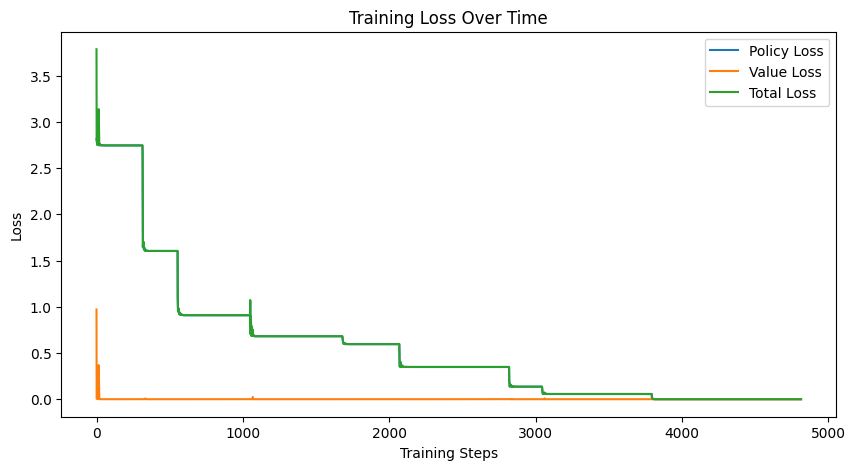

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


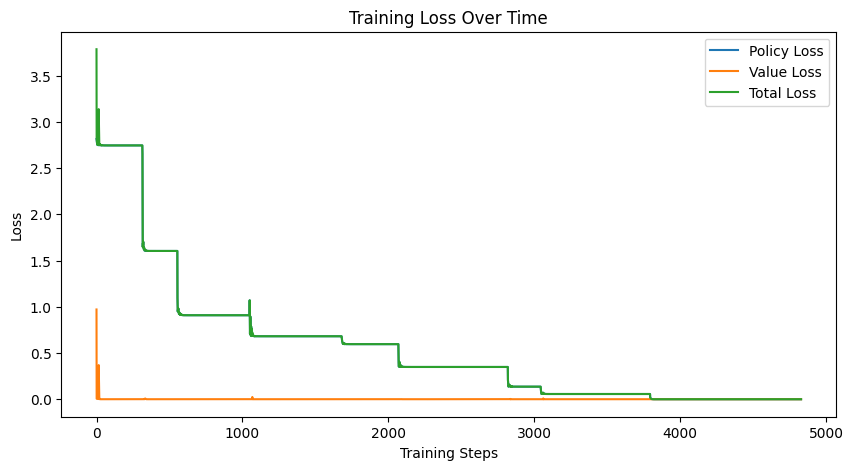

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


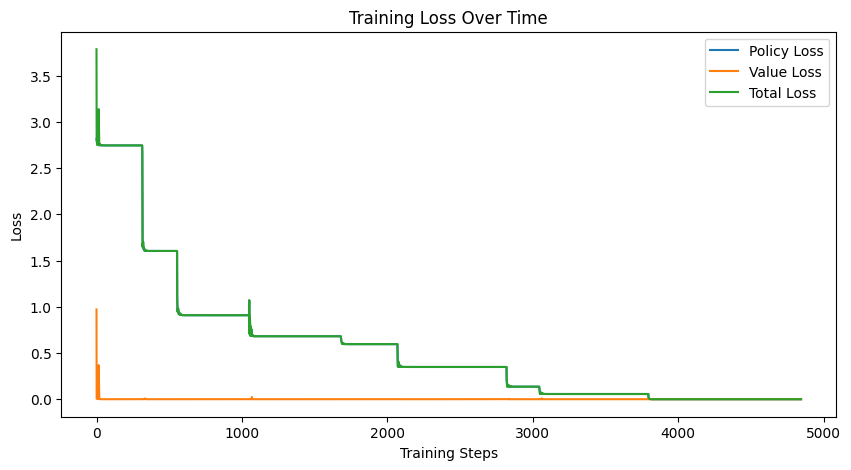

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


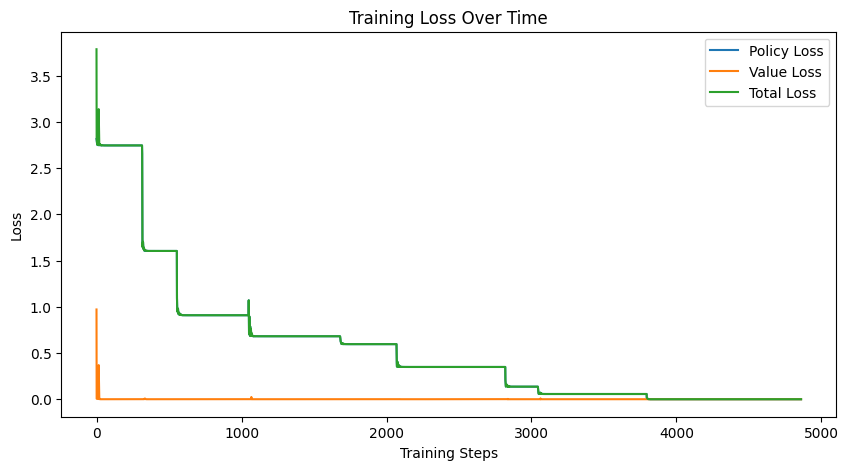

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


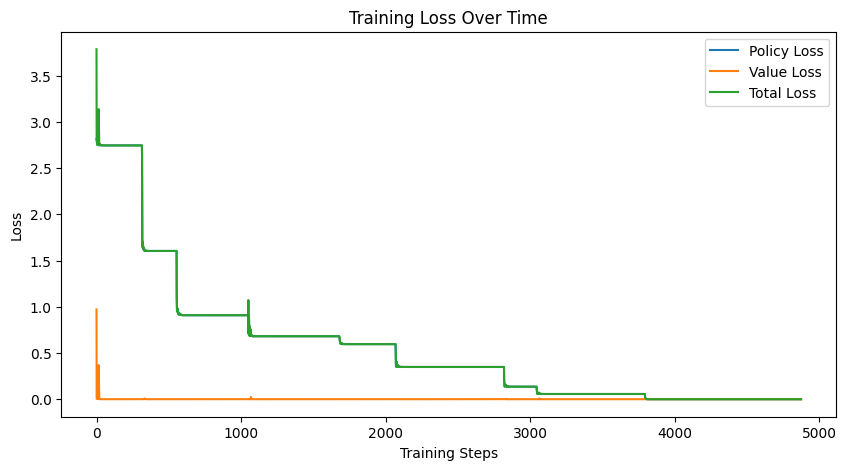

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


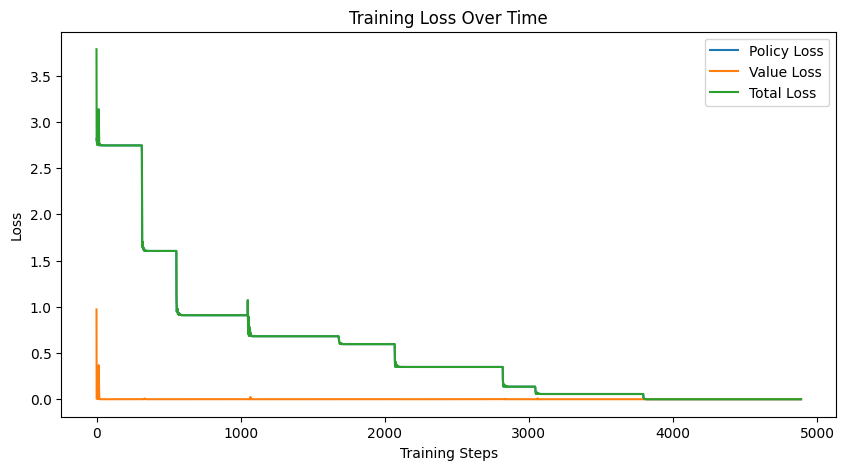

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


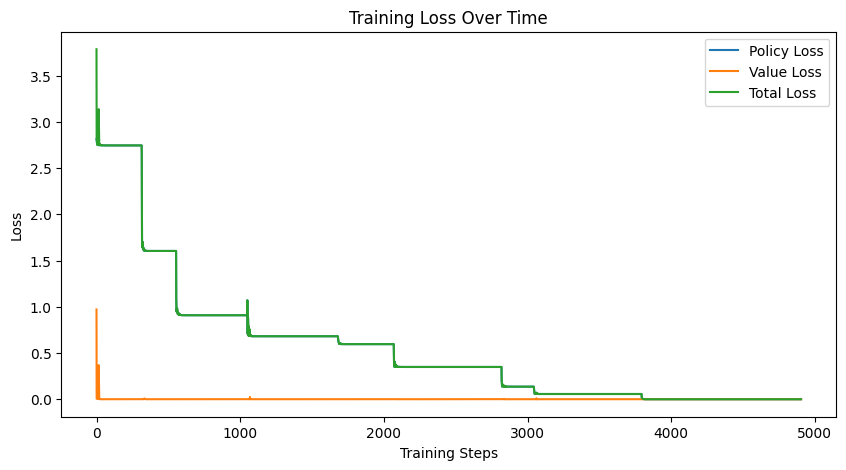

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


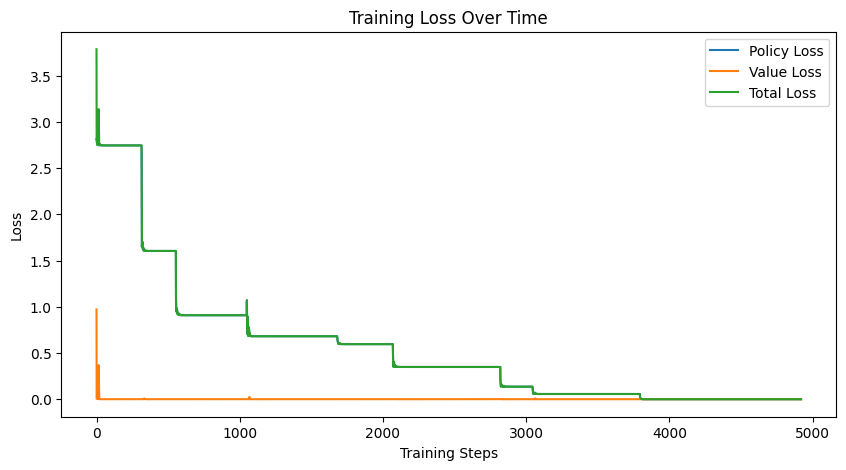

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


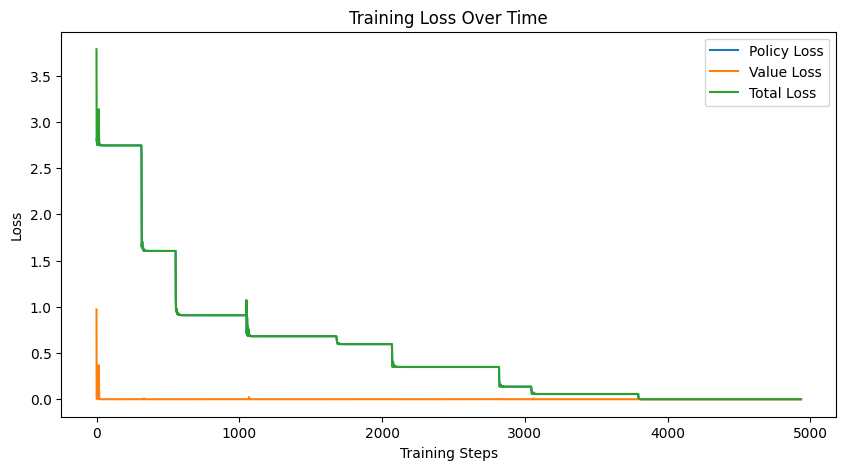

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


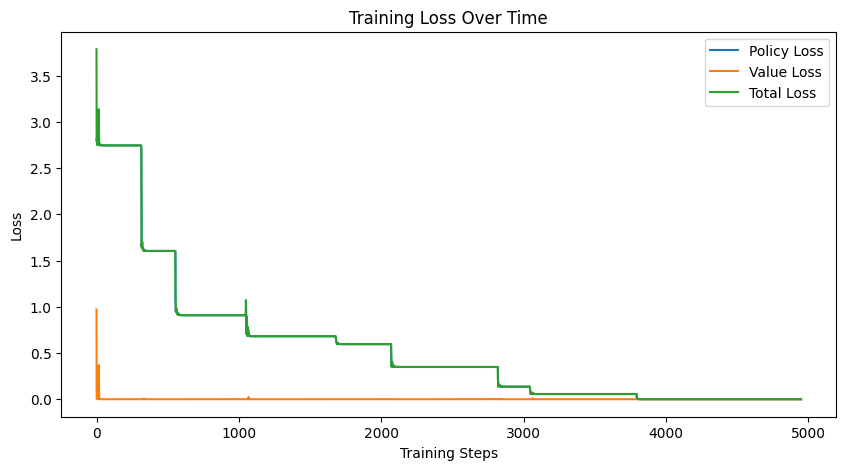

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


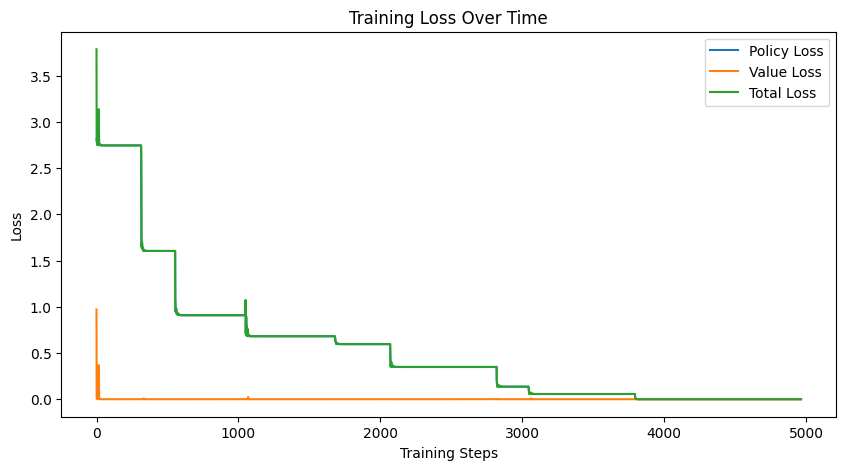

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


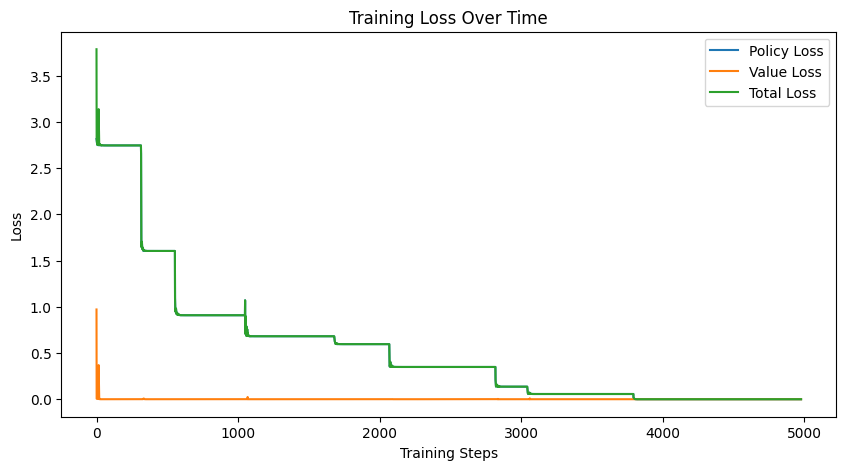

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


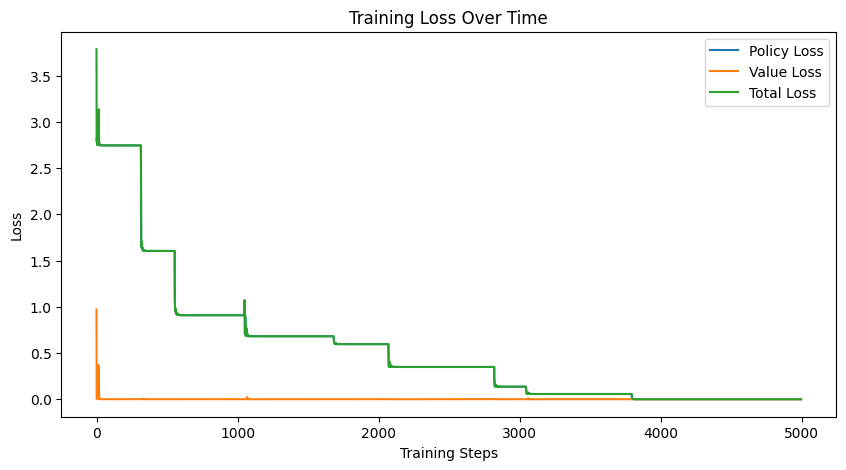

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


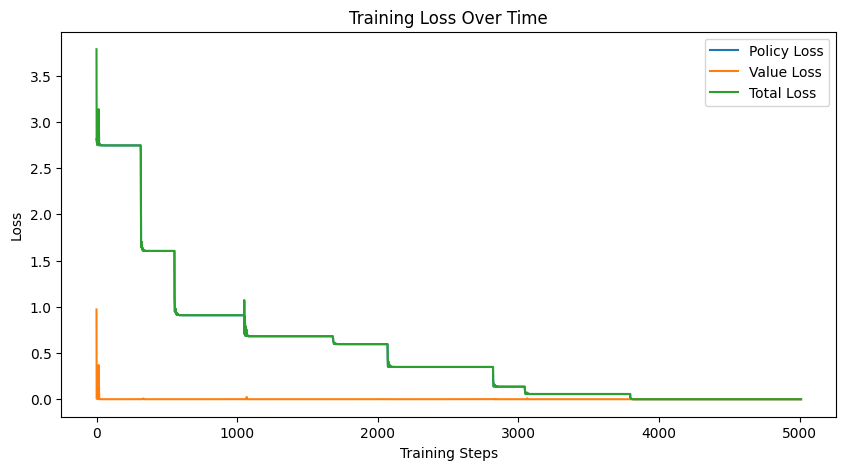

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


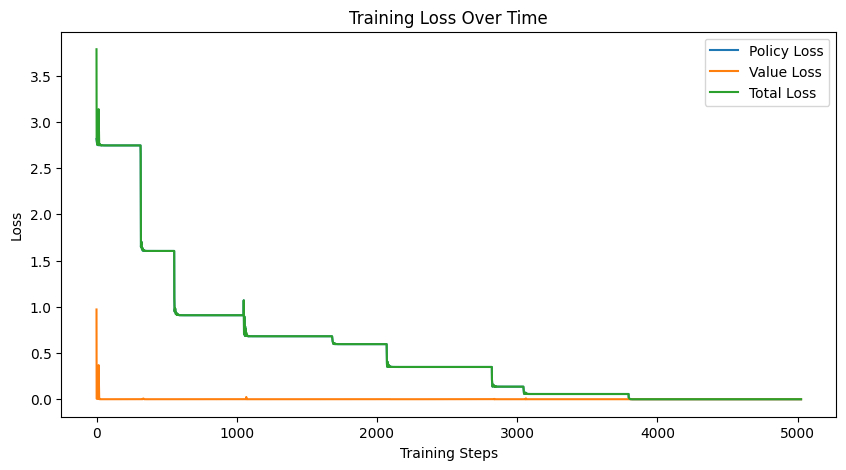

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


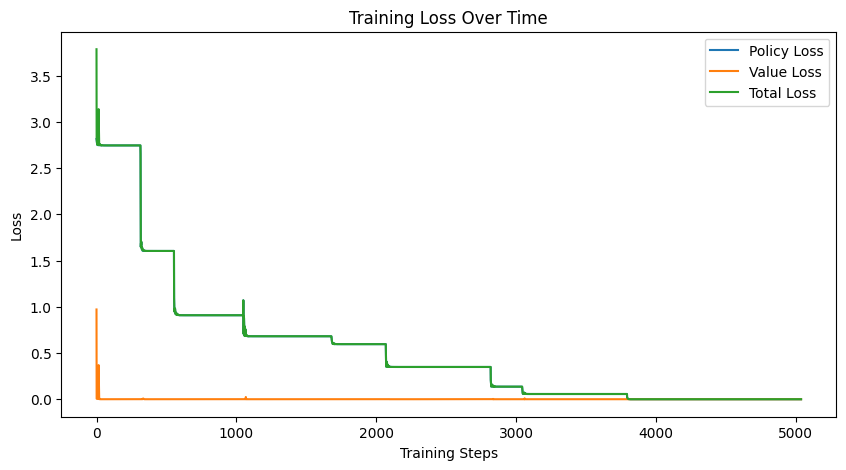

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


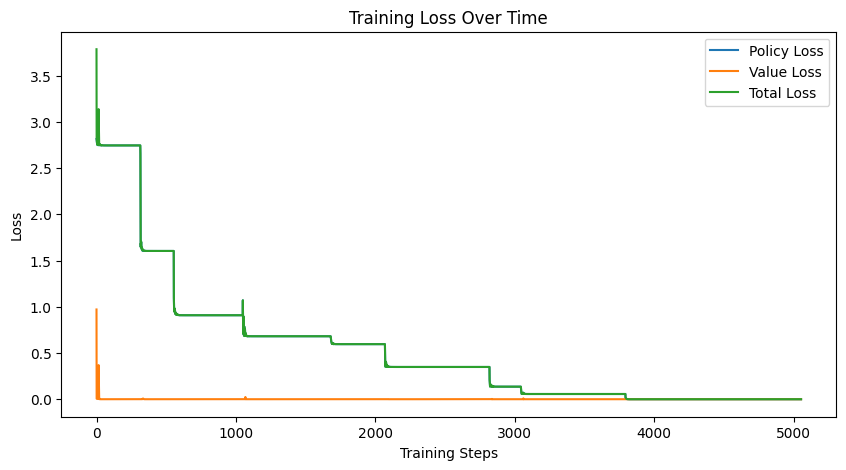

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


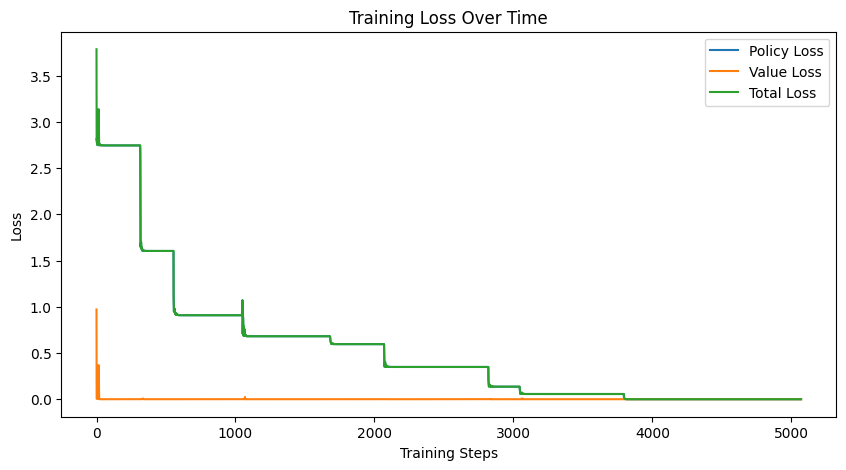

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


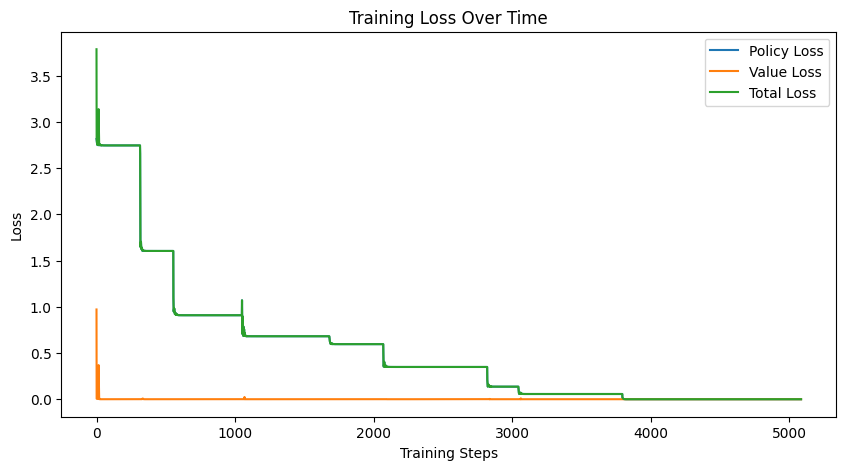

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


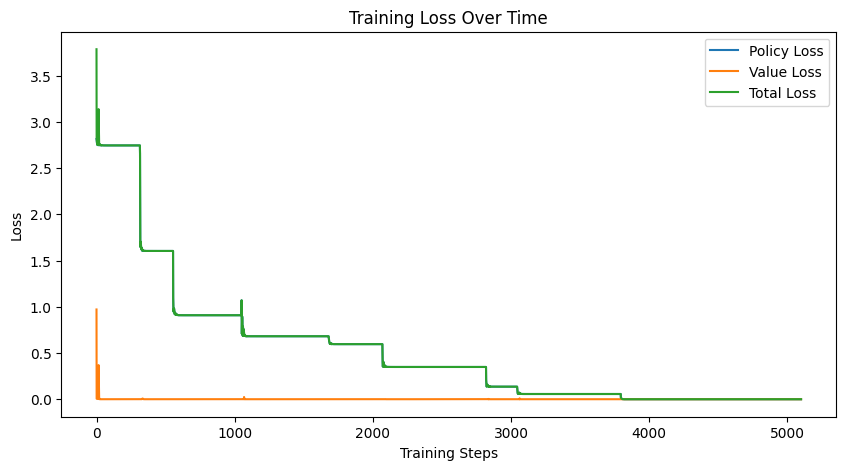

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


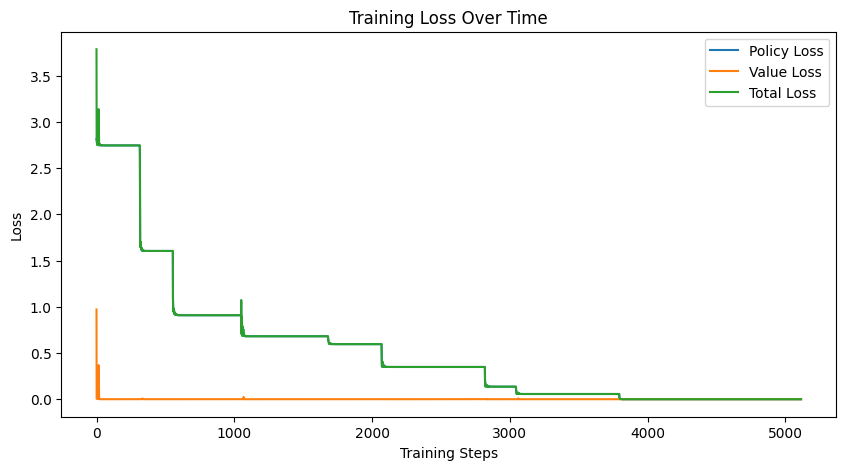

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


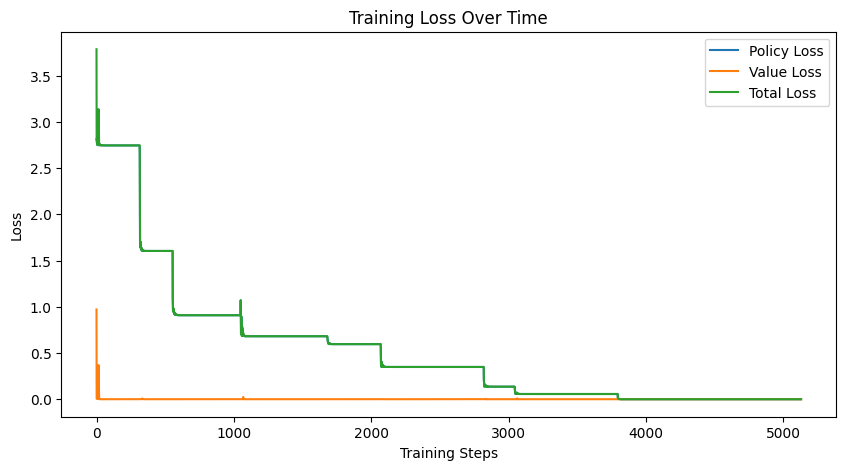

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


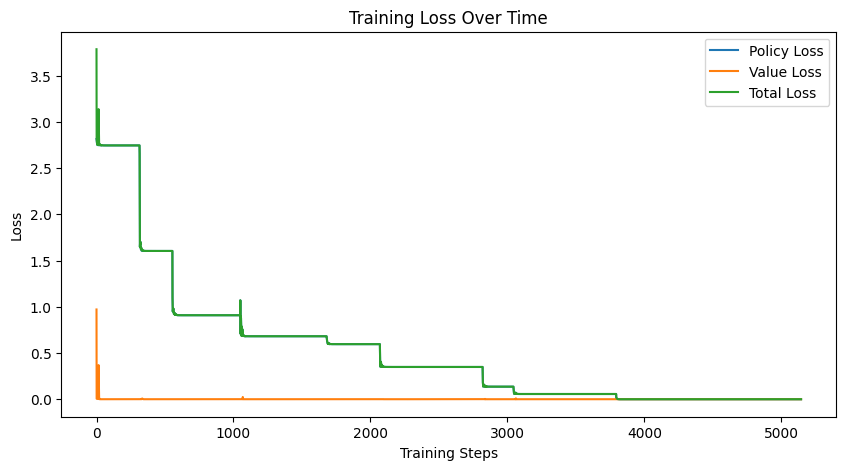

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


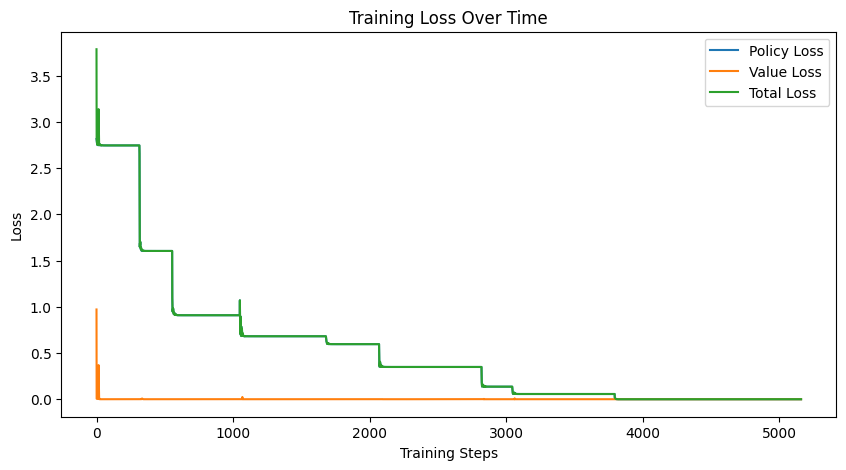

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


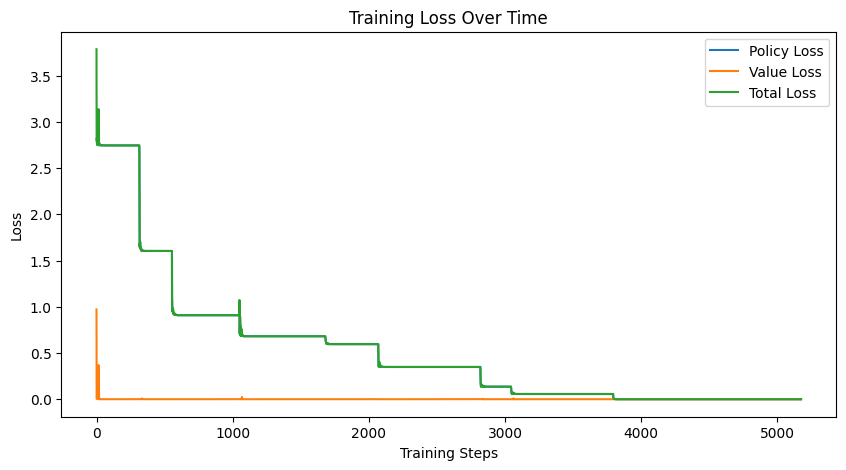

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


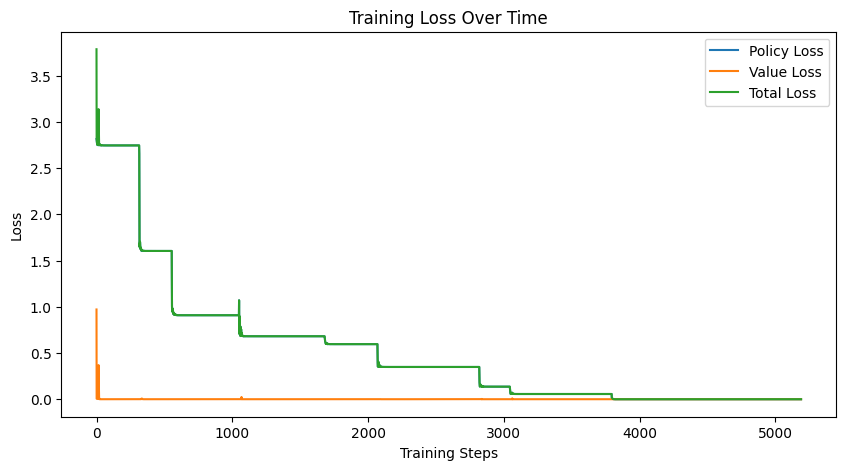

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


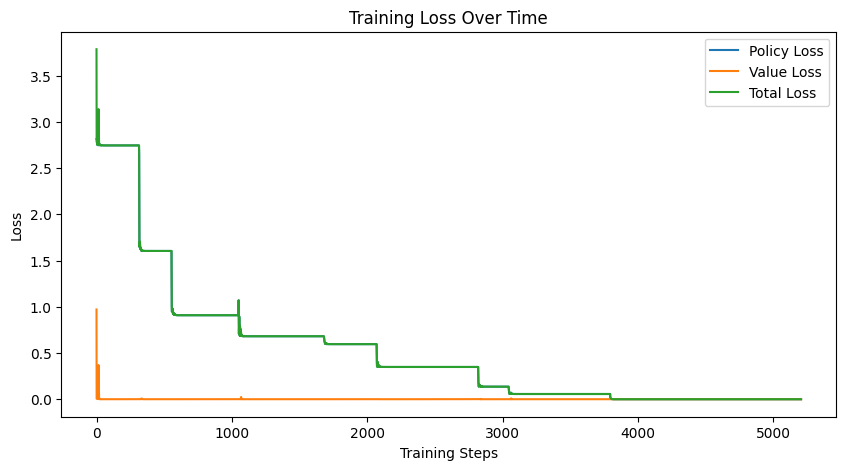

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


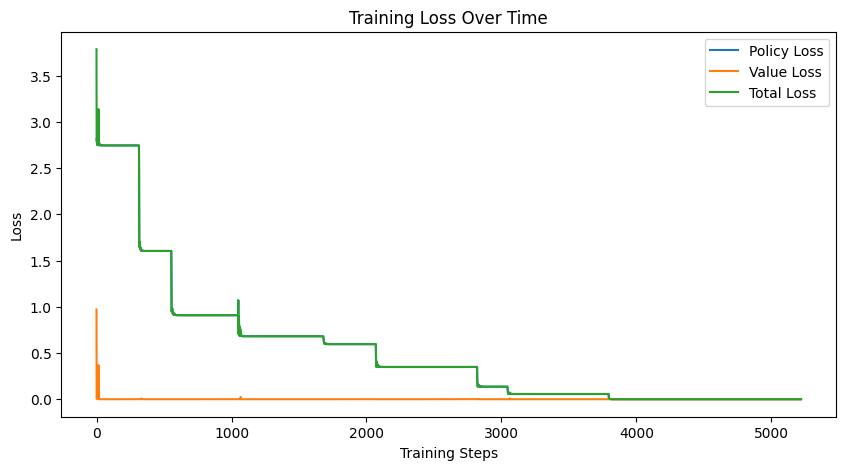

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


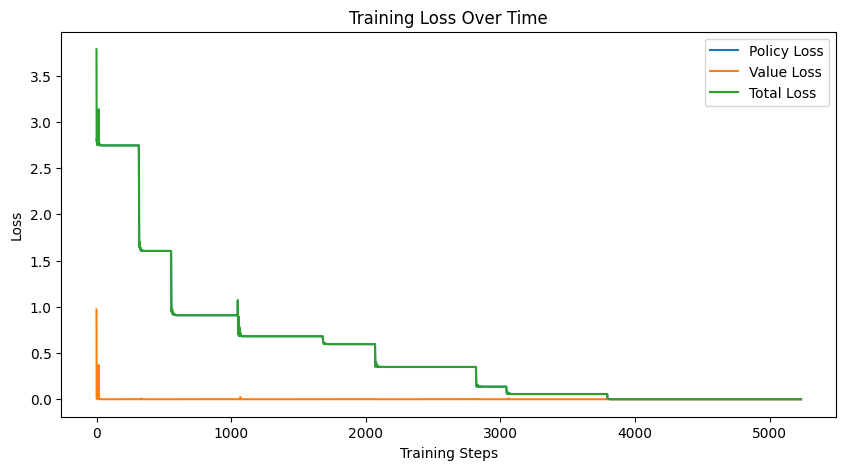

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


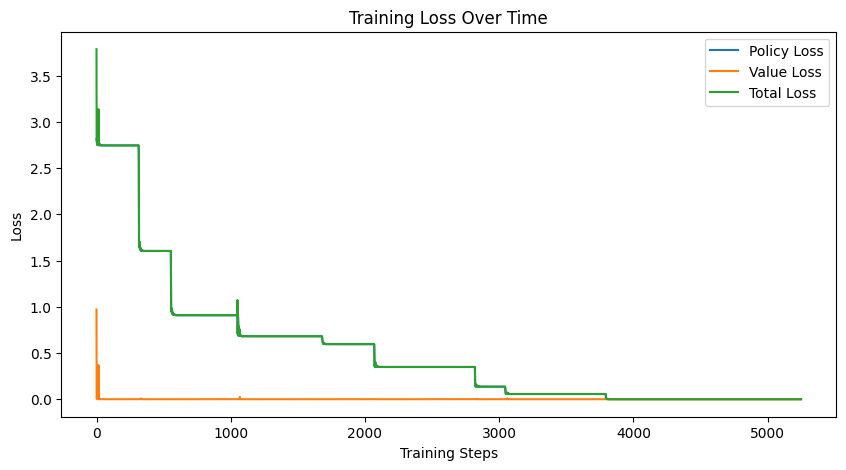

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


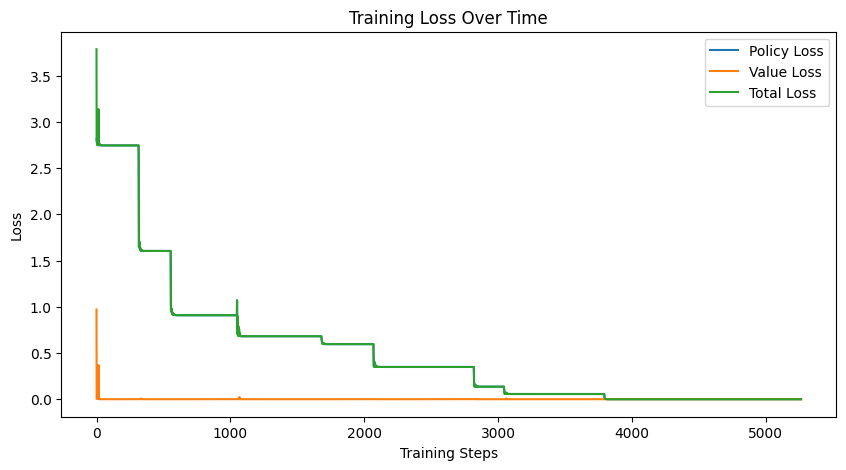

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


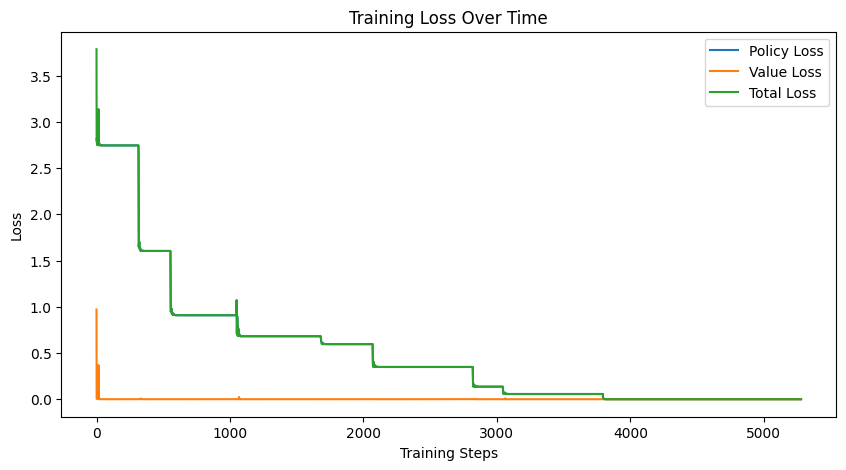

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


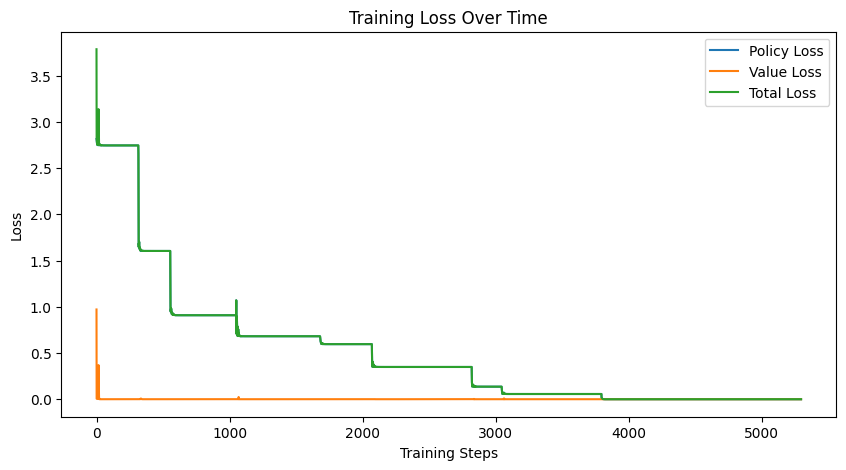

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


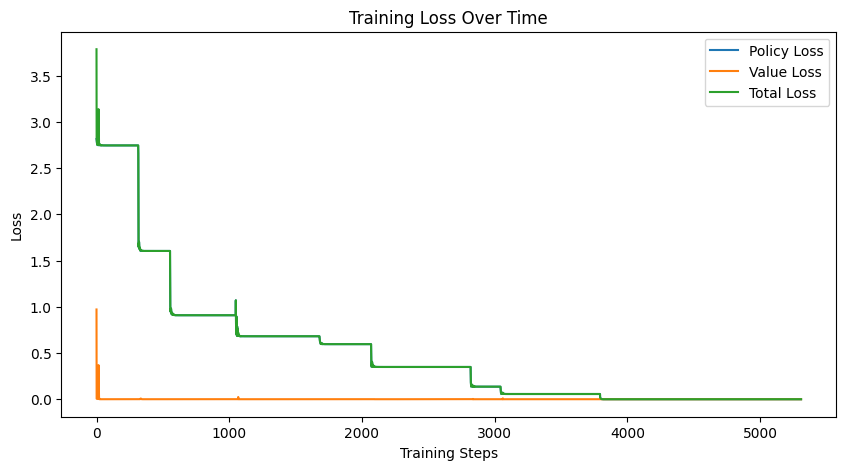

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


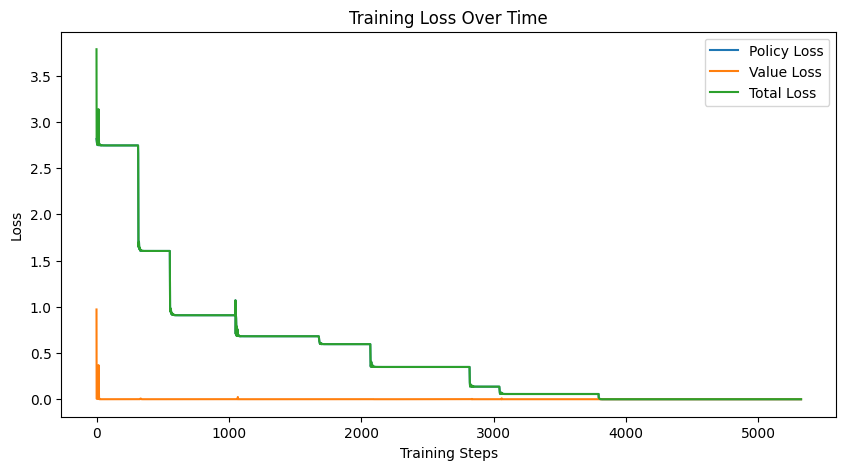

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


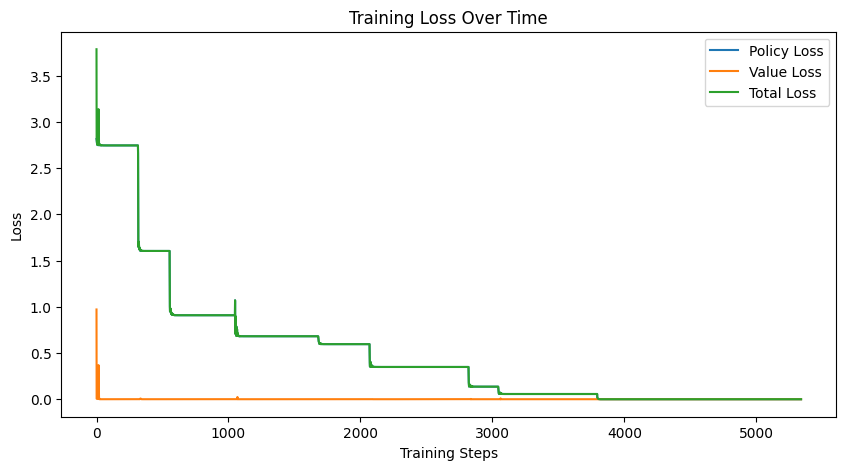

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


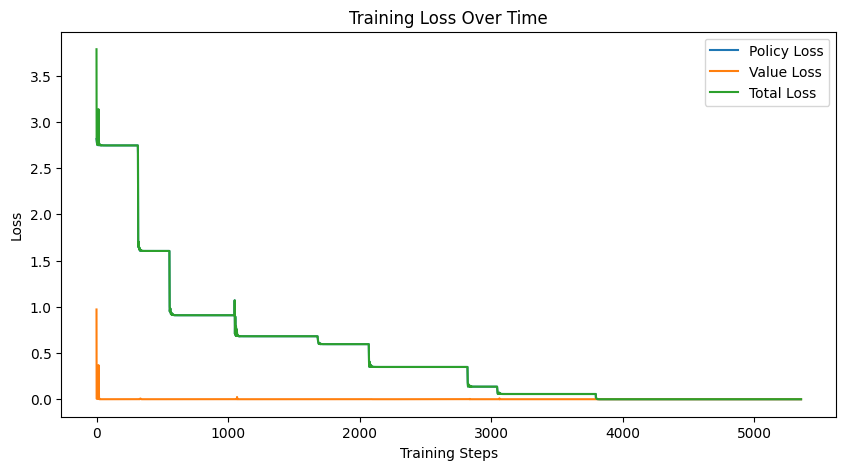

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


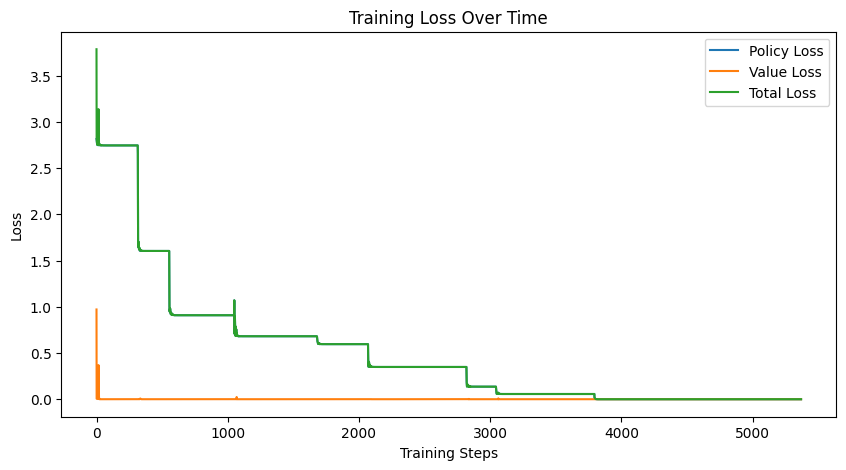

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


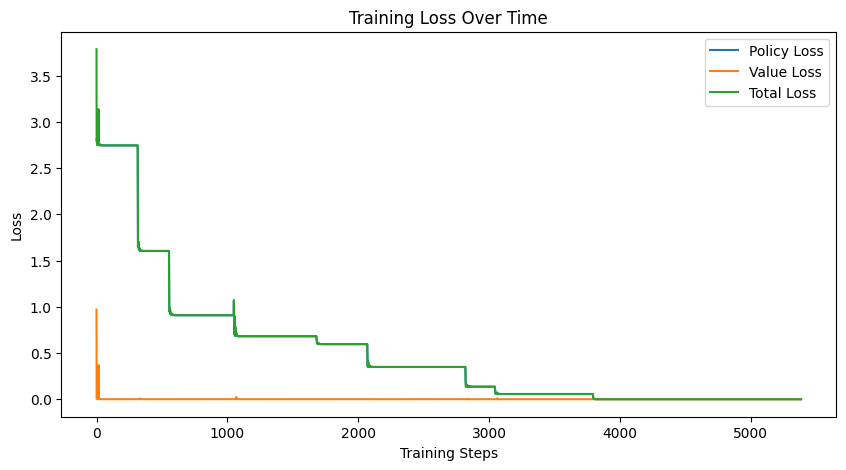

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


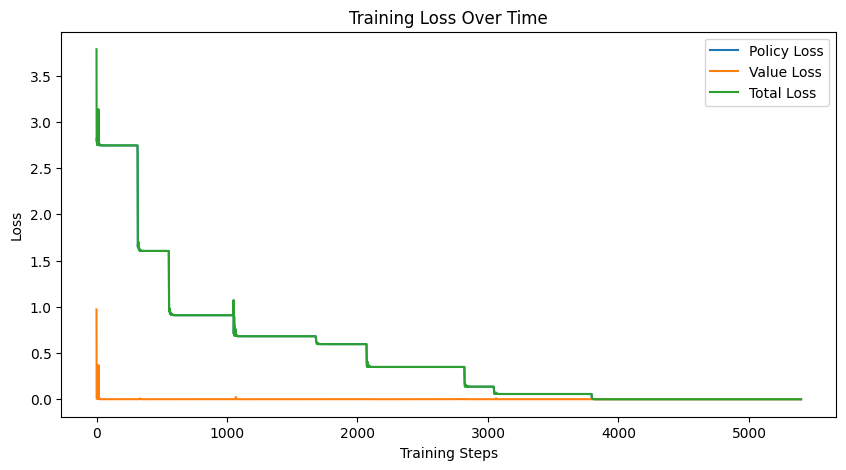

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


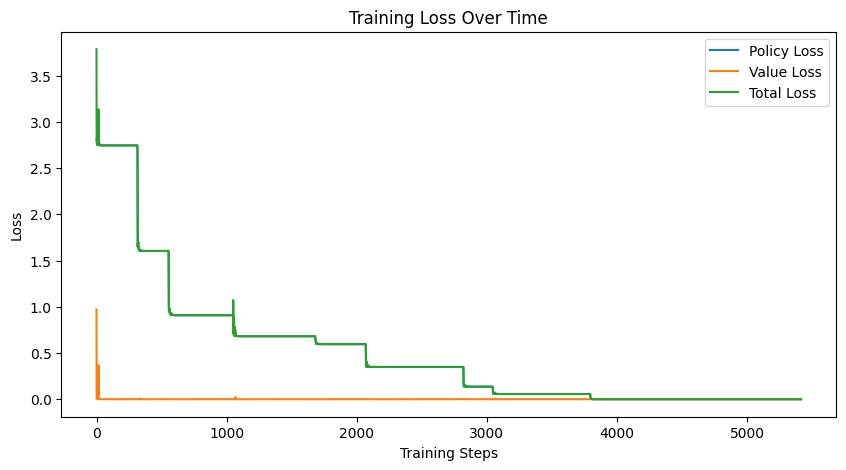

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


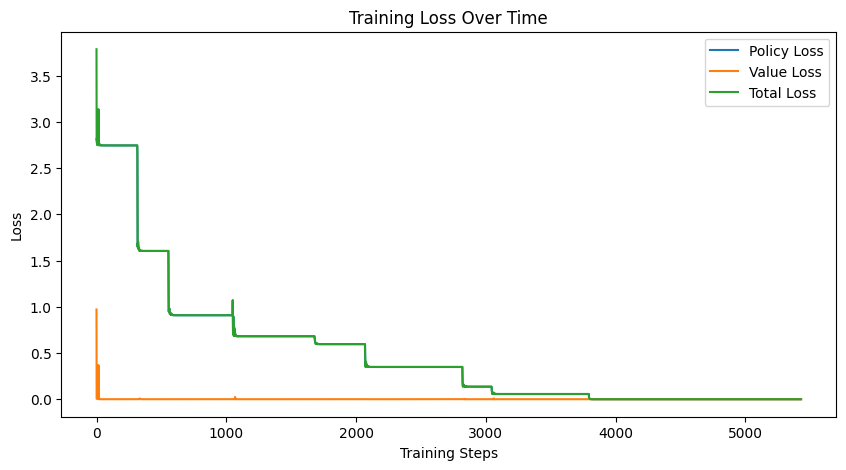

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


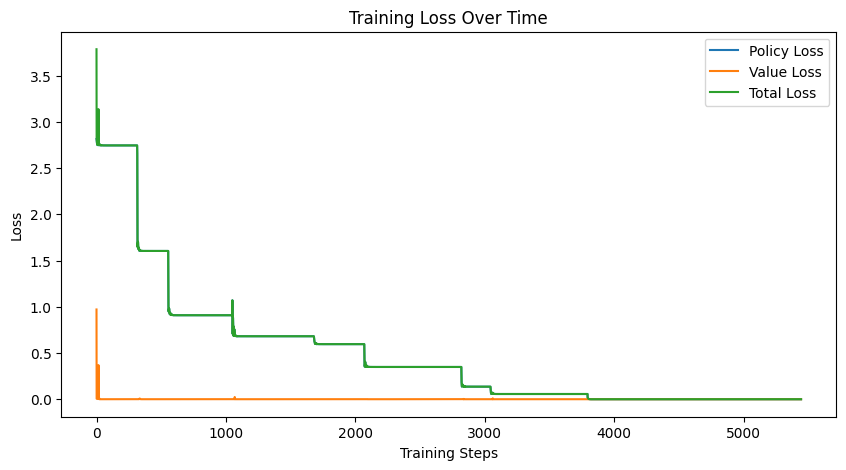

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


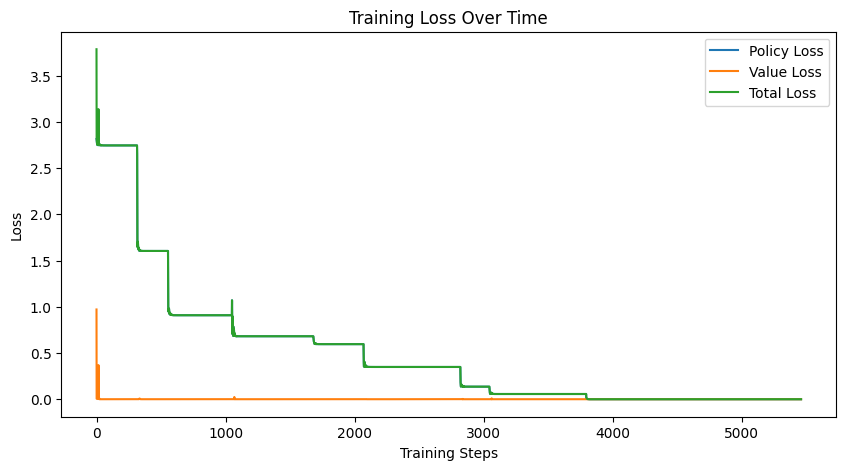

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


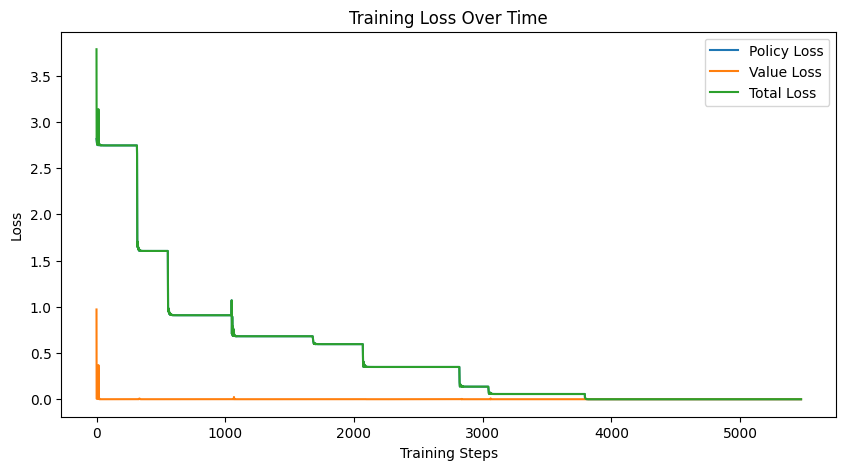

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


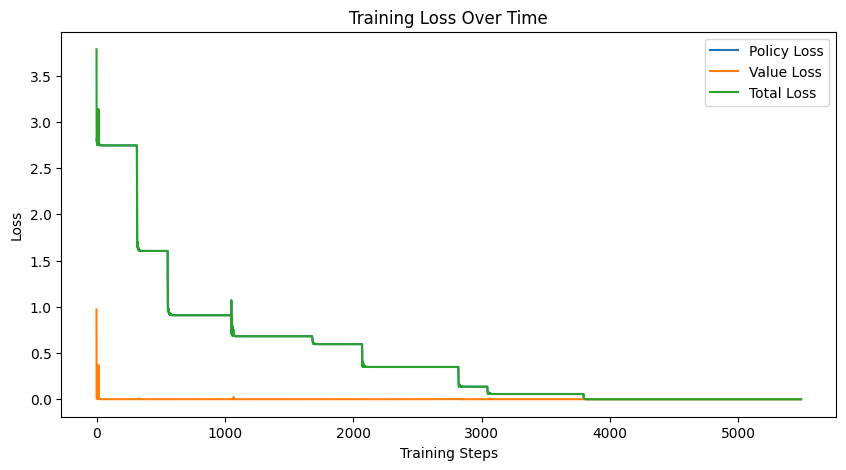

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


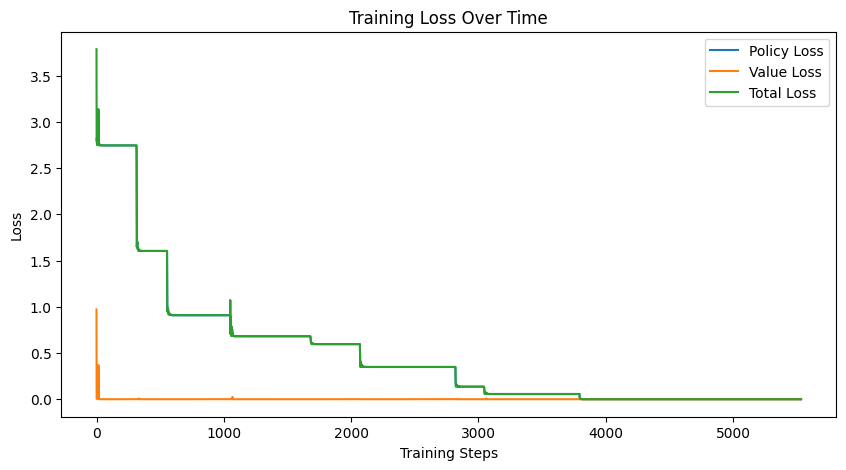

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


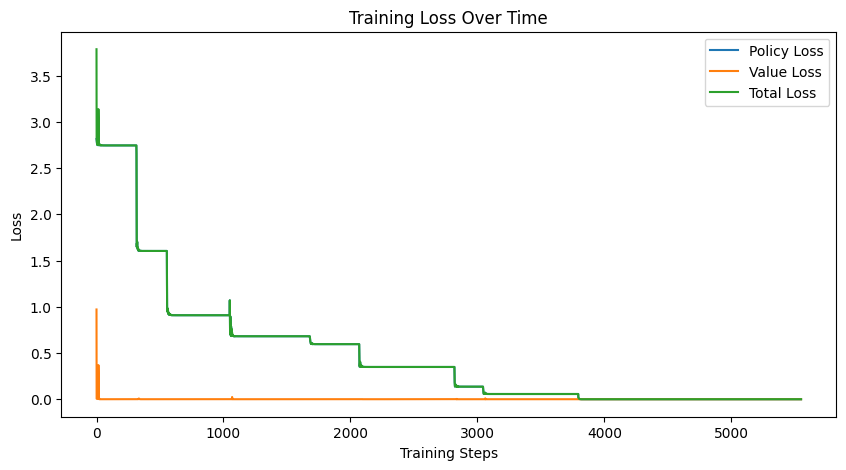

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


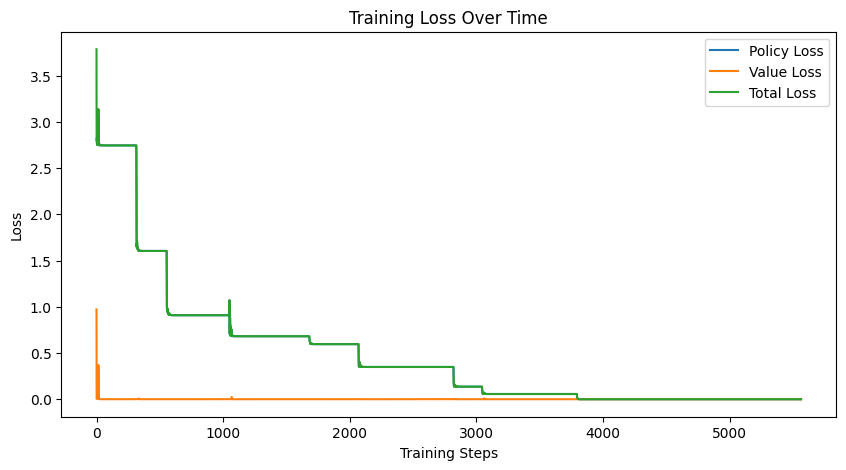

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


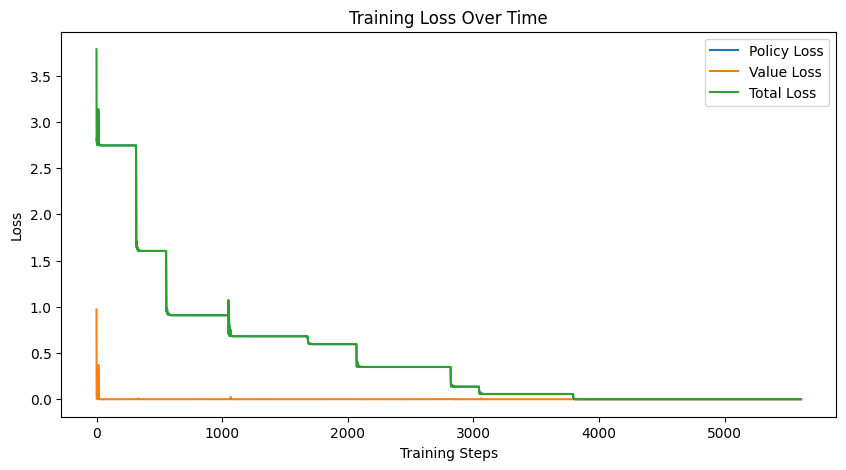

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


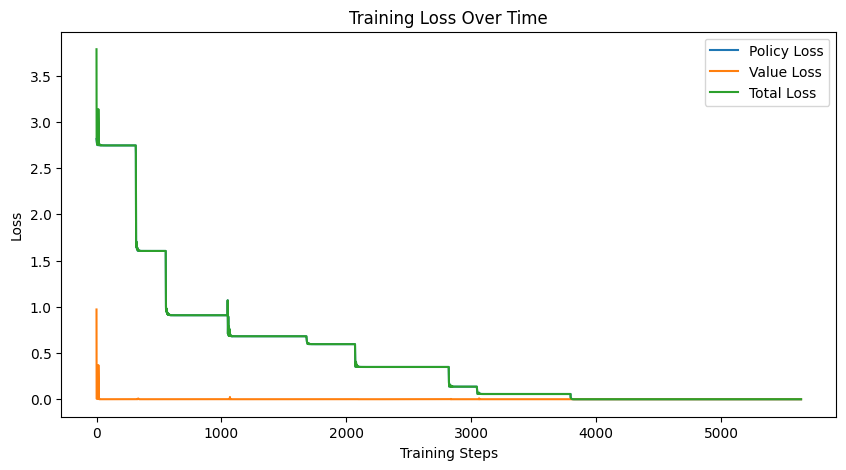

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


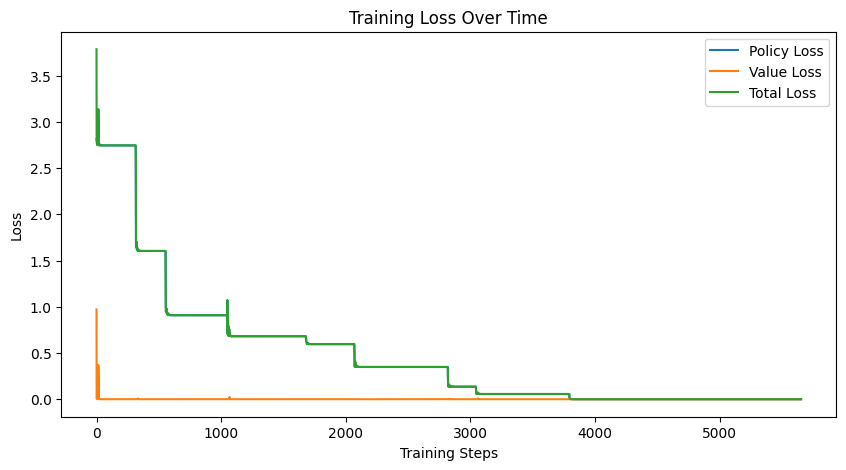

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


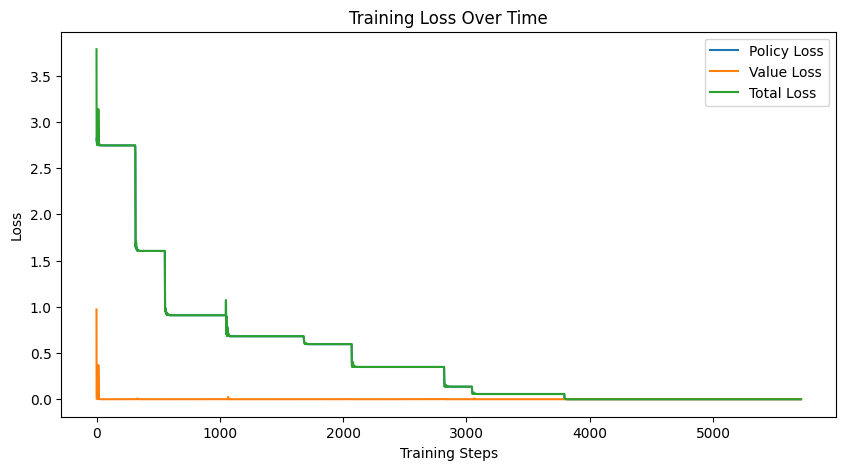

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


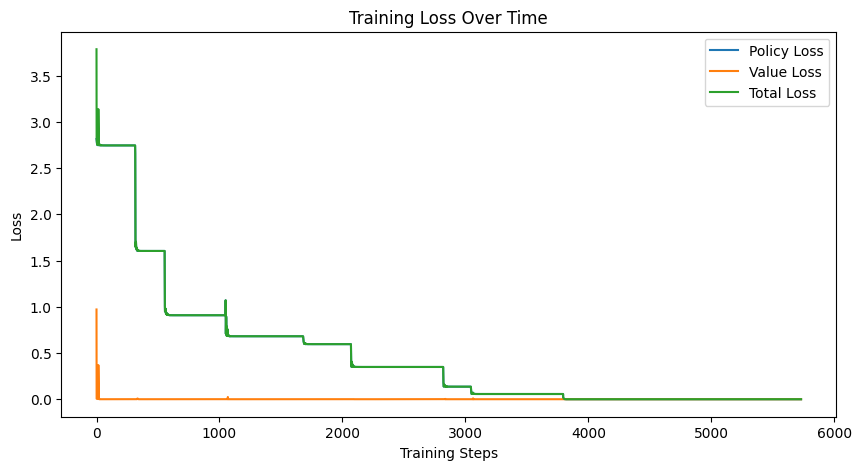

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


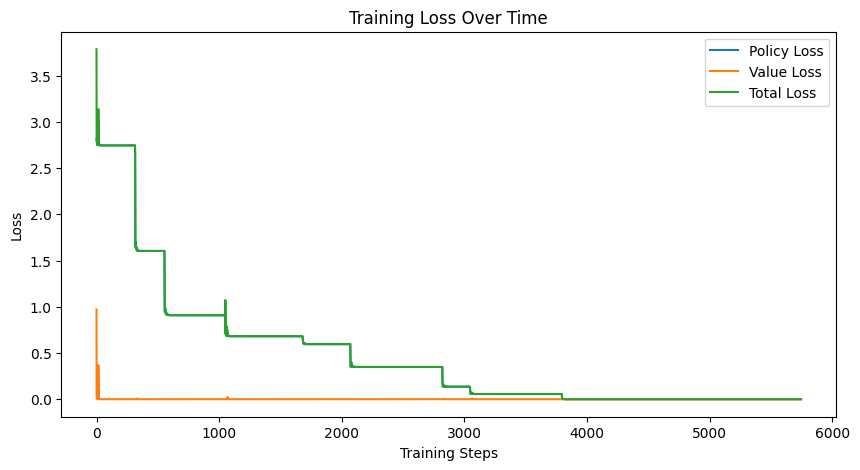

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


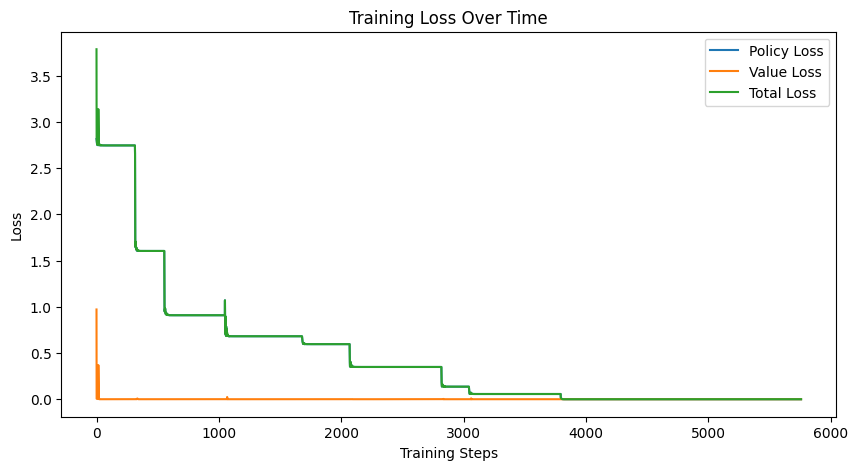

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


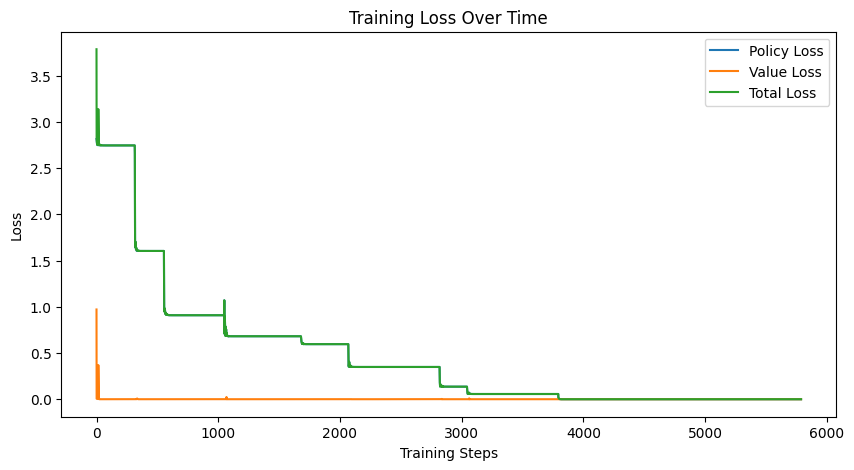

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


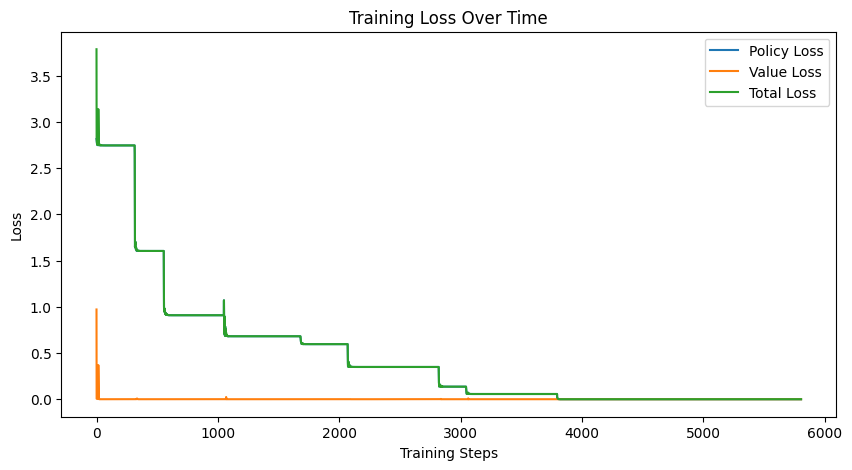

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


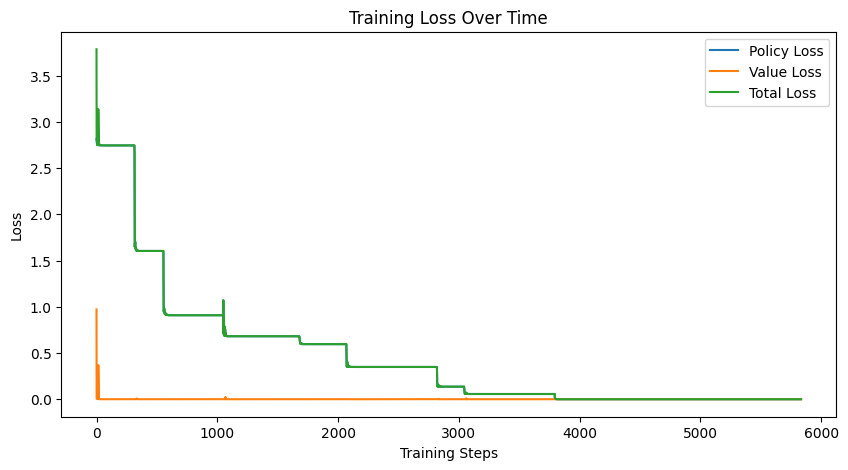

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


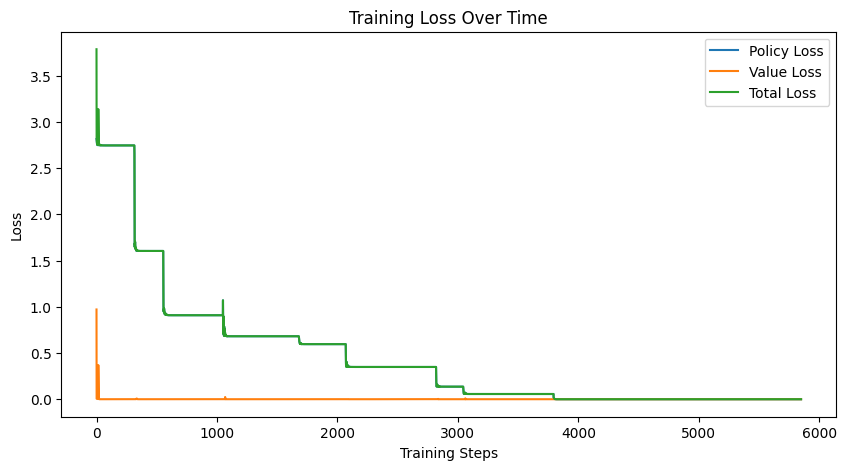

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


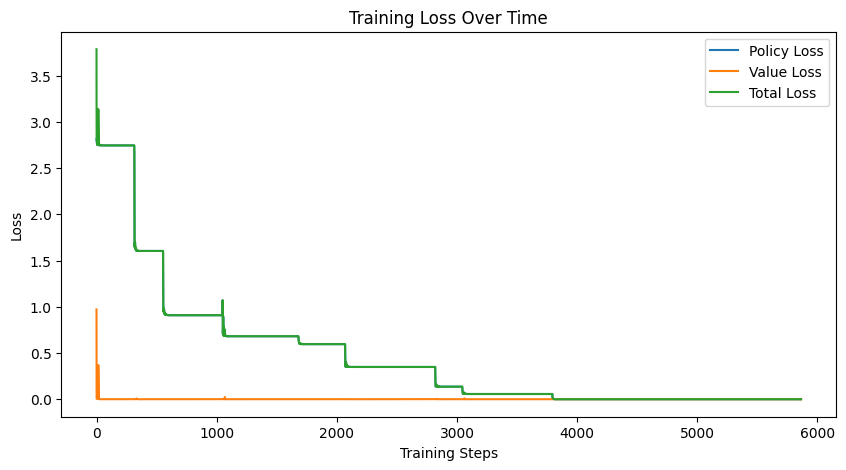

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


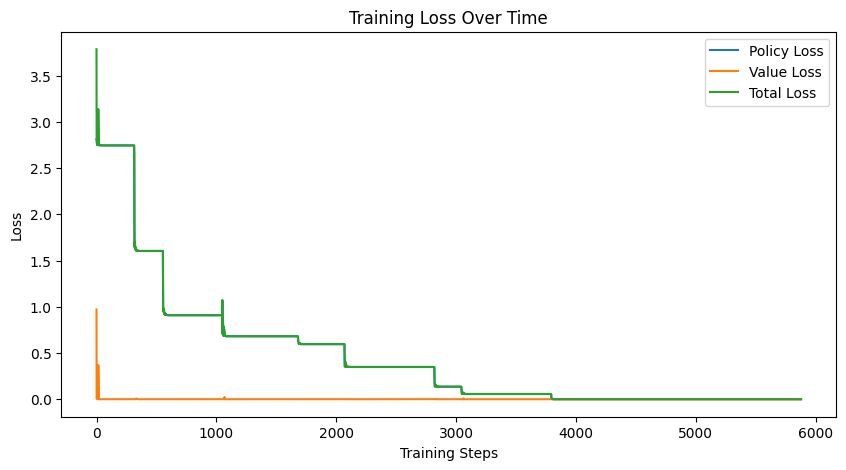

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


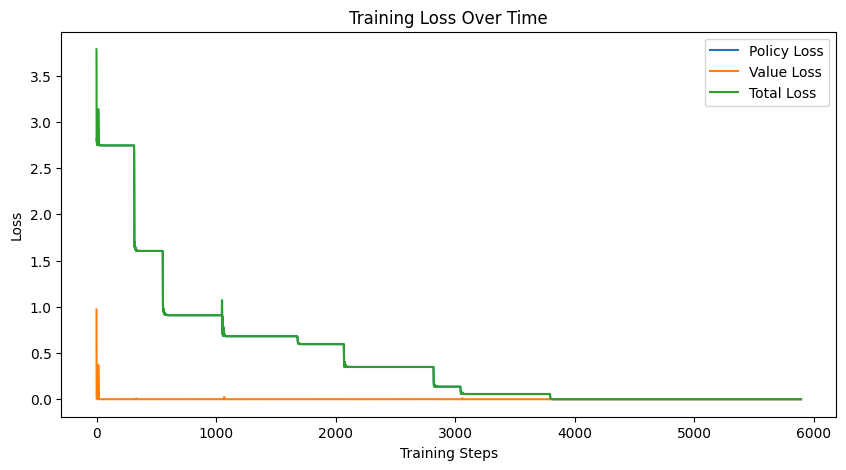

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


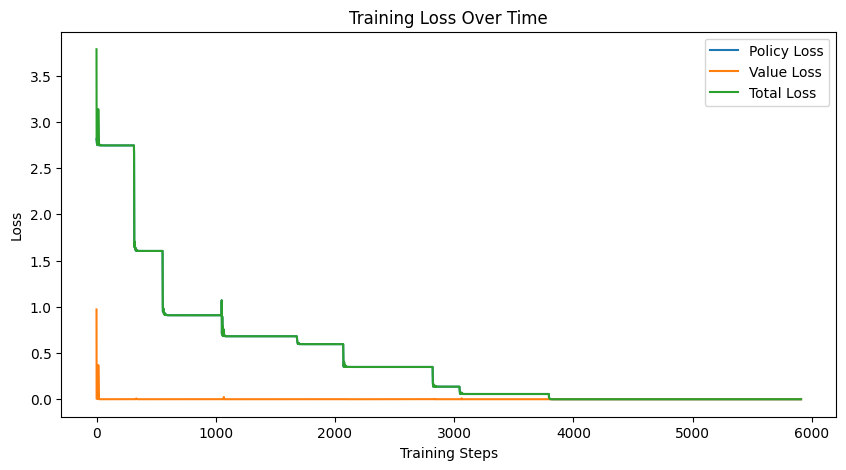

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


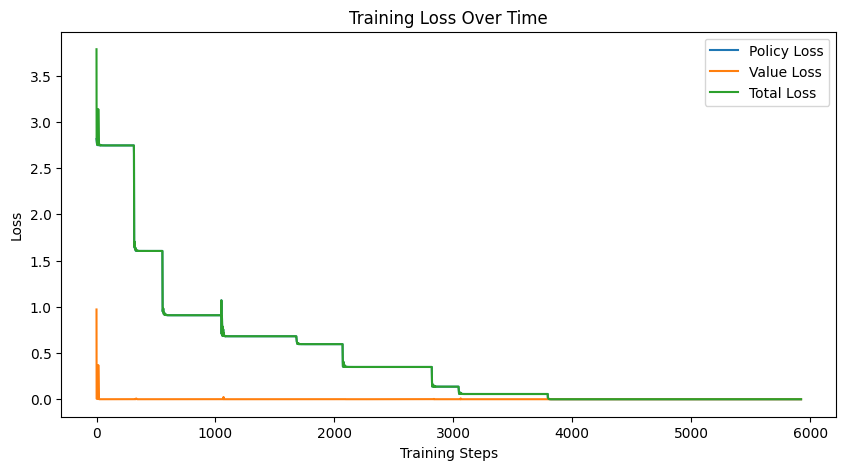

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


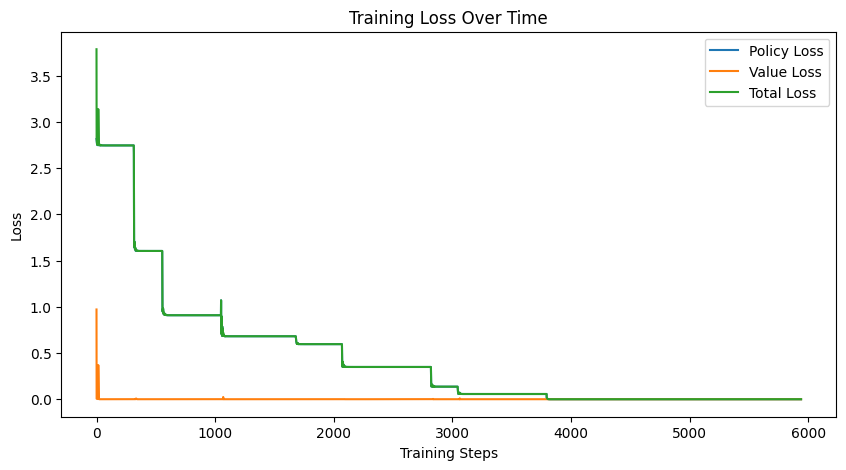

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


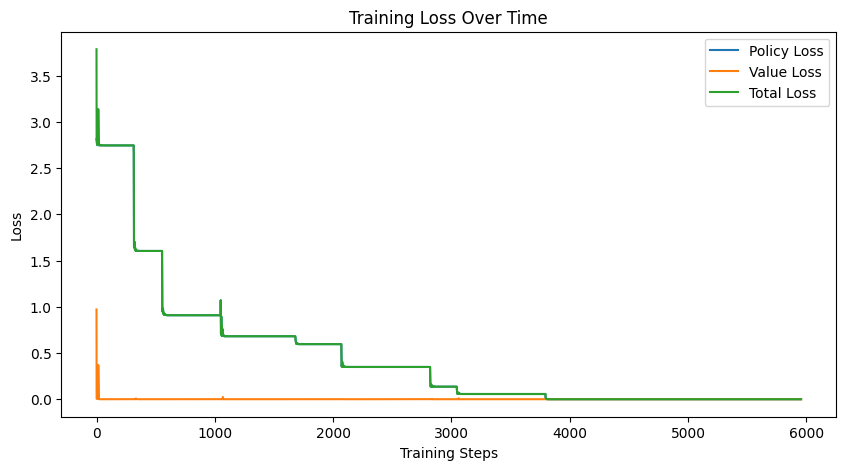

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


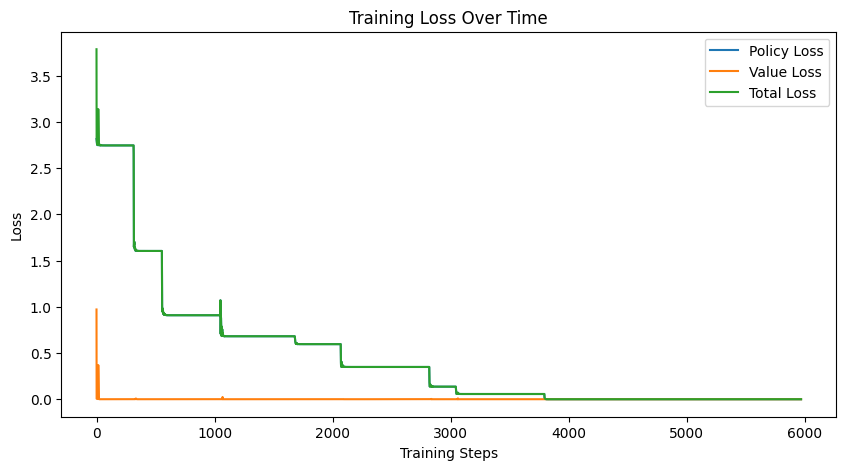

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


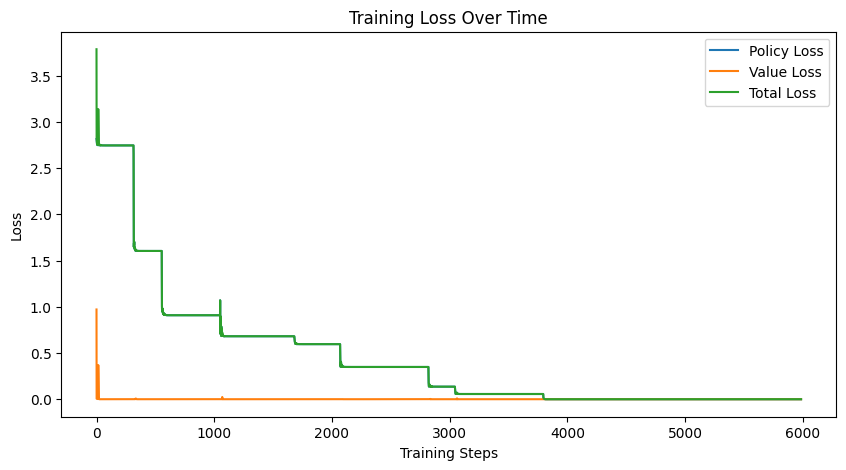

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


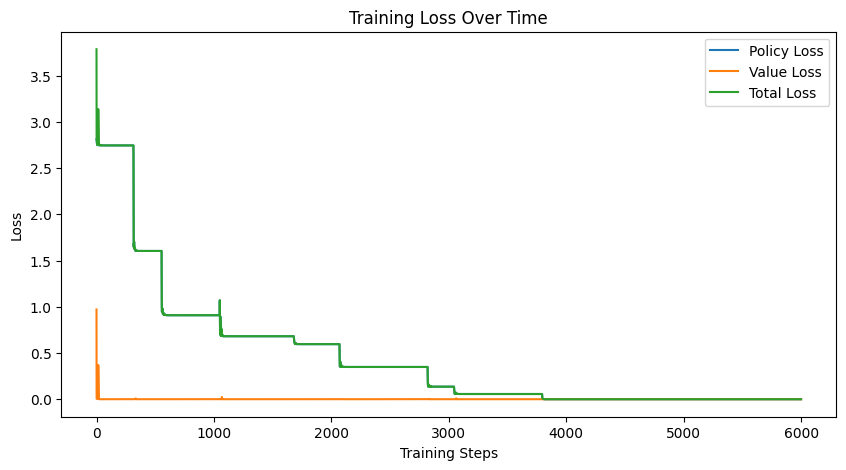

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


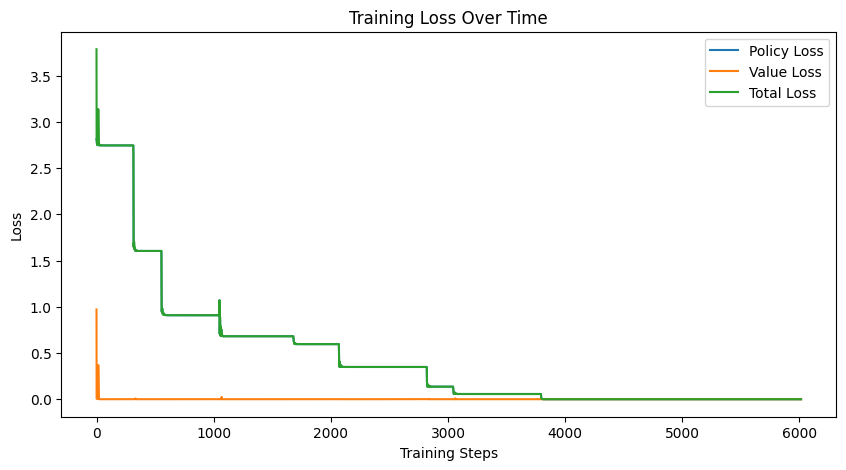

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


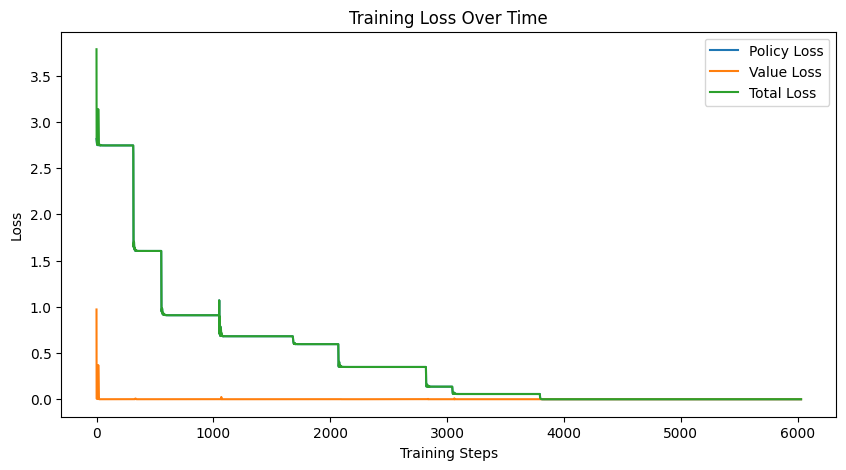

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


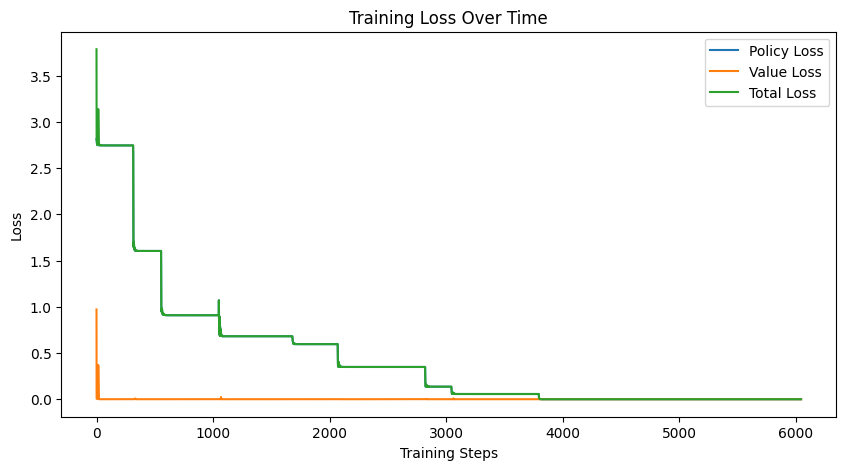

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


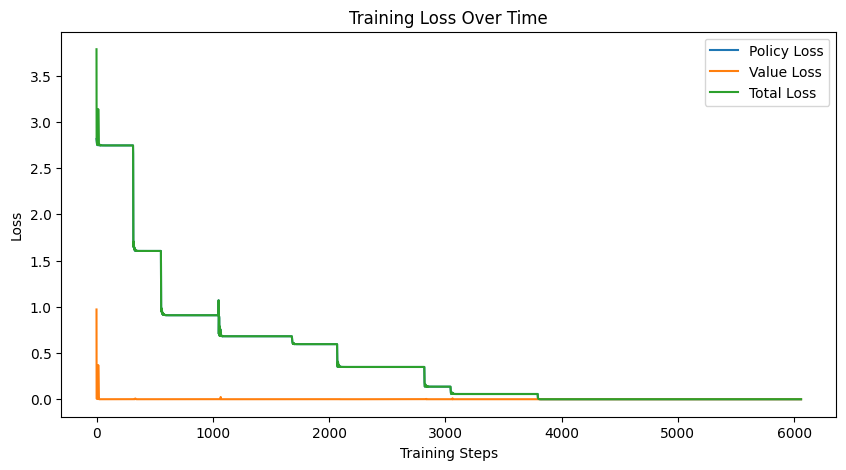

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


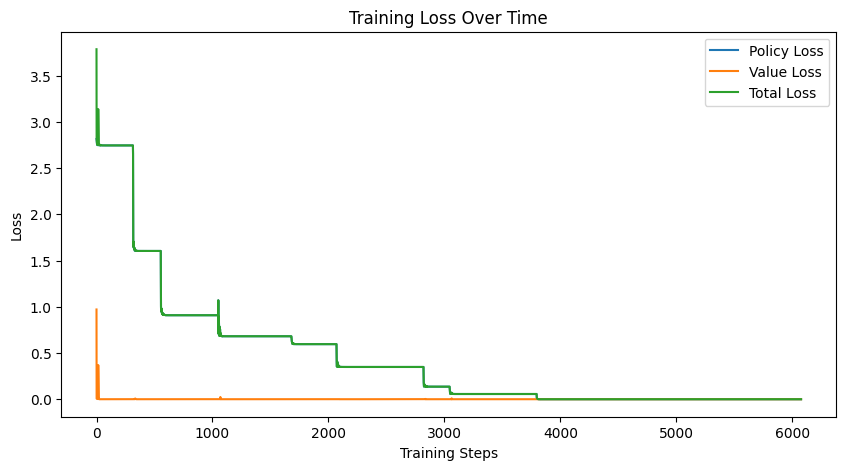

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


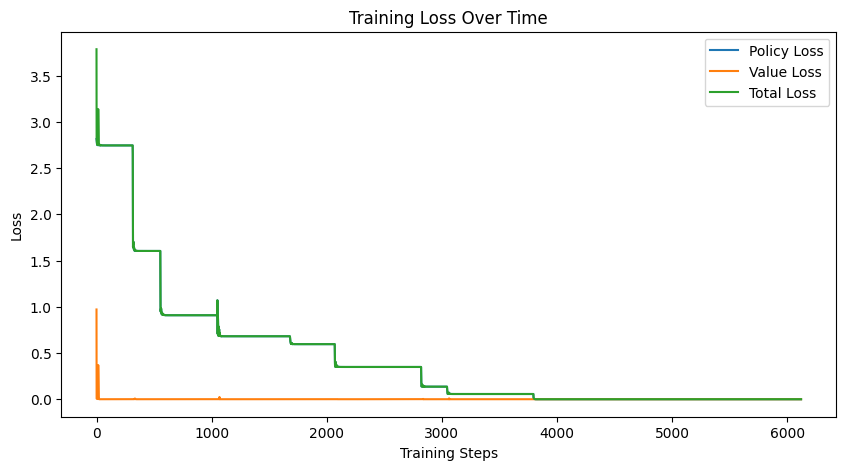

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


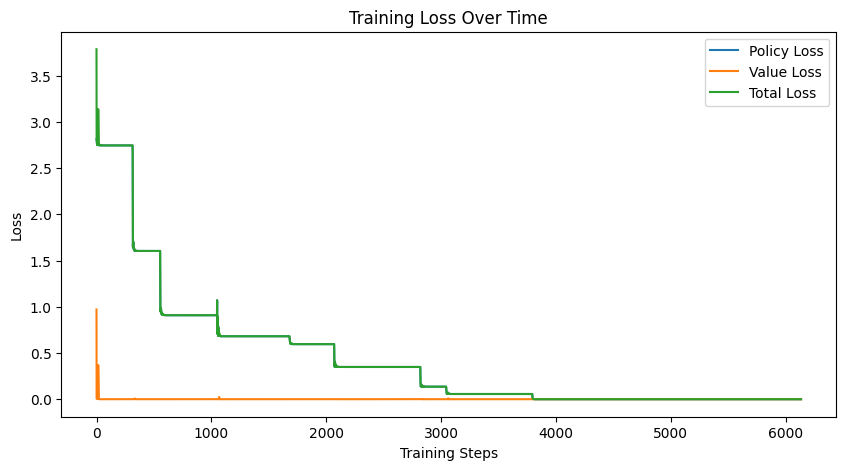

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


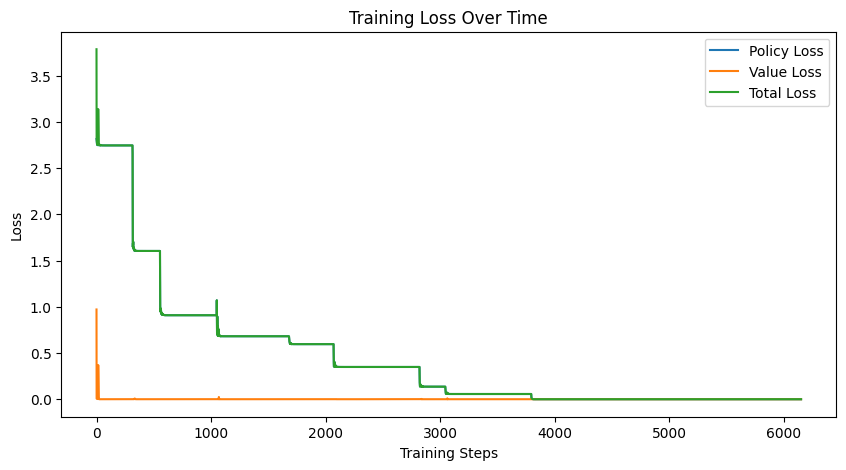

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


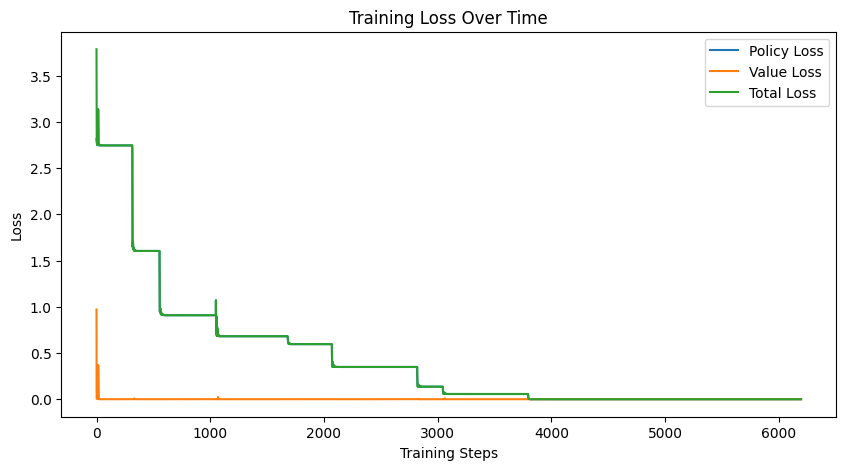

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


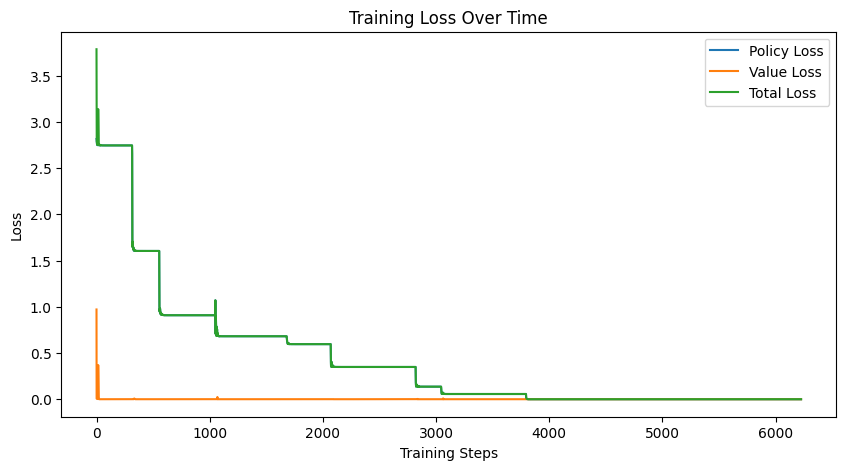

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


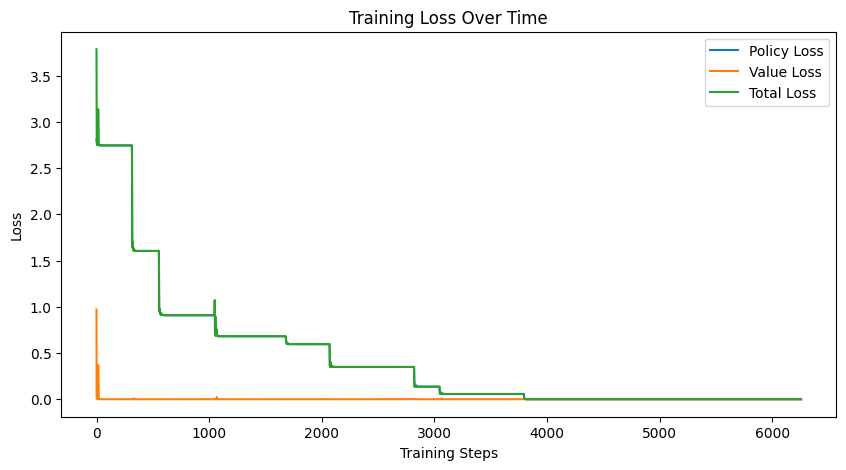

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


  0%|          | 0/1000 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [49]:
game = AttaxGame() # Game
 
device = torch.device("cuda" if torch.cuda.is_available() else "cpu") # Checks if GPU is available

game.N = 4 # 4*4
game.action_size = game.N * game.N # Number of possible actions
state = game.get_initial_state() # Initial state

model = ResNet(game, state, 1, 4, 64, device) # Initialize the model with the same parameters used in training (4 residual blocks, 64 filters)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=0.0001) # Adam optimizer with weight decay of 0.0001 and learning rate of 0.001 

# Training parameters
args = {
    'C': 2, # Exploration constant for the UCT formula
    'num_searches': 100, # Number of searches to run for each move
    'num_iterations': 500, # Number of iterations to run the training
    'num_selfPlay_iterations': 1000, # Number of self play iterations
    'num_epochs': 50, # Number of epochs to run the training
    'batch_size': 64, # Batch size
    'epsilon': 0.25, # Epsilon for the Dirichlet noise
    'alpha': 0.3 # Alpha for the Dirichlet noise
}

alphaZero = AlphaZero(model, optimizer, game, args) # AlphaZero object
alphaZero.learn() # Runs the training

###### Attempt 2 - weight decay = 0.001

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


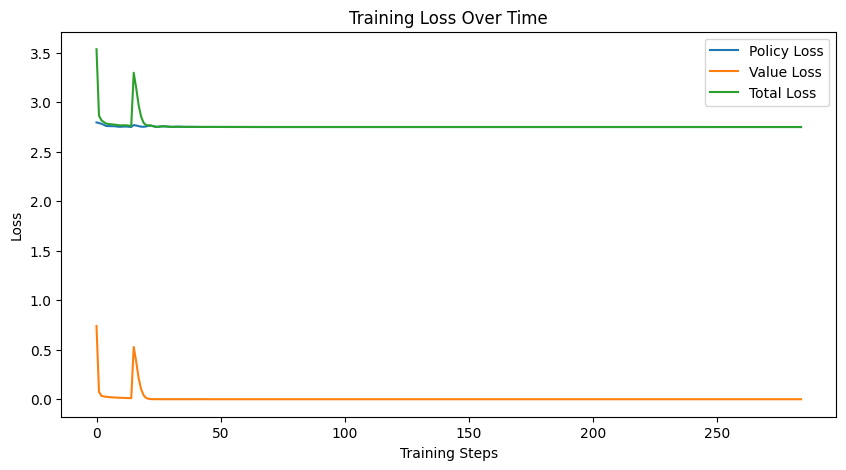

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


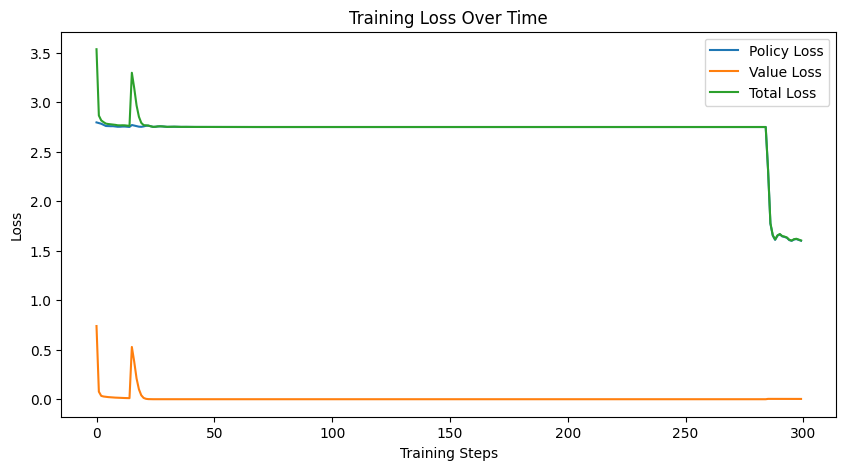

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


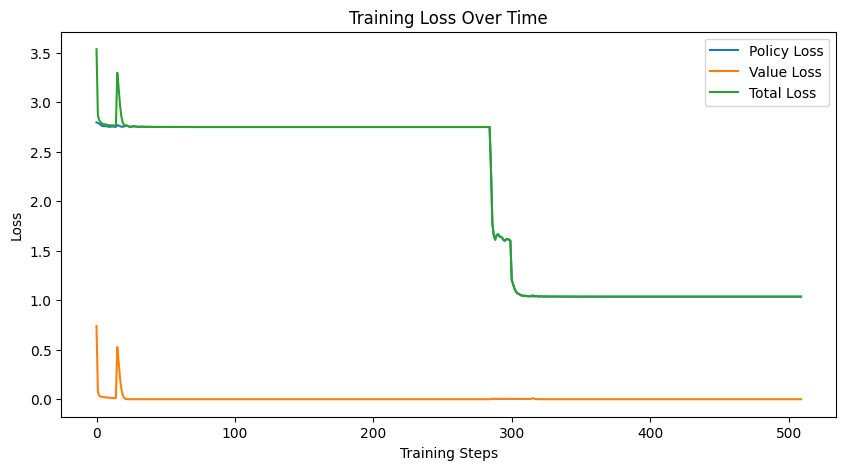

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


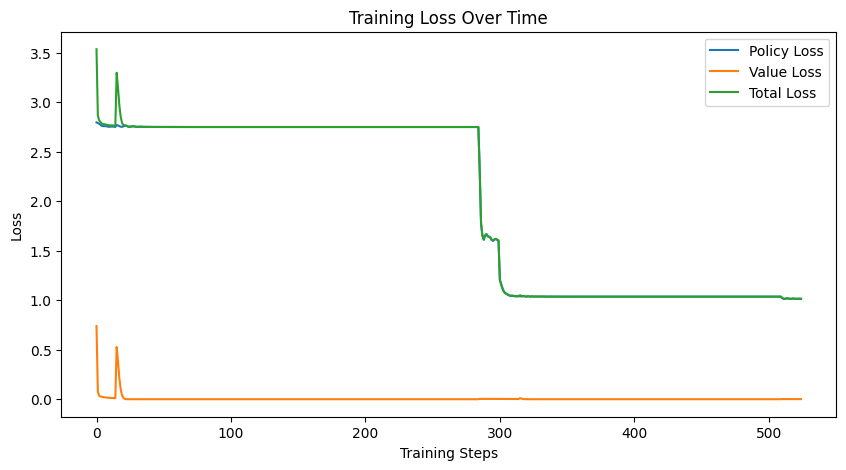

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


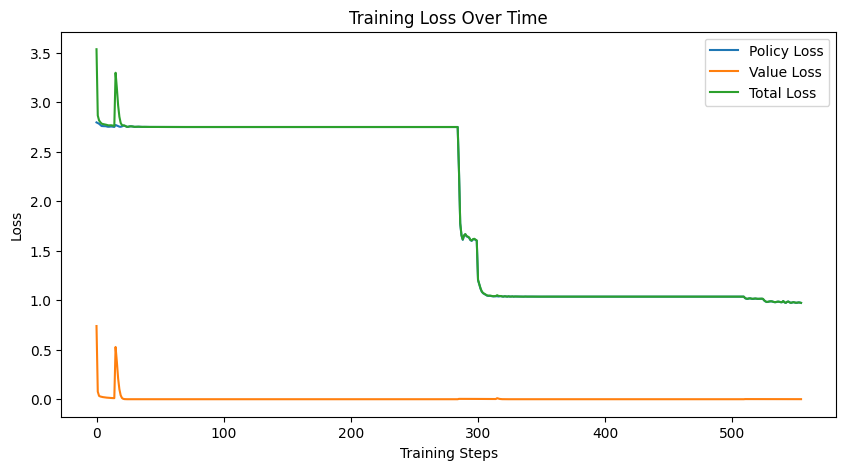

  0%|          | 0/1000 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [86]:
game = AttaxGame() # Game
 
device = torch.device("cuda" if torch.cuda.is_available() else "cpu") # Checks if GPU is available

game.N = 4 # 4*4
game.action_size = game.N * game.N # Number of possible actions
state = game.get_initial_state() # Initial state

model = ResNet(game, state, 1, 4, 64, device) # Initialize the model with the same parameters used in training 

optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=0.001) # Adam optimizer with weight decay of 0.0001 and learning rate of 0.001 

# Training parameters
args = {
    'C': 2, # Exploration constant for the UCT formula
    'num_searches': 100, # Number of searches to run for each move
    'num_iterations': 500, # Number of iterations to run the training
    'num_selfPlay_iterations': 1000, # Number of self play iterations
    'num_epochs': 50, # Number of epochs to run the training
    'batch_size': 64, # Batch size
    'epsilon': 0.25, # Epsilon for the Dirichlet noise
    'alpha': 0.3 # Alpha for the Dirichlet noise
}

alphaZero = AlphaZero(model, optimizer, game, args) # AlphaZero object
alphaZero.learn() # Runs the training

###### Attempt 3 - weight decay = 0.01

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


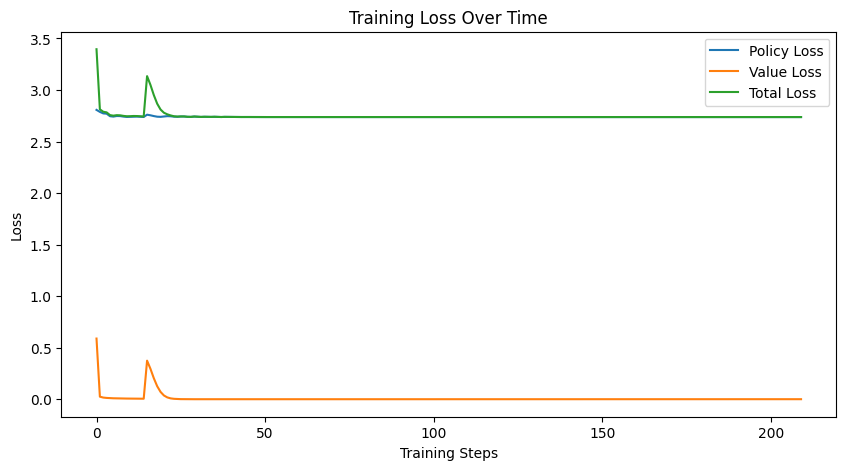

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


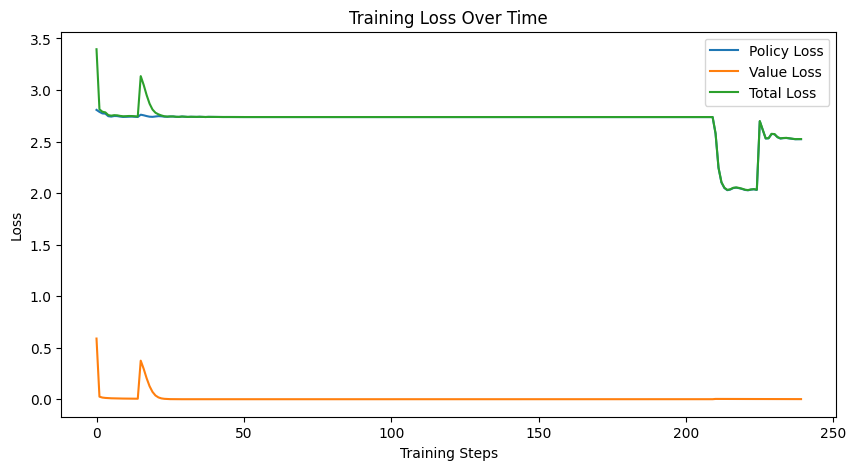

  0%|          | 0/1000 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [87]:
game = AttaxGame() # Game
 
device = torch.device("cuda" if torch.cuda.is_available() else "cpu") # Checks if GPU is available

game.N = 4 # 4*4
game.action_size = game.N * game.N # Number of possible actions
state = game.get_initial_state() # Initial state

model = ResNet(game, state, 1, 4, 64, device) # Initialize the model with the same parameters used in training 

optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=0.01) # Adam optimizer with weight decay of 0.0001 and learning rate of 0.001 

# Training parameters
args = {
    'C': 2, # Exploration constant for the UCT formula
    'num_searches': 100, # Number of searches to run for each move
    'num_iterations': 500, # Number of iterations to run the training
    'num_selfPlay_iterations': 1000, # Number of self play iterations
    'num_epochs': 50, # Number of epochs to run the training
    'batch_size': 64, # Batch size
    'epsilon': 0.25, # Epsilon for the Dirichlet noise
    'alpha': 0.3 # Alpha for the Dirichlet noise
}

alphaZero = AlphaZero(model, optimizer, game, args) # AlphaZero object
alphaZero.learn() # Runs the training

###### Attempt 4 - droupout of 15%

After some attemps, it was concluded that the bigger the weight decay, the sooner the early stopping is triggered and the higher the loss.
So, the approach was changed: use the lower weight decay and the dropout technique with 15%, 30% and 45%. 

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


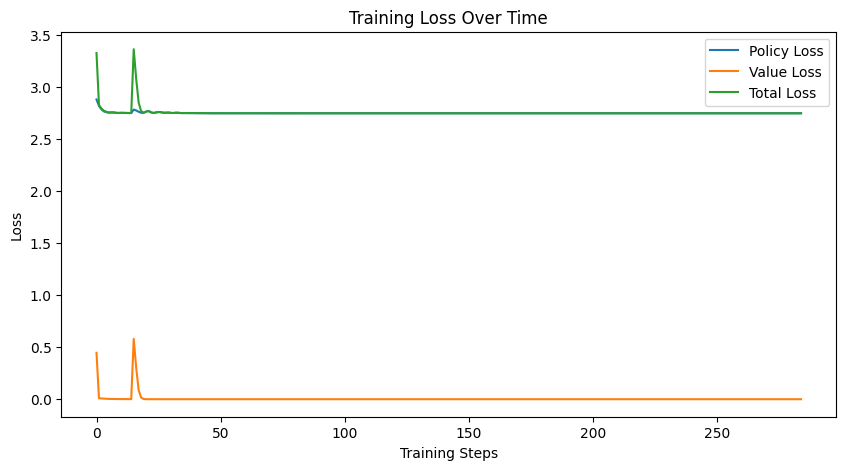

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


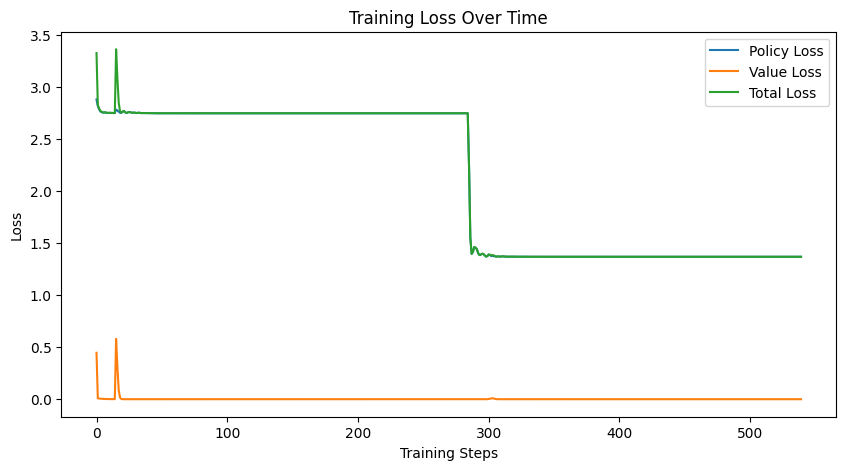

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


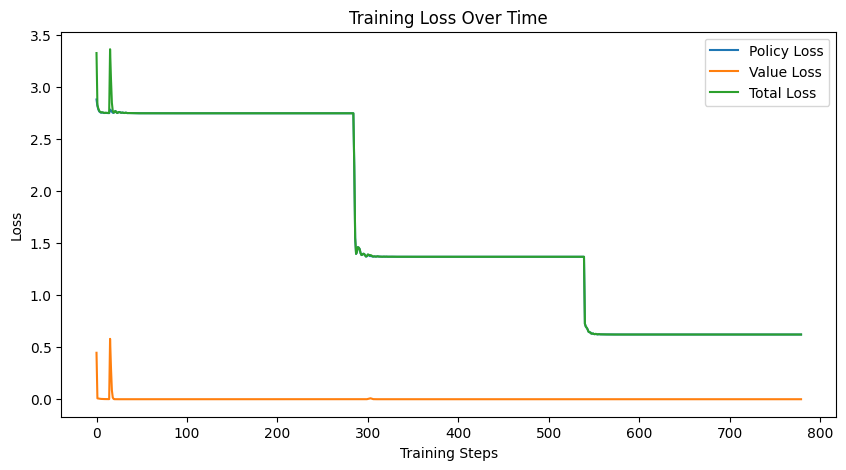

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


  0%|          | 0/1000 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [88]:
game = AttaxGame() # Game
 
device = torch.device("cuda" if torch.cuda.is_available() else "cpu") # Checks if GPU is available

game.N = 4 # 4*4
game.action_size = game.N * game.N # Number of possible actions
state = game.get_initial_state() # Initial state

model = ResNet(game, state, 1, 4, 64, device) # Initialize the model with the same parameters used in training (4 residual blocks, 64 filters)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=0.0001) # Adam optimizer with weight decay of 0.0001 and learning rate of 0.001 

# Training parameters
args = {
    'C': 2, # Exploration constant for the UCT formula
    'num_searches': 100, # Number of searches to run for each move
    'num_iterations': 500, # Number of iterations to run the training
    'num_selfPlay_iterations': 1000, # Number of self play iterations
    'num_epochs': 50, # Number of epochs to run the training
    'batch_size': 64, # Batch size
    'epsilon': 0.25, # Epsilon for the Dirichlet noise
    'alpha': 0.3 # Alpha for the Dirichlet noise
}

alphaZero = AlphaZero(model, optimizer, game, args) # AlphaZero object
alphaZero.learn() # Runs the training

###### Attempt 5 - dropout of 30%

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


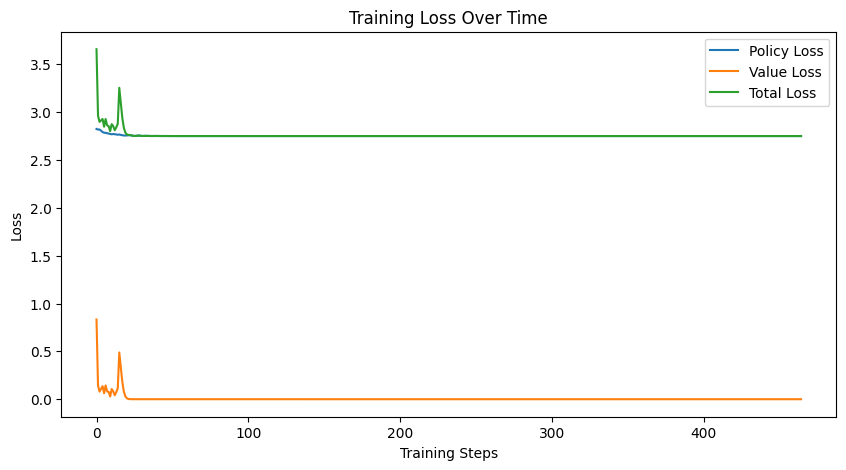

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


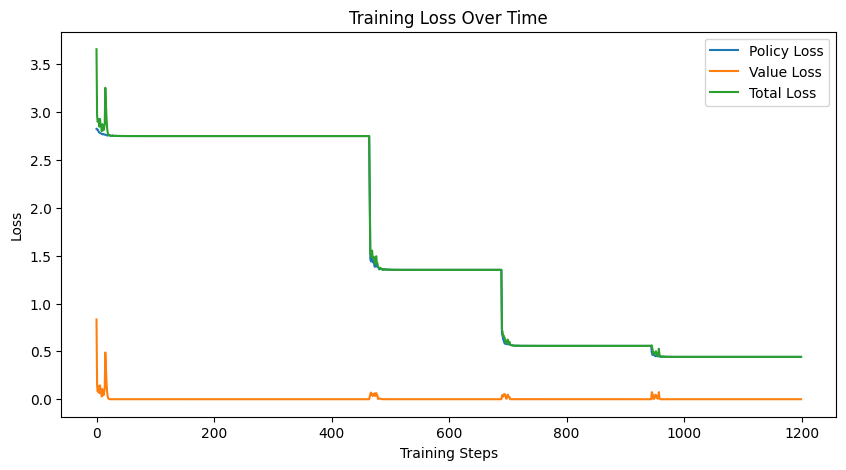

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


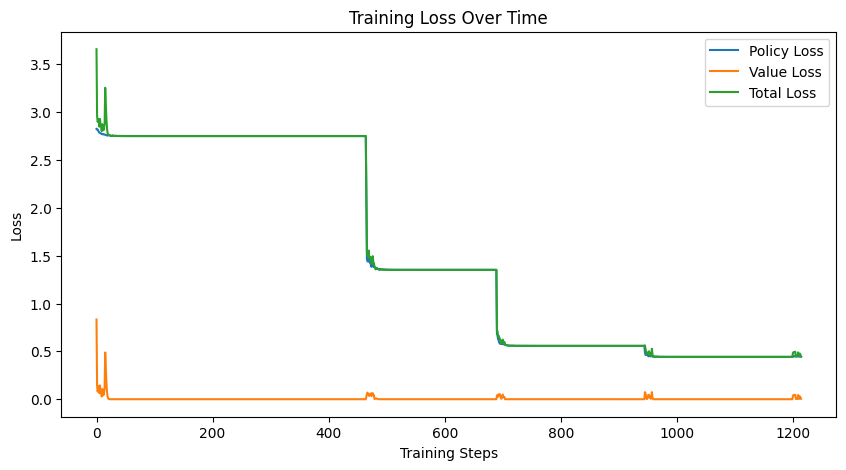

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


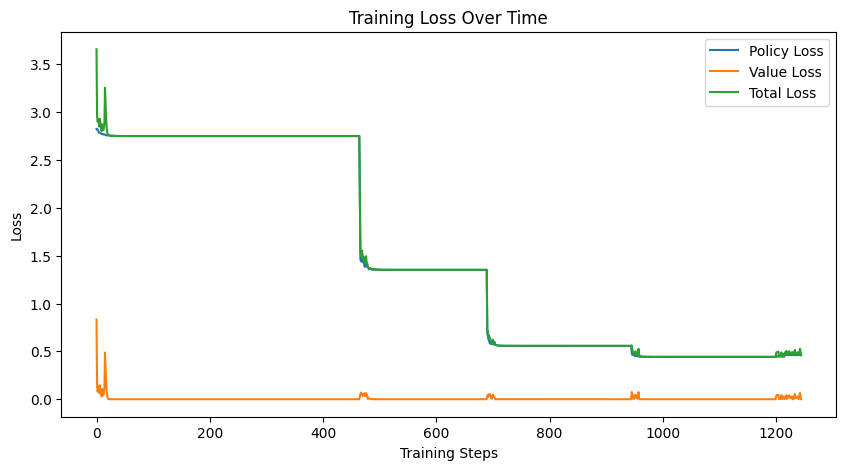

  0%|          | 0/1000 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [90]:
game = AttaxGame() # Game
 
device = torch.device("cuda" if torch.cuda.is_available() else "cpu") # Checks if GPU is available

game.N = 4 # 4*4
game.action_size = game.N * game.N # Number of possible actions
state = game.get_initial_state() # Initial state

model = ResNet(game, state, 1, 4, 64, device) # Initialize the model with the same parameters used in training (4 residual blocks, 64 filters)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=0.0001) # Adam optimizer with weight decay of 0.0001 and learning rate of 0.001 

# Training parameters
args = {
    'C': 2, # Exploration constant for the UCT formula
    'num_searches': 100, # Number of searches to run for each move
    'num_iterations': 500, # Number of iterations to run the training
    'num_selfPlay_iterations': 1000, # Number of self play iterations
    'num_epochs': 50, # Number of epochs to run the training
    'batch_size': 64, # Batch size
    'epsilon': 0.25, # Epsilon for the Dirichlet noise
    'alpha': 0.3 # Alpha for the Dirichlet noise
}

alphaZero = AlphaZero(model, optimizer, game, args) # AlphaZero object
alphaZero.learn() # Runs the training

###### Attempt 6 - dropout of 45%

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


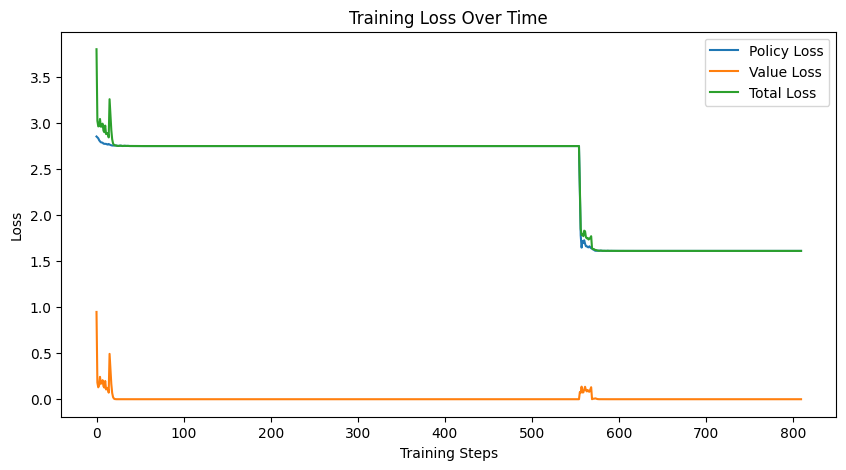

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


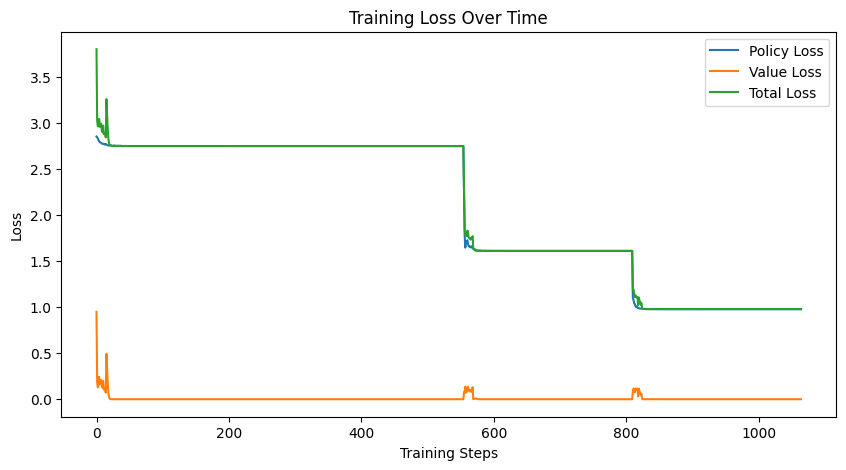

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


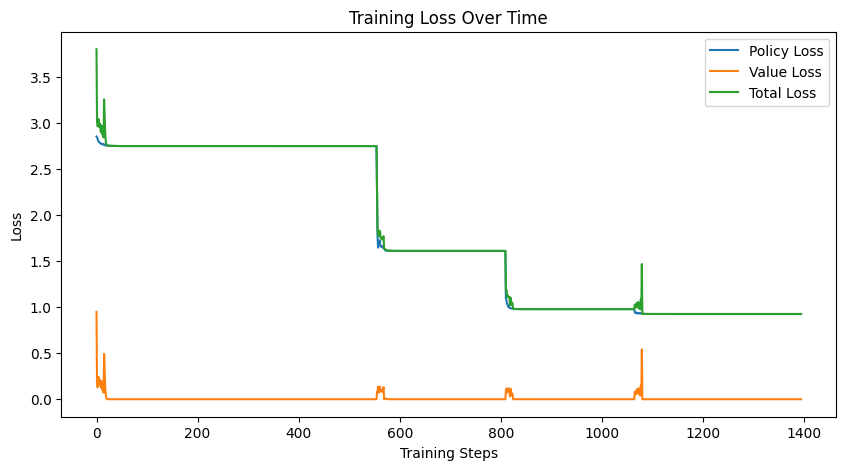

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


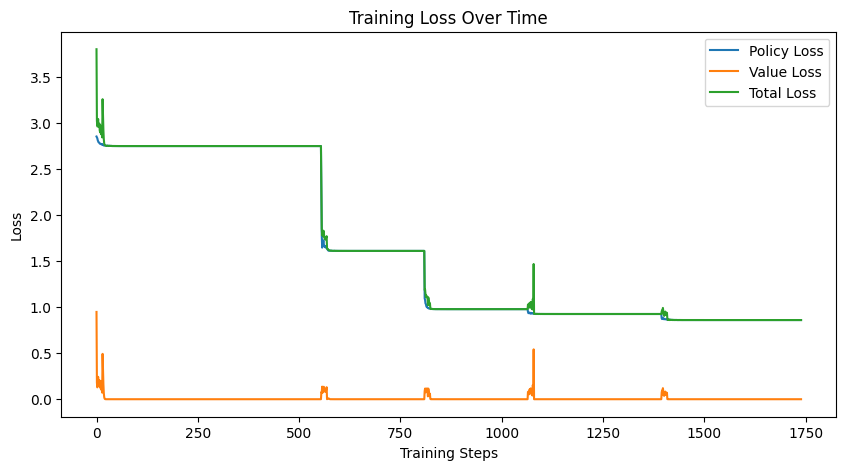

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


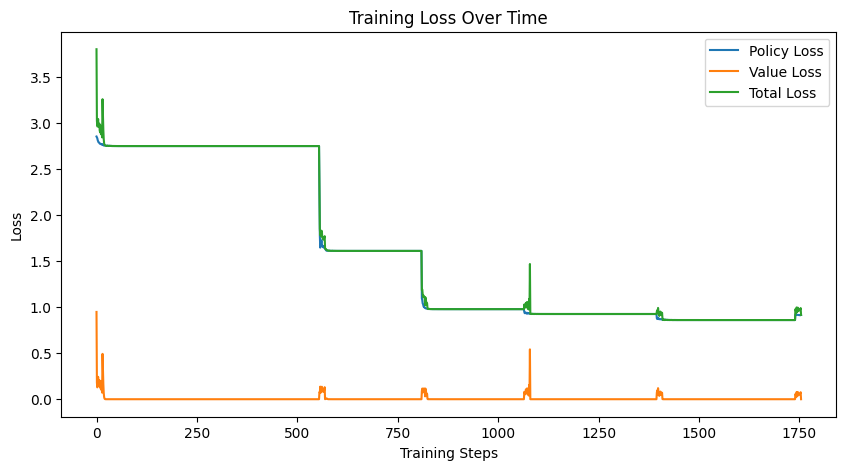

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Early stopping triggered


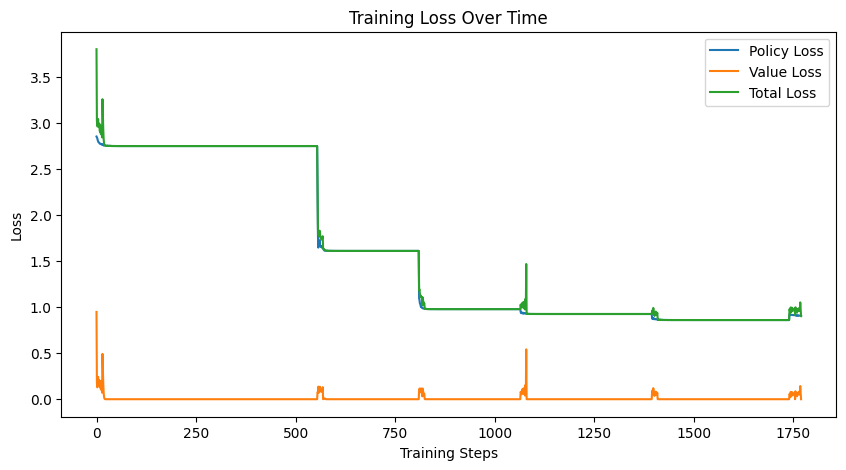

  0%|          | 0/1000 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [92]:
game = AttaxGame() # Game
 
device = torch.device("cuda" if torch.cuda.is_available() else "cpu") # Checks if GPU is available

game.N = 4 # 4*4
game.action_size = game.N * game.N # Number of possible actions
state = game.get_initial_state() # Initial state

model = ResNet(game, state, 1, 4, 64, device) # Initialize the model with the same parameters used in training (4 residual blocks, 64 filters)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=0.0001) # Adam optimizer with weight decay of 0.0001 and learning rate of 0.001 

# Training parameters
args = {
    'C': 2, # Exploration constant for the UCT formula
    'num_searches': 100, # Number of searches to run for each move
    'num_iterations': 500, # Number of iterations to run the training
    'num_selfPlay_iterations': 1000, # Number of self play iterations
    'num_epochs': 50, # Number of epochs to run the training
    'batch_size': 64, # Batch size
    'epsilon': 0.25, # Epsilon for the Dirichlet noise
    'alpha': 0.3 # Alpha for the Dirichlet noise
}

alphaZero = AlphaZero(model, optimizer, game, args) # AlphaZero object
alphaZero.learn() # Runs the training

##### The Alphazero experimentations and trained for dimension game.N=5 and game.N=6 were done in Attax_Test_5_6 notebook within the useful_files folder.